In [1]:
# Load libraries

# # Plotting utils 
import matplotlib.pyplot as plt 
import matplotlib.colors as colors
import matplotlib.ticker as ticker 
import matplotlib.patches as patches
import matplotlib as matplotlib
import matplotlib.dates as mdates
from mpl_toolkits.axes_grid1 import make_axes_locatable

import seaborn as sns

# Analysis
import time
import numpy as np 
import xarray as xr
import datetime
from   datetime import date, timedelta
import pandas as pd 
import pickle
import scipy.stats as stats
import glob
import os 

import metpy.calc as mpc
from metpy.units import units
from metpy.plots import Hodograph, SkewT

import warnings
warnings.filterwarnings('ignore')



## Read in data 

In [2]:
## Load data rather than re-create (it takes a long time to read it all in) 
saveDir = '/glade/work/mdfowler/CLASP/histData/processedData/ens_byLeadDay/'

hmg_day2_upsample01 = pickle.load( open( saveDir+"realSfc_HMG_day2_30min_pert00.p" , "rb") )
hmg_day3_upsample01 = pickle.load( open( saveDir+"realSfc_HMG_day3_30min_pert00.p" , "rb") )

htg_day2_upsample01 = pickle.load( open( saveDir+"realSfc_HTG_day2_30min_pert00.p" , "rb") )
htg_day3_upsample01 = pickle.load( open( saveDir+"realSfc_HTG_day3_30min_pert00.p" , "rb") )

hmgCLM_day2_upsample01 = pickle.load( open( saveDir+"realSfc_HMGclm_day2_30min_pert00.p" , "rb") )
hmgCLM_day3_upsample01 = pickle.load( open( saveDir+"realSfc_HMGclm_day3_30min_pert00.p" , "rb") )

htgCLM_day2_upsample01 = pickle.load( open( saveDir+"realSfc_HTGclm_day2_30min_pert00.p" , "rb") )
htgCLM_day3_upsample01 = pickle.load( open( saveDir+"realSfc_HTGclm_day3_30min_pert00.p" , "rb") )

print('Read in ens00, no multiplier data')


Read in ens00, no multiplier data


In [3]:
## For the HTG*10 case, files are split up by year and need to be merged 

yearStr = ['2015','2016','2017','2018']

for iYr in range(len(yearStr)): 
    
    htg_day2_upsample10_temp     = pickle.load( open( saveDir+"realSfc_HTGmult10_"   +yearStr[iYr]+"day2_30min_pert00.p" , "rb") )
    htgCLM_day2_upsample10_temp  = pickle.load( open( saveDir+"realSfc_HTGclmMult10_"+yearStr[iYr]+"day2_30min_pert00.p" , "rb") )
    
    htg_day3_upsample10_temp     = pickle.load( open( saveDir+"realSfc_HTGmult10_"   +yearStr[iYr]+"day3_30min_pert00.p" , "rb") )
    htgCLM_day3_upsample10_temp  = pickle.load( open( saveDir+"realSfc_HTGclmMult10_"+yearStr[iYr]+"day3_30min_pert00.p" , "rb") )
    
    if iYr==0:
        
        ## 2015 CLM: had saved all variables, not just some
        keepVars_CLM = ['SOILWATER_10CM','TSOI_10CM','RAIN','FSA','TG','TSA','USTAR','WSTAR','ZETA']

        htgCLM_day2_upsample10_temp = htgCLM_day2_upsample10_temp[keepVars_CLM]
        htgCLM_day3_upsample10_temp = htgCLM_day3_upsample10_temp[keepVars_CLM]

        
        htg_day2_upsample10    = htg_day2_upsample10_temp
        htgCLM_day2_upsample10 = htgCLM_day2_upsample10_temp
        
        htg_day3_upsample10    = htg_day3_upsample10_temp
        htgCLM_day3_upsample10 = htgCLM_day3_upsample10_temp
        
        
    else: 
        htg_day2_upsample10 = xr.concat([htg_day2_upsample10,    htg_day2_upsample10_temp],  dim='time')
        htg_day3_upsample10 = xr.concat([htg_day3_upsample10,    htg_day3_upsample10_temp],  dim='time')
        
        htgCLM_day2_upsample10 = xr.concat([htgCLM_day2_upsample10,    htgCLM_day2_upsample10_temp],  dim='time')
        htgCLM_day3_upsample10 = xr.concat([htgCLM_day3_upsample10,    htgCLM_day3_upsample10_temp],  dim='time')

    print('Done with year ', yearStr[iYr])


print('Read in ens00, HTG*10')

Done with year  2015
Done with year  2016
Done with year  2017
Done with year  2018
Read in ens00, HTG*10


In [4]:
## For the HTG*05 case, files are split up by year and need to be merged 

yearStr = ['2015','2016','2017','2018']

for iYr in range(len(yearStr)): 

    htg_day2_upsample5_temp     = pickle.load( open( saveDir+"realSfc_HTGmult5_"   +yearStr[iYr]+"day2_30min_pert00.p" , "rb") )
    htgCLM_day2_upsample5_temp  = pickle.load( open( saveDir+"realSfc_HTGclmMult5_"+yearStr[iYr]+"day2_30min_pert00.p" , "rb") )
    
    htg_day3_upsample5_temp     = pickle.load( open( saveDir+"realSfc_HTGmult5_"   +yearStr[iYr]+"day3_30min_pert00.p" , "rb") )
    htgCLM_day3_upsample5_temp  = pickle.load( open( saveDir+"realSfc_HTGclmMult5_"+yearStr[iYr]+"day3_30min_pert00.p" , "rb") )
         
    if iYr==0:
        htg_day2_upsample05    = htg_day2_upsample5_temp
        htgCLM_day2_upsample05 = htgCLM_day2_upsample5_temp
        
        htg_day3_upsample05    = htg_day3_upsample5_temp
        htgCLM_day3_upsample05 = htgCLM_day3_upsample5_temp
        
    else: 
        htg_day2_upsample05 = xr.concat([htg_day2_upsample05,    htg_day2_upsample5_temp],  dim='time')
        htg_day3_upsample05 = xr.concat([htg_day3_upsample05,    htg_day3_upsample5_temp],  dim='time')

        htgCLM_day2_upsample05 = xr.concat([htgCLM_day2_upsample05,    htgCLM_day2_upsample5_temp],  dim='time')
        htgCLM_day3_upsample05 = xr.concat([htgCLM_day3_upsample05,    htgCLM_day3_upsample5_temp],  dim='time')

    
    print('Done with year ', yearStr[iYr])


print('Read in ens00, HTG*05')

Done with year  2015
Done with year  2016
Done with year  2017
Done with year  2018
Read in ens00, HTG*05


In [5]:
## For the HTG*100 case, files are split up by year and need to be merged 

yearStr = ['2015','2016','2017','2018']

for iYr in range(len(yearStr)): 
    
    htg_day2_upsample100_temp     = pickle.load( open( saveDir+"realSfc_HTGmult100_"   +yearStr[iYr]+"day2_30min_pert00.p" , "rb") )
    htgCLM_day2_upsample100_temp  = pickle.load( open( saveDir+"realSfc_HTGclmMult100_"+yearStr[iYr]+"day2_30min_pert00.p" , "rb") )
    
    htg_day3_upsample100_temp     = pickle.load( open( saveDir+"realSfc_HTGmult100_"   +yearStr[iYr]+"day3_30min_pert00.p" , "rb") )
    htgCLM_day3_upsample100_temp  = pickle.load( open( saveDir+"realSfc_HTGclmMult100_"+yearStr[iYr]+"day3_30min_pert00.p" , "rb") )
    
    if iYr==0:
        
        ## 2015 CLM: had saved all variables, not just some
        keepVars_CLM = ['SOILWATER_10CM','TSOI_10CM','RAIN','FSA','TG','TSA','USTAR','WSTAR','ZETA']

        htgCLM_day2_upsample100_temp = htgCLM_day2_upsample100_temp[keepVars_CLM]
        htgCLM_day3_upsample100_temp = htgCLM_day3_upsample100_temp[keepVars_CLM]

        
        htg_day2_upsample100    = htg_day2_upsample100_temp
        htgCLM_day2_upsample100 = htgCLM_day2_upsample100_temp
        
        htg_day3_upsample100    = htg_day3_upsample100_temp
        htgCLM_day3_upsample100 = htgCLM_day3_upsample100_temp
        
        
    else: 
        htg_day2_upsample100 = xr.concat([htg_day2_upsample100,    htg_day2_upsample100_temp],  dim='time')
        htg_day3_upsample100 = xr.concat([htg_day3_upsample100,    htg_day3_upsample100_temp],  dim='time')
        
        htgCLM_day2_upsample100 = xr.concat([htgCLM_day2_upsample100,    htgCLM_day2_upsample100_temp],  dim='time')
        htgCLM_day3_upsample100 = xr.concat([htgCLM_day3_upsample100,    htgCLM_day3_upsample100_temp],  dim='time')

    print('Done with year ', yearStr[iYr])


print('Read in ens00, HTG*100')


Done with year  2015
Done with year  2016
Done with year  2017
Done with year  2018
Read in ens00, HTG*100


In [6]:
## Combine things to make it all a bit easier to handle... 

hmg_day2_upsample01 = hmg_day2_upsample01.dropna(dim='time',how='all').assign_coords({"case": 'HMG'})
htg_day2_upsample01 = htg_day2_upsample01.dropna(dim='time',how='all').assign_coords({"case": 'HTG*01'})
htg_day2_upsample100 = htg_day2_upsample100.dropna(dim='time',how='all').assign_coords({"case": 'HTG*100'})
htg_day2_upsample10 = htg_day2_upsample10.dropna(dim='time',how='all').assign_coords({"case": 'HTG*10'})
htg_day2_upsample05 = htg_day2_upsample05.dropna(dim='time',how='all').assign_coords({"case": 'HTG*05'})
day2_upsample       = xr.concat([hmg_day2_upsample01, htg_day2_upsample01, htg_day2_upsample10, htg_day2_upsample05, htg_day2_upsample100], "case")
hmgCLM_day2_upsample01 = hmgCLM_day2_upsample01.dropna(dim='time',how='all').assign_coords({"case": 'HMG'})
htgCLM_day2_upsample01 = htgCLM_day2_upsample01.dropna(dim='time',how='all').assign_coords({"case": 'HTG*01'})
htgCLM_day2_upsample100 = htgCLM_day2_upsample100.dropna(dim='time',how='all').assign_coords({"case": 'HTG*100'})
htgCLM_day2_upsample10 = htgCLM_day2_upsample10.dropna(dim='time',how='all').assign_coords({"case": 'HTG*10'})
htgCLM_day2_upsample05 = htgCLM_day2_upsample05.dropna(dim='time',how='all').assign_coords({"case": 'HTG*05'})
day2_upsampleCLM       = xr.concat([hmgCLM_day2_upsample01, htgCLM_day2_upsample01, htgCLM_day2_upsample10, htgCLM_day2_upsample05, htgCLM_day2_upsample100], "case")

hmg_day3_upsample01 = hmg_day3_upsample01.dropna(dim='time',how='all').assign_coords({"case": 'HMG'})
htg_day3_upsample01 = htg_day3_upsample01.dropna(dim='time',how='all').assign_coords({"case": 'HTG*01'})
htg_day3_upsample100 = htg_day3_upsample100.dropna(dim='time',how='all').assign_coords({"case": 'HTG*100'})
htg_day3_upsample10 = htg_day3_upsample10.dropna(dim='time',how='all').assign_coords({"case": 'HTG*10'})
htg_day3_upsample05 = htg_day3_upsample05.dropna(dim='time',how='all').assign_coords({"case": 'HTG*05'})
day3_upsample       = xr.concat([hmg_day3_upsample01, htg_day3_upsample01, htg_day3_upsample10, htg_day3_upsample05, htg_day3_upsample100], "case")
hmgCLM_day3_upsample01 = hmgCLM_day3_upsample01.dropna(dim='time',how='all').assign_coords({"case": 'HMG'})
htgCLM_day3_upsample01 = htgCLM_day3_upsample01.dropna(dim='time',how='all').assign_coords({"case": 'HTG*01'})
htgCLM_day3_upsample100 = htgCLM_day3_upsample100.dropna(dim='time',how='all').assign_coords({"case": 'HTG*100'})
htgCLM_day3_upsample10 = htgCLM_day3_upsample10.dropna(dim='time',how='all').assign_coords({"case": 'HTG*10'})
htgCLM_day3_upsample05 = htgCLM_day3_upsample05.dropna(dim='time',how='all').assign_coords({"case": 'HTG*05'})
day3_upsampleCLM       = xr.concat([hmgCLM_day3_upsample01, htgCLM_day3_upsample01, htgCLM_day3_upsample10, htgCLM_day3_upsample05, htgCLM_day3_upsample100], "case")

print('*** All cases combined into single day-based datasets ***')


*** All cases combined into single day-based datasets ***


In [7]:
# Add month_day index to arrays

month_day_day2                     = pd.MultiIndex.from_arrays([day2_upsample['time.year'].values,
                                                                day2_upsample['time.month'].values, 
                                                                day2_upsample['time.day'].values])
day2_upsample.coords['year_month_day']     = ('time', month_day_day2)
day2_upsampleCLM.coords['year_month_day']  = ('time', month_day_day2)


month_day_day3                     = pd.MultiIndex.from_arrays([day3_upsample['time.year'].values,
                                                                day3_upsample['time.month'].values, 
                                                                day3_upsample['time.day'].values])
day3_upsample.coords['year_month_day']     = ('time', month_day_day3)
day3_upsampleCLM.coords['year_month_day']  = ('time', month_day_day3)



### Compute a vertically integrated TKE measure?

In [8]:
## Read in obs file to correct PBLH elevation (to be above ground level) 
nateFile  = '/glade/work/mdfowler/CLASP/clasp-htg.bdate.nc'
nateDS    = xr.open_dataset(nateFile, decode_times=True)
elevation = nateDS.alt.values

day2_z_agl = day2_upsample.Z3.values - np.expand_dims(day2_upsample.PHIS.values,2)

In [8]:
day2_upsample.PBLH.values[0,10]

array([[263.93704]], dtype=float32)

In [9]:
day2_z_agl[0,10,:]

array([[[3.9826777e+04]],

       [[3.6835457e+04]],

       [[3.4206715e+04]],

       [[3.1765225e+04]],

       [[2.9614078e+04]],

       [[2.7616553e+04]],

       [[2.5860166e+04]],

       [[2.4341266e+04]],

       [[2.3135219e+04]],

       [[2.2253758e+04]],

       [[2.1674861e+04]],

       [[2.1107102e+04]],

       [[2.0551906e+04]],

       [[2.0007158e+04]],

       [[1.9473836e+04]],

       [[1.8949662e+04]],

       [[1.8398771e+04]],

       [[1.7825137e+04]],

       [[1.7295607e+04]],

       [[1.6802850e+04]],

       [[1.6310161e+04]],

       [[1.5813495e+04]],

       [[1.5311142e+04]],

       [[1.4807151e+04]],

       [[1.4302784e+04]],

       [[1.3798683e+04]],

       [[1.3294648e+04]],

       [[1.2790167e+04]],

       [[1.2289258e+04]],

       [[1.1787862e+04]],

       [[1.1277091e+04]],

       [[1.0756272e+04]],

       [[1.0223526e+04]],

       [[9.6799678e+03]],

       [[9.1250889e+03]],

       [[8.5609902e+03]],

       [[7.9874282e+03]],

 

In [11]:
iCase = 0
iT    = 10 
maxHgt = day2_upsample.PBLH.values[0,10]
day2_z_agl[iCase,iT,np.where(day2_z_agl[iCase,iT,:] <= maxHgt)[0]]

array([[[246.28267 ]],

       [[168.49036 ]],

       [[ 97.24066 ]],

       [[ 32.325283]]], dtype=float32)

In [13]:
iT=10

maxHgt   = np.squeeze(day2_upsample.PBLH.values[:,iT])

for iCase in range(len(day2_upsample.case.values)): 
    iPBLH    = np.where(np.squeeze(day2_z_agl[iCase,iT,:]) <= maxHgt[iCase])[0]

    selZ     =  day2_z_agl[iCase,iT,iPBLH]

    selWP2   = day2_upsample.WP2_CLUBB_interp.isel(case=iCase, levInterp=iPBLH)
    
    

In [19]:
np.shape(day2_upsample.levInterp)

(78,)

In [20]:
np.shape(day2_z_agl)

(4, 17088, 64, 1, 1)

In [34]:
# TKE_vertIntgrl = np.full([len(day2_upsample.case.values), len(day2_upsample.time.values)], np.nan)

# for iT in range(len(day2_upsample.time.values)): 
#     maxHgt   = np.squeeze(day2_upsample.PBLH.values[:,iT])
    
    
#     for iCase in range(len(day2_upsample.case.values)): 
#         iPBLH = np.where(day2_z_agl[iCase,iT,:] <= maxHgt)[0]
#         selZ     = [0, day2_z_agl[0,iT,0:(iPBLH+1)]]
        
#         selWP2 = day2_upsample.WP2_CLUBB_interp.isel(levInterp=iPBLH)
        
#         for iLev in range(len(iPBLH)): 
#             wp2xDZ = selWP2[iLev]
        
#         TKE_vertIntgrl[iCase,iT] = 

# day2_upsample.WP2_CLUBB_interp

<xarray.DataArray 'WP2_CLUBB_interp' (case: 4, time: 17088, levInterp: 78, lat: 1, lon: 1)>
array([[[[[0.0004    ]],

         [[0.0004    ]],

         [[0.0004    ]],

         ...,

         [[0.00603389]],

         [[0.01692626]],

         [[0.05869072]]],


        [[[0.0004    ]],

         [[0.0004    ]],

         [[0.0004    ]],
...
         [[0.00294253]],

         [[0.00481499]],

         [[0.0127831 ]]],


        [[[0.0004    ]],

         [[0.0004    ]],

         [[0.00040558]],

         ...,

         [[0.00209833]],

         [[0.00363009]],

         [[0.00952587]]]]])
Coordinates:
  * time            (time) datetime64[ns] 2015-06-02 ... 2018-08-29T23:30:00
  * lat             (lat) float64 36.61
  * lon             (lon) float64 262.5
    pertlim         int64 0
  * levInterp       (levInterp) float64 200.0 210.0 220.0 ... 950.0 960.0 970.0
  * case            (case) object 'HMG' 'HTG*01' 'HTG*10' 'HTG*05'
    year_month_day  (time) object (2015, 6, 2) (2015, 6, 2) ... (2018, 8, 29)

## Analysis section

In [9]:
'''
Find all the times in the full array (20m dt) that line up with the day classifications above. 
'''
def getTimes_basedOnDates(fullDS, matchDatesDS):
    iTimes = []
    
    for iTime in range(len(matchDatesDS.year_month_day.values)):
        iKeepTimes = np.where((fullDS['time.year'] ==matchDatesDS.year_month_day_level_0.values[iTime]) &
                              (fullDS['time.month']==matchDatesDS.year_month_day_level_1.values[iTime]) & 
                              (fullDS['time.day']  ==matchDatesDS.year_month_day_level_2.values[iTime]))[0]    
        iTimes = np.append(iTimes, iKeepTimes).astype(int)
    
    # Now select only those times in the local time array
    DS_dayClass = fullDS.isel(time=iTimes)
    
    return(DS_dayClass)

In [12]:
def selSensitiveDays_HMGonly(dayDS, varSel, startHr, endHr,useMax=False): 
    
    ## - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
    
    ## --- Get mean variable (varSel) over selected hours (inclusive from startHr to endHr): 
    if len(np.shape(dayDS[varSel]))==5:
        if np.shape(dayDS[varSel])[1]==65:
            real_varHMG   = dayDS[varSel].isel(ilev=-1).sel(case='HMG')
            real_varHTG   = dayDS[varSel].isel(ilev=-1).sel(case='HTG*01')
            real_varHTG10 = dayDS[varSel].isel(ilev=-1).sel(case='HTG*10')
            real_varHTG100 = dayDS[varSel].isel(ilev=-1).sel(case='HTG*100')
            real_varHTG05 = dayDS[varSel].isel(ilev=-1).sel(case='HTG*05')
        elif np.shape(dayDS[varSel])[1]==64:
            real_varHMG   = dayDS[varSel].isel(lev=-1).sel(case='HMG') 
            real_varHTG   = dayDS[varSel].isel(lev=-1).sel(case='HTG*01')   
            real_varHTG10 = dayDS[varSel].isel(lev=-1).sel(case='HTG*10')  
            real_varHTG100 = dayDS[varSel].isel(lev=-1).sel(case='HTG*100')  
            real_varHTG05 = dayDS[varSel].isel(lev=-1).sel(case='HTG*05')  
        elif np.shape(dayDS[varSel])[1]==78:
            real_varHMG   = dayDS[varSel].isel(levInterp=-1).sel(case='HMG')   
            real_varHTG   = dayDS[varSel].isel(levInterp=-1).sel(case='HTG*01')
            real_varHTG10 = dayDS[varSel].isel(levInterp=-1).sel(case='HTG*10')
            real_varHTG100 = dayDS[varSel].isel(levInterp=-1).sel(case='HTG*100')
            real_varHTG05 = dayDS[varSel].isel(levInterp=-1).sel(case='HTG*05')
    else:
        real_varHMG   = dayDS[varSel].sel(case='HMG')
        real_varHTG   = dayDS[varSel].sel(case='HTG*01')
        real_varHTG10 = dayDS[varSel].sel(case='HTG*10')
        real_varHTG100 = dayDS[varSel].sel(case='HTG*100')
        real_varHTG05 = dayDS[varSel].sel(case='HTG*05')

    # Select those hours or select daily max 
    if useMax==False:
        print('Working on %s, averaged over hours %i - %i' % (varSel, startHr, endHr))
        iHours_real           = np.where( (real_varHMG['time.hour']>=startHr) & (real_varHMG['time.hour']<=endHr) )[0]
        real_varHMG_selTime   = real_varHMG.isel(time=iHours_real)
        real_varHTG_selTime   = real_varHTG.isel(time=iHours_real)
        real_varHTG10_selTime = real_varHTG10.isel(time=iHours_real)
        real_varHTG100_selTime = real_varHTG100.isel(time=iHours_real)
        real_varHTG05_selTime = real_varHTG05.isel(time=iHours_real)


        # For each date, get the mean value over the selected time period 
        real_varHMG_dayMean    = real_varHMG_selTime.groupby('year_month_day').mean(dim='time')
        real_varHTG_dayMean    = real_varHTG_selTime.groupby('year_month_day').mean(dim='time')
        real_varHTG10_dayMean  = real_varHTG10_selTime.groupby('year_month_day').mean(dim='time')
        real_varHTG100_dayMean  = real_varHTG100_selTime.groupby('year_month_day').mean(dim='time')
        real_varHTG05_dayMean  = real_varHTG05_selTime.groupby('year_month_day').mean(dim='time')
    elif useMax==True:
        print('Working on daily maximum %s' % (varSel))
        real_varHMG_dayMean    = real_varHMG.groupby('year_month_day').max(dim='time')
        real_varHTG_dayMean    = real_varHTG.groupby('year_month_day').max(dim='time')
        real_varHTG10_dayMean  = real_varHTG10.groupby('year_month_day').max(dim='time')
        real_varHTG100_dayMean  = real_varHTG100.groupby('year_month_day').max(dim='time')
        real_varHTG05_dayMean  = real_varHTG05.groupby('year_month_day').max(dim='time')
        
            
    
    ## - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
    
    ## Get list of dates in string form
    strDates = []
    for iDate in range(len(real_varHMG_dayMean.year_month_day.values)):
        yr_sel  = real_varHMG_dayMean.year_month_day_level_0[iDate]
        mon_sel = real_varHMG_dayMean.year_month_day_level_1[iDate]
        day_sel = real_varHMG_dayMean.year_month_day_level_2[iDate]

        strDates = np.append(strDates, datetime.date(yr_sel,mon_sel,day_sel))
        
    # Get year delineation 
    yrStart =[]
    for iDate in range(len(strDates)-1):
        if strDates[iDate].year==(strDates[iDate+1].year)-1:
            yrStart = np.append(yrStart, iDate+1)

    ## - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
    
    ## Now get the dates falling within certain percentages 
    highPct = 90
    lowPct  = 10
    
    print('Using HMG:')
    print('- - - - - - - - ')
    print(highPct,'th percentile difference (HTG): %.3e'  % np.nanpercentile(real_varHMG_dayMean, highPct))
    print(lowPct,'th percentile difference (HTG):  %.3e'  % np.nanpercentile(real_varHMG_dayMean, lowPct))
    print()
    iHigh_realHMG  = np.where(real_varHMG_dayMean   >= np.nanpercentile(real_varHMG_dayMean, highPct))[0]
    iLow_realHMG   = np.where(real_varHMG_dayMean   <= np.nanpercentile(real_varHMG_dayMean, lowPct))[0]

    ## Get indices of dates that are consistent...
    listHigh_real = list(set( iHigh_realHMG )  )
    listLow_real  = list(set( iLow_realHMG ) )

    print('Num days consistent for high percentile (real sfc): ', len(listHigh_real))
    print('Num days consistent for low  percentile (real sfc): ', len(listLow_real))

    return real_varHMG_dayMean,strDates,yrStart,listHigh_real,listLow_real

In [182]:
# ## Select vaiable that's of interest 
# varSel  = 'PRECT'

# ## This is the option I've been using for the AGU presentation and before that 
# startHr = 0
# endHr   = 24

# print('\n-----------\nDay 2')
# selvarHMG_day2,strDates_day2,yrStart_day2,listHigh_day2,listLow_day2 = selSensitiveDays_HMGonly(day2_upsample, varSel, startHr, endHr, False)

# print('\n-----------\nDay 3')
# selvarHMG_day3,strDates_day3,yrStart_day3,listHigh_day3,listLow_day3 = selSensitiveDays_HMGonly(day3_upsample, varSel, startHr, endHr, False)



-----------
Day 2
Working on PRECT, averaged over hours 0 - 24
Using HMG:
- - - - - - - - 
90 th percentile difference (HTG): 1.082e-07
10 th percentile difference (HTG):  2.915e-13

Num days consistent for high percentile (real sfc):  36
Num days consistent for low  percentile (real sfc):  36

-----------
Day 3
Working on PRECT, averaged over hours 0 - 24
Using HMG:
- - - - - - - - 
90 th percentile difference (HTG): 1.063e-07
10 th percentile difference (HTG):  3.838e-12

Num days consistent for high percentile (real sfc):  36
Num days consistent for low  percentile (real sfc):  36


In [11]:
# ## Select vaiable that's of interest 
# varSel  = 'SOILWATER_10CM'

# ## This is the option I've been using for the AGU presentation and before that 
# startHr = 0
# endHr   = 24

# # print('\n-----------\nDay 2')
# selvarHMG_day2,strDates_day2,yrStart_day2,listHigh_day2,listLow_day2 = selSensitiveDays_HMGonly(day2_upsampleCLM, varSel, startHr, endHr, False)

# print('\n-----------\nDay 3')
# selvarHMG_day3,strDates_day3,yrStart_day3,listHigh_day3,listLow_day3 = selSensitiveDays_HMGonly(day3_upsampleCLM, varSel, startHr, endHr, False)


Working on SOILWATER_10CM, averaged over hours 0 - 24
Using HMG:
- - - - - - - - 
90 th percentile difference (HTG): 3.138e+01
10 th percentile difference (HTG):  1.692e+01

Num days consistent for high percentile (real sfc):  36
Num days consistent for low  percentile (real sfc):  36

-----------
Day 3
Working on SOILWATER_10CM, averaged over hours 0 - 24
Using HMG:
- - - - - - - - 
90 th percentile difference (HTG): 3.157e+01
10 th percentile difference (HTG):  1.688e+01

Num days consistent for high percentile (real sfc):  36
Num days consistent for low  percentile (real sfc):  36


In [43]:
# ## Select vaiable that's of interest 
# varSel  = 'CAPE'

# ## This is the option I've been using for the AGU presentation and before that 
# startHr = 10
# endHr   = 16

# print('\n-----------\nDay 2')
# selvarHMG_day2,strDates_day2,yrStart_day2,listHigh_day2,listLow_day2 = selSensitiveDays_HMGonly(day2_upsample, varSel, startHr, endHr, True)

# print('\n-----------\nDay 3')
# selvarHMG_day3,strDates_day3,yrStart_day3,listHigh_day3,listLow_day3 = selSensitiveDays_HMGonly(day3_upsample, varSel, startHr, endHr, True)



-----------
Day 2
Working on daily maximum CAPE
Using HMG:
- - - - - - - - 
90 th percentile difference (HTG): 9.577e+02
10 th percentile difference (HTG):  0.000e+00

Num days consistent for high percentile (real sfc):  36
Num days consistent for low  percentile (real sfc):  46

-----------
Day 3
Working on daily maximum CAPE
Using HMG:
- - - - - - - - 
90 th percentile difference (HTG): 1.002e+03
10 th percentile difference (HTG):  0.000e+00

Num days consistent for high percentile (real sfc):  36
Num days consistent for low  percentile (real sfc):  43


In [9]:
# ## Select vaiable that's of interest 
# varSel  = 'U10'

# ## This is the option I've been using for the AGU presentation and before that 
# startHr = 0
# endHr   = 24

# print('\n-----------\nDay 2')
# selvarHMG_day2,strDates_day2,yrStart_day2,listHigh_day2,listLow_day2 = selSensitiveDays_HMGonly(day2_upsample, varSel, startHr, endHr, False)

# print('\n-----------\nDay 3')
# selvarHMG_day3,strDates_day3,yrStart_day3,listHigh_day3,listLow_day3 = selSensitiveDays_HMGonly(day3_upsample, varSel, startHr, endHr, False)



-----------
Day 2
Working on U10, averaged over hours 0 - 24
Using HMG:
- - - - - - - - 
90 th percentile difference (HTG): 6.138e+00
10 th percentile difference (HTG):  1.961e+00

Num days consistent for high percentile (real sfc):  36
Num days consistent for low  percentile (real sfc):  36

-----------
Day 3
Working on U10, averaged over hours 0 - 24
Using HMG:
- - - - - - - - 
90 th percentile difference (HTG): 6.118e+00
10 th percentile difference (HTG):  1.952e+00

Num days consistent for high percentile (real sfc):  36
Num days consistent for low  percentile (real sfc):  36


In [10]:
def selSensitiveDays_overLevs(dayDS, varSel, startHr, endHr, 
                              useLevSel=False, sfcLev=None, topLev=None,useMax=False): 
    
    ## - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
    
    ## --- Get mean variable (varSel) over selected hours (inclusive from startHr to endHr): 
    if useLevSel==True:
        if np.shape(dayDS[varSel])[2]==65:
            levName = 'ilev'
            levSel  = np.where( (dayDS.ilev.values<=sfcLev) & (dayDS.ilev.values>=topLev) )[0]
            
            real_varHMG   = dayDS[varSel].isel(ilev=levSel).sel(case='HMG')
            real_varHTG   = dayDS[varSel].isel(ilev=levSel).sel(case='HTG*01')
            real_varHTG10 = dayDS[varSel].isel(ilev=levSel).sel(case='HTG*10')
            real_varHTG100 = dayDS[varSel].isel(ilev=levSel).sel(case='HTG*100')
            real_varHTG05 = dayDS[varSel].isel(ilev=levSel).sel(case='HTG*05')
        elif np.shape(dayDS[varSel])[2]==64:
            levName = 'lev'
            levSel  = np.where( (dayDS.lev.values<=sfcLev) & (dayDS.lev.values>=topLev) )[0]
            
            real_varHMG   = dayDS[varSel].isel(lev=levSel).sel(case='HMG')
            real_varHTG   = dayDS[varSel].isel(lev=levSel).sel(case='HTG*01')
            real_varHTG10 = dayDS[varSel].isel(lev=levSel).sel(case='HTG*10')
            real_varHTG100 = dayDS[varSel].isel(lev=levSel).sel(case='HTG*100')
            real_varHTG05 = dayDS[varSel].isel(lev=levSel).sel(case='HTG*05')
        elif np.shape(dayDS[varSel])[2]==78:
            levName = 'levInterp'
            levSel  = np.where( (dayDS.levInterp.values<=sfcLev) & (dayDS.levInterp.values>=topLev) )[0]
            
            real_varHMG   = dayDS[varSel].isel(levInterp=levSel).sel(case='HMG')
            real_varHTG   = dayDS[varSel].isel(levInterp=levSel).sel(case='HTG*01')
            real_varHTG10 = dayDS[varSel].isel(levInterp=levSel).sel(case='HTG*10')
            real_varHTG100 = dayDS[varSel].isel(levInterp=levSel).sel(case='HTG*100')
            real_varHTG05 = dayDS[varSel].isel(levInterp=levSel).sel(case='HTG*05')
             
        ## Average over those selected levels 
        print('Averaging %s over %i - %i hPa' % (levName, np.nanmin(real_varHMG[levName].values), np.nanmax(real_varHMG[levName].values)))

            
        real_varHMG   = real_varHMG.mean(dim=levName)
        real_varHTG   = real_varHTG.mean(dim=levName)
        real_varHTG10 = real_varHTG10.mean(dim=levName)
        real_varHTG100 = real_varHTG100.mean(dim=levName)
        real_varHTG05 = real_varHTG05.mean(dim=levName)
    else:
        real_varHMG   = dayDS[varSel].sel(case='HMG')
        real_varHTG   = dayDS[varSel].sel(case='HTG*01')
        real_varHTG10 = dayDS[varSel].sel(case='HTG*10')
        real_varHTG100 = dayDS[varSel].sel(case='HTG*100')
        real_varHTG05 = dayDS[varSel].sel(case='HTG*05')

    # Select those hours or select daily max 
    if useMax==False:
        print('Working on %s, averaged over hours %i - %i' % (varSel, startHr, endHr))
        iHours_real           = np.where( (real_varHMG['time.hour']>=startHr) & (real_varHMG['time.hour']<=endHr) )[0]
        real_varHMG_selTime   = real_varHMG.isel(time=iHours_real)
        real_varHTG_selTime   = real_varHTG.isel(time=iHours_real)
        real_varHTG10_selTime = real_varHTG10.isel(time=iHours_real)
        real_varHTG100_selTime = real_varHTG100.isel(time=iHours_real)
        real_varHTG05_selTime = real_varHTG05.isel(time=iHours_real)


        # For each date, get the mean value over the selected time period 
        real_varHMG_dayMean    = real_varHMG_selTime.groupby('year_month_day').mean(dim='time')
        real_varHTG_dayMean    = real_varHTG_selTime.groupby('year_month_day').mean(dim='time')
        real_varHTG10_dayMean  = real_varHTG10_selTime.groupby('year_month_day').mean(dim='time')
        real_varHTG100_dayMean  = real_varHTG100_selTime.groupby('year_month_day').mean(dim='time')
        real_varHTG05_dayMean  = real_varHTG05_selTime.groupby('year_month_day').mean(dim='time')
    elif useMax==True:
        print('Working on daily maximum %s' % (varSel))
        real_varHMG_dayMean    = real_varHMG.groupby('year_month_day').max(dim='time')
        real_varHTG_dayMean    = real_varHTG.groupby('year_month_day').max(dim='time')
        real_varHTG10_dayMean  = real_varHTG10.groupby('year_month_day').max(dim='time')
        real_varHTG100_dayMean  = real_varHTG100.groupby('year_month_day').max(dim='time')
        real_varHTG05_dayMean  = real_varHTG05.groupby('year_month_day').max(dim='time')
        
            
    
    ## - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
    
    ## Get list of dates in string form
    strDates = []
    for iDate in range(len(real_varHMG_dayMean.year_month_day.values)):
        yr_sel  = real_varHMG_dayMean.year_month_day_level_0[iDate]
        mon_sel = real_varHMG_dayMean.year_month_day_level_1[iDate]
        day_sel = real_varHMG_dayMean.year_month_day_level_2[iDate]

        strDates = np.append(strDates, datetime.date(yr_sel,mon_sel,day_sel))
        
    # Get year delineation 
    yrStart =[]
    for iDate in range(len(strDates)-1):
        if strDates[iDate].year==(strDates[iDate+1].year)-1:
            yrStart = np.append(yrStart, iDate+1)

    ## - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
    
    ## Now get the dates falling within certain percentages 
    diff_realHTG   = np.squeeze(real_varHTG_dayMean.values)   - np.squeeze(real_varHMG_dayMean.values)
    diff_realHTG10 = np.squeeze(real_varHTG10_dayMean.values) - np.squeeze(real_varHMG_dayMean.values)
    diff_realHTG100 = np.squeeze(real_varHTG100_dayMean.values) - np.squeeze(real_varHMG_dayMean.values)
    diff_realHTG05 = np.squeeze(real_varHTG05_dayMean.values) - np.squeeze(real_varHMG_dayMean.values)

    highPct = 90
    lowPct  = 10

    print('Using HTG*01:')
    print('- - - - - - - - ')
    print(highPct,'th percentile difference (HTG): %.3e'  % np.nanpercentile(diff_realHTG, highPct))
    print(lowPct,'th percentile difference (HTG):  %.3e'  % np.nanpercentile(diff_realHTG, lowPct))
    print()
    iHigh_realHTG  = np.where(diff_realHTG   >= np.nanpercentile(diff_realHTG, highPct))[0]
    iLow_realHTG   = np.where(diff_realHTG   <= np.nanpercentile(diff_realHTG, lowPct))[0]
    
    print('Using HTG*05:')
    print('- - - - - - - - ')
    print(highPct,'th percentile difference (HTG): %.3e'  % np.nanpercentile(diff_realHTG05, highPct))
    print(lowPct,'th percentile difference (HTG):  %.3e'  % np.nanpercentile(diff_realHTG05, lowPct))
    print()
    iHigh_realHTG05  = np.where(diff_realHTG05   >= np.nanpercentile(diff_realHTG05, highPct))[0]
    iLow_realHTG05   = np.where(diff_realHTG05   <= np.nanpercentile(diff_realHTG05, lowPct))[0]
    
    print('Using HTG*10:')
    print('- - - - - - - - ')
    print(highPct,'th percentile difference (HTG): %.3e'  % np.nanpercentile(diff_realHTG10, highPct))
    print(lowPct,'th percentile difference (HTG):  %.3e'  % np.nanpercentile(diff_realHTG10, lowPct))
    print()
    iHigh_realHTG10  = np.where(diff_realHTG10   >= np.nanpercentile(diff_realHTG10, highPct))[0]
    iLow_realHTG10   = np.where(diff_realHTG10   <= np.nanpercentile(diff_realHTG10, lowPct))[0]
    
    print('Using HTG*100:')
    print('- - - - - - - - ')
    print(highPct,'th percentile difference (HTG): %.3e'  % np.nanpercentile(diff_realHTG100, highPct))
    print(lowPct,'th percentile difference (HTG):  %.3e'  % np.nanpercentile(diff_realHTG100, lowPct))
    print()
    iHigh_realHTG100  = np.where(diff_realHTG100   >= np.nanpercentile(diff_realHTG100, highPct))[0]
    iLow_realHTG100   = np.where(diff_realHTG100   <= np.nanpercentile(diff_realHTG100, lowPct))[0]

    
    ## Get indices of dates that are consistent...
    listHigh_real = list(set( iHigh_realHTG )  )
    listLow_real  = list(set( iLow_realHTG ) )
    
    listHigh_real10 = list(set( iHigh_realHTG10 )  )
    listLow_real10  = list(set( iLow_realHTG10 ) )
    
    listHigh_real05 = list(set( iHigh_realHTG05 )  )
    listLow_real05  = list(set( iLow_realHTG05 ) )
    
    listHigh_real100 = list(set( iHigh_realHTG100 )  )
    listLow_real100  = list(set( iLow_realHTG100 ) )

    print('Num days consistent for high percentile (real sfc): ', len(listHigh_real))
    print('Num days consistent for low  percentile (real sfc): ', len(listLow_real))

    
    return real_varHMG_dayMean,real_varHTG_dayMean,strDates,yrStart,listHigh_real,listLow_real,listHigh_real10,listLow_real10,listHigh_real100,listLow_real100

In [11]:
# varSel  = 'THLP2_CLUBB_interp'
# varSel  = 'RTP2_CLUBB_interp'
varSel  = 'WP2_CLUBB_interp'

startHr = 12
endHr   = 18

sfcLev = 1000.0
topLev = 800.0

print('\n-----------\nDay 2')
selvarHMG_day2,selvarHTG_day2,strDates_day2,yrStart_day2,listHigh_day2,listLow_day2,listHigh10_day2,listLow10_day2,listHigh100_day2,listLow100_day2 = selSensitiveDays_overLevs(day2_upsample,varSel, startHr, endHr, 
                                                                                                                True, sfcLev, topLev, False)

print('\n-----------\nDay 3')
selvarHMG_day3,selvarHTG_day3,strDates_day3,yrStart_day3,listHigh_day3,listLow_day3,listHigh10_day3,listLow10_day3,listHigh100_day3,listLow100_day3 = selSensitiveDays_overLevs(day3_upsample,varSel, startHr, endHr, 
                                                                                                                True, sfcLev, topLev, False)



-----------
Day 2
Averaging levInterp over 800 - 970 hPa
Working on WP2_CLUBB_interp, averaged over hours 12 - 18
Using HTG*01:
- - - - - - - - 
90 th percentile difference (HTG): 1.285e-02
10 th percentile difference (HTG):  -1.611e-02

Using HTG*05:
- - - - - - - - 
90 th percentile difference (HTG): 2.886e-02
10 th percentile difference (HTG):  -2.898e-02

Using HTG*10:
- - - - - - - - 
90 th percentile difference (HTG): 3.964e-02
10 th percentile difference (HTG):  -3.083e-02

Using HTG*100:
- - - - - - - - 
90 th percentile difference (HTG): 9.141e-02
10 th percentile difference (HTG):  -5.053e-02

Num days consistent for high percentile (real sfc):  36
Num days consistent for low  percentile (real sfc):  36

-----------
Day 3
Averaging levInterp over 800 - 970 hPa
Working on WP2_CLUBB_interp, averaged over hours 12 - 18
Using HTG*01:
- - - - - - - - 
90 th percentile difference (HTG): 4.138e-02
10 th percentile difference (HTG):  -3.271e-02

Using HTG*05:
- - - - - - - - 
90 th 

In [12]:
varSel

'WP2_CLUBB_interp'

In [14]:
print(np.sort(strDates_day2[listHigh_day2]))

[datetime.date(2015, 6, 11) datetime.date(2015, 6, 26)
 datetime.date(2015, 7, 2) datetime.date(2015, 7, 22)
 datetime.date(2015, 8, 9) datetime.date(2015, 8, 19)
 datetime.date(2016, 6, 3) datetime.date(2016, 6, 17)
 datetime.date(2016, 6, 20) datetime.date(2016, 6, 24)
 datetime.date(2016, 6, 26) datetime.date(2016, 7, 8)
 datetime.date(2016, 7, 27) datetime.date(2016, 7, 31)
 datetime.date(2016, 8, 19) datetime.date(2016, 8, 21)
 datetime.date(2016, 8, 28) datetime.date(2017, 6, 6)
 datetime.date(2017, 6, 16) datetime.date(2017, 6, 19)
 datetime.date(2017, 6, 28) datetime.date(2017, 7, 5)
 datetime.date(2017, 7, 16) datetime.date(2017, 8, 18)
 datetime.date(2017, 8, 26) datetime.date(2018, 6, 9)
 datetime.date(2018, 6, 13) datetime.date(2018, 6, 20)
 datetime.date(2018, 6, 21) datetime.date(2018, 7, 1)
 datetime.date(2018, 7, 14) datetime.date(2018, 7, 16)
 datetime.date(2018, 7, 17) datetime.date(2018, 8, 1)
 datetime.date(2018, 8, 13) datetime.date(2018, 8, 18)]


In [15]:
print(np.sort(strDates_day2[listLow_day2]))

[datetime.date(2015, 6, 7) datetime.date(2015, 6, 8)
 datetime.date(2015, 6, 14) datetime.date(2015, 6, 15)
 datetime.date(2015, 6, 29) datetime.date(2015, 7, 1)
 datetime.date(2015, 7, 6) datetime.date(2015, 7, 21)
 datetime.date(2015, 7, 24) datetime.date(2015, 8, 5)
 datetime.date(2015, 8, 18) datetime.date(2016, 6, 2)
 datetime.date(2016, 6, 19) datetime.date(2016, 6, 25)
 datetime.date(2016, 7, 17) datetime.date(2016, 7, 28)
 datetime.date(2016, 7, 29) datetime.date(2016, 8, 2)
 datetime.date(2017, 6, 2) datetime.date(2017, 6, 9)
 datetime.date(2017, 6, 15) datetime.date(2017, 7, 2)
 datetime.date(2017, 7, 6) datetime.date(2017, 7, 13)
 datetime.date(2017, 7, 17) datetime.date(2017, 7, 23)
 datetime.date(2017, 7, 24) datetime.date(2017, 8, 11)
 datetime.date(2018, 6, 7) datetime.date(2018, 6, 14)
 datetime.date(2018, 6, 18) datetime.date(2018, 6, 24)
 datetime.date(2018, 7, 2) datetime.date(2018, 7, 30)
 datetime.date(2018, 8, 14) datetime.date(2018, 8, 28)]


In [13]:
print(np.sort(strDates_day2[listHigh10_day2]))

[datetime.date(2015, 6, 2) datetime.date(2015, 6, 10)
 datetime.date(2015, 6, 11) datetime.date(2015, 6, 29)
 datetime.date(2015, 6, 30) datetime.date(2015, 7, 1)
 datetime.date(2015, 7, 5) datetime.date(2015, 7, 16)
 datetime.date(2015, 7, 20) datetime.date(2015, 8, 6)
 datetime.date(2015, 8, 19) datetime.date(2016, 6, 5)
 datetime.date(2016, 6, 7) datetime.date(2016, 6, 15)
 datetime.date(2016, 6, 17) datetime.date(2016, 6, 24)
 datetime.date(2016, 6, 26) datetime.date(2016, 7, 1)
 datetime.date(2016, 7, 22) datetime.date(2016, 7, 30)
 datetime.date(2016, 8, 24) datetime.date(2016, 8, 27)
 datetime.date(2017, 6, 16) datetime.date(2017, 6, 17)
 datetime.date(2017, 6, 19) datetime.date(2017, 6, 24)
 datetime.date(2017, 7, 4) datetime.date(2017, 7, 15)
 datetime.date(2017, 7, 16) datetime.date(2017, 7, 17)
 datetime.date(2017, 8, 18) datetime.date(2017, 8, 26)
 datetime.date(2018, 6, 20) datetime.date(2018, 6, 21)
 datetime.date(2018, 6, 28) datetime.date(2018, 7, 29)]


In [62]:
# listHigh_day2_dThlp2 = np.copy(listHigh_day2)
# listLow_day2_dThlp2  = np.copy(listLow_day2)

# listHigh_day3_dThlp2 = np.copy(listHigh_day3)
# listLow_day3_dThlp2  = np.copy(listLow_day3)


# listHigh_day2_dRtp2 = np.copy(listHigh_day2)
# listLow_day2_dRtp2  = np.copy(listLow_day2)

# listHigh_day3_dRtp2 = np.copy(listHigh_day3)
# listLow_day3_dRtp2  = np.copy(listLow_day3)


# listHigh_day2_dRtpthlp = np.copy(listHigh_day2)
# listLow_day2_dRtpthlp  = np.copy(listLow_day2)

# listHigh_day3_dRtpthlp = np.copy(listHigh_day3)
# listLow_day3_dRtpthlp  = np.copy(listLow_day3)


In [65]:
# print(np.sort(listHigh_day2_dThlp2[:]))
# print(np.sort(listHigh_day2_dRtp2[:]))
# print(np.sort(listHigh_day2_dRtpthlp[:]))
# print('\n', len(list(set(listHigh_day2_dThlp2) & set(listHigh_day2_dRtp2) ) ))
# print('\n', len(list(set(listHigh_day3_dThlp2) & set(listHigh_day3_dRtp2) ) ))


# listHigh_day2 = list( set(listHigh_day2_dThlp2) & set(listHigh_day2_dRtp2) )
# listHigh_day3 = list( set(listHigh_day3_dThlp2) & set(listHigh_day3_dRtp2) )

[  9  27  28  30  32  42  50  68  96 101 103 107 110 113 125 133 148 190
 191 192 194 195 206 211 218 228 263 274 278 285 286 294 311 312 314 344]
[ 14  38  50  51  78 103 107 116 125 127 141 144 148 169 176 191 192 194
 206 211 218 219 221 228 229 274 278 296 299 306 312 314 316 327 335 354]
[ 12  13  35  37  49  52  59  60  78  82  89 112 113 114 121 134 150 175
 181 195 204 208 209 212 251 255 259 297 303 311 313 325 339 340 346 347]

 16

 13


In [66]:
# print(np.sort(listLow_day2_dThlp2[:]))
# print(np.sort(listLow_day2_dRtp2[:]))
# print(np.sort(listLow_day2_dRtpthlp[:]))

# print('\n', len(list(set(listLow_day2_dThlp2) & set(listLow_day2_dRtp2) ) ))
# print('\n', len(list(set(listLow_day3_dThlp2) & set(listLow_day3_dRtp2) ) ))


# listLow_day2 = list( set(listLow_day2_dThlp2) & set(listLow_day2_dRtp2) )
# listLow_day3 = list( set(listLow_day3_dThlp2) & set(listLow_day3_dRtp2) )

[ 12  13  35  37  49  52  59  60  64  82  89 116 121 134 145 150 185 208
 212 219 240 248 251 253 272 279 283 297 325 326 327 340 342 346 347 354]
[ 12  13  24  49  52  59  60  64  89 112 113 121 134 145 147 150 175 181
 195 208 209 210 234 248 251 259 293 297 303 311 313 325 339 340 346 351]
[  8  27  28  29  30  32  38  51  76 106 110 116 133 141 146 148 176 190
 191 192 194 206 218 219 221 228 229 230 278 283 289 299 312 314 316 354]

 19

 21


In [13]:
def meanVars_overHours(dayDS, plotVar, startHr_plt, endHr_plt):
    
    # Select the variable of interest 
    real_varHMG         = dayDS[plotVar].sel(case='HMG')
    real_varHTG         = dayDS[plotVar].sel(case='HTG*01')
    real_varHTG10       = dayDS[plotVar].sel(case='HTG*10')
    real_varHTG100      = dayDS[plotVar].sel(case='HTG*100')
    real_varHTG05       = dayDS[plotVar].sel(case='HTG*05')
    
    # Select hours 
    iHours_real           = np.where( (real_varHMG['time.hour']>=startHr_plt) & (real_varHMG['time.hour']<=endHr_plt) )[0]
    real_varHMG_selTime   = real_varHMG.isel(time=iHours_real)
    real_varHTG_selTime   = real_varHTG.isel(time=iHours_real)
    real_varHTG10_selTime = real_varHTG10.isel(time=iHours_real)
    real_varHTG100_selTime = real_varHTG100.isel(time=iHours_real)
    real_varHTG05_selTime = real_varHTG05.isel(time=iHours_real)
    
    # For each date, get the mean value over each day
    varHMG_dayMean    = real_varHMG_selTime.groupby('year_month_day').mean(dim='time')
    varHTG_dayMean    = real_varHTG_selTime.groupby('year_month_day').mean(dim='time')
    varHTG10_dayMean  = real_varHTG10_selTime.groupby('year_month_day').mean(dim='time')
    varHTG100_dayMean  = real_varHTG100_selTime.groupby('year_month_day').mean(dim='time')
    varHTG05_dayMean  = real_varHTG05_selTime.groupby('year_month_day').mean(dim='time')

    diffHTG_dayMean   = varHTG_dayMean - varHMG_dayMean
    diffHTG10_dayMean = varHTG10_dayMean - varHMG_dayMean
    diffHTG100_dayMean = varHTG100_dayMean - varHMG_dayMean
    diffHTG05_dayMean = varHTG05_dayMean - varHMG_dayMean

    return varHMG_dayMean, varHTG_dayMean, varHTG10_dayMean, varHTG100_dayMean, varHTG05_dayMean, diffHTG_dayMean, diffHTG10_dayMean, diffHTG100_dayMean, diffHTG05_dayMean


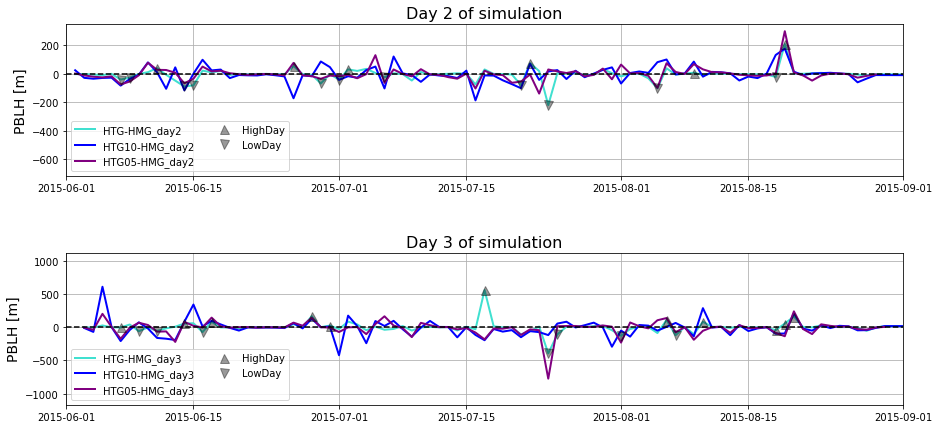

In [85]:
# Plot afternoon means of a selected variable 

plotVar = 'PBLH'
unitsStr = 'PBLH [m]'

# plotVar = 'PBLdepth_Q'
# # unitsStr = 'PBLdepth_Q [m]'

# plotVar = 'PBLdepth'
# unitsStr = 'PBLdepth [m]'

# plotVar = 'PRECT'
# unitsStr = 'PRECT [m/s]'

# plotVar = 'SHFLX'
# unitsStr = 'SHFLX [W/m2]'

startHr_plt = 12
endHr_plt   = 18

## To start: compute average over selected hours for each day lead time
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

real_varHMG_day2,real_varHTG_day2, real_varHTG10_day2, real_varHTG05_day2, diffHTG_day2, diffHTG10_day2, diffHTG05_day2 = meanVars_overHours(day2_upsample, 
                                                                    plotVar, startHr_plt, endHr_plt)

real_varHMG_day3,real_varHTG_day3, real_varHTG10_day3, real_varHTG05_day3, diffHTG_day3, diffHTG10_day3, diffHTG05_day3 = meanVars_overHours(day3_upsample, 
                                                                    plotVar, startHr_plt, endHr_plt)

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

## Set up plotting options 
plotHMG  = False
plotHTG  = False
plotDiff = True

startDate = datetime.date(2015,6,1)
endDate   = datetime.date(2015,9,1)

fig,axs = plt.subplots(2,1, figsize=(15,7))
axs     = axs.ravel()
fig.subplots_adjust(hspace=0.5)

if plotHMG==True:
    axs[0].plot(strDates_day2,np.squeeze(real_varHMG_day2), color='orangered',  label='HMG_day2')
    axs[1].plot(strDates_day3,np.squeeze(real_varHMG_day3), color='orangered',  label='HMG_day3')

if plotHTG==True:
    axs[0].plot(strDates_day2,np.squeeze(real_varHTG_day2),'-', color='turquoise',   alpha=0.7,label='HTG_day2')
    axs[1].plot(strDates_day3,np.squeeze(real_varHTG_day3),'-', color='turquoise',   alpha=0.7,label='HTG_day3')

    axs[0].plot(strDates_day2,np.squeeze(real_varHTG10_day2),'--', color='blue', alpha=0.7, label='HTG10_day2')
    axs[1].plot(strDates_day3,np.squeeze(real_varHTG10_day3),'--', color='blue', alpha=0.7, label='HTG10_day3')
    
    axs[0].plot(strDates_day2,np.squeeze(real_varHTG05_day2),'--', color='purple', alpha=0.7, label='HTG05_day2')
    axs[1].plot(strDates_day3,np.squeeze(real_varHTG05_day3),'--', color='purple', alpha=0.7, label='HTG05_day3')

      
if plotDiff==True:   
    axs[0].plot(strDates_day2,np.squeeze(diffHTG_day2), color='turquoise', linewidth=2,label='HTG-HMG_day2')
    axs[1].plot(strDates_day3,np.squeeze(diffHTG_day3), color='turquoise', linewidth=2,label='HTG-HMG_day3')

    axs[0].plot(strDates_day2,np.squeeze(diffHTG10_day2), color='blue', linewidth=2,label='HTG10-HMG_day2')
    axs[1].plot(strDates_day3,np.squeeze(diffHTG10_day3), color='blue', linewidth=2,label='HTG10-HMG_day3')  
    
    axs[0].plot(strDates_day2,np.squeeze(diffHTG05_day2), color='purple', linewidth=2,label='HTG05-HMG_day2')
    axs[1].plot(strDates_day3,np.squeeze(diffHTG05_day3), color='purple', linewidth=2,label='HTG05-HMG_day3')

if plotDiff==True: 
    axs[0].plot(strDates_day2[listHigh_day2], np.squeeze(diffHTG_day2)[listHigh_day2],'k^',markersize=9,alpha=0.4, label='HighDay')
    axs[1].plot(strDates_day3[listHigh_day3], np.squeeze(diffHTG_day3)[listHigh_day3],'k^',markersize=9,alpha=0.4, label='HighDay')

    axs[0].plot(strDates_day2[listLow_day2], np.squeeze(diffHTG_day2)[listLow_day2],'kv',markersize=9,alpha=0.4, label='LowDay')
    axs[1].plot(strDates_day3[listLow_day3], np.squeeze(diffHTG_day3)[listLow_day3],'kv',markersize=9,alpha=0.4, label='LowDay')


## Control how plots display (ticks, labels, etc)
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

## Add legends
axs[0].legend(ncol=2)
axs[1].legend(ncol=2)

## Labels and Titles 
axs[0].set_title('Day 2 of simulation', fontsize=16)
axs[1].set_title('Day 3 of simulation', fontsize=16)

axs[0].set_ylabel(unitsStr, fontsize=14)
axs[1].set_ylabel(unitsStr, fontsize=14)

## Limits on axes and tick labels 
axs[0].set_xlim([startDate, endDate])
axs[1].set_xlim([startDate, endDate])


if plotDiff==True:
    axs[0].axhline(0,color='k',linestyle='--')
    axs[1].axhline(0,color='k',linestyle='--')

    axs[0].grid()
    axs[1].grid()

# axs[2].axvline(datetime.date(2015,8,9), color='r')
# axs[2].axvline(datetime.date(2015,8,5), color='r')
# axs[2].axvline(datetime.date(2015,6,30), color='r')
# axs[1].axvline(datetime.date(2015,6,30), color='r')

plt.show()


## Take a look at each category of day

In [14]:
def getFullDS_sensDays(DS_allDays, 
                       DS_dayMean,
                       strDates, listHigh, listLow): 
    ## - - - - - - - - - - - - - - - - - - - - - - - - - - -  
    ## Get full arrays that match low/high percentiles

    allIndicies        = np.arange(0,len(strDates))
    restOfIndices_real = list(set(allIndicies) - set(listHigh) - set(listLow))
                              
    # HMG case
    highPct    = getTimes_basedOnDates(DS_allDays,     
                                           DS_dayMean.isel(year_month_day=listHigh))
    lowPct     = getTimes_basedOnDates(DS_allDays,     
                                           DS_dayMean.isel(year_month_day=listLow))
    restOfDays = getTimes_basedOnDates(DS_allDays,     
                                           DS_dayMean.isel(year_month_day=restOfIndices_real))

    
    print('Done isolating high/low/rest DS')
    return highPct,lowPct,restOfDays

In [15]:
## Get full DS for high/low/rest of days -- using HTG-HMG defined sensitive days

## Use HTG - HMG difference to define days 
# highPct_day2,lowPct_day2,restOfDays_day2 = getFullDS_sensDays(day2_upsample, selvarHMG_day2,
#                                                               strDates_day2, listHigh_day2, listLow_day2)

# highPct_day3,lowPct_day3,restOfDays_day3 = getFullDS_sensDays(day3_upsample, selvarHMG_day3,
#                                                               strDates_day3, listHigh_day3, listLow_day3)

# # CLM file stoo
# highPctCLM_day2,lowPctCLM_day2,restOfDaysCLM_day2 = getFullDS_sensDays(day2_upsampleCLM, selvarHMG_day2,
#                                                               strDates_day2, listHigh_day2, listLow_day2)

# highPctCLM_day3,lowPctCLM_day3,restOfDaysCLM_day3 = getFullDS_sensDays(day3_upsampleCLM, selvarHMG_day3,
#                                                               strDates_day3, listHigh_day3, listLow_day3)


## Use HTG*10 case to define days
highPct_day2,lowPct_day2,restOfDays_day2 = getFullDS_sensDays(day2_upsample, selvarHMG_day2,
                                                              strDates_day2, listHigh10_day2, listLow10_day2)

highPct_day3,lowPct_day3,restOfDays_day3 = getFullDS_sensDays(day3_upsample, selvarHMG_day3,
                                                              strDates_day3, listHigh10_day3, listLow10_day3)

# CLM file stoo
highPctCLM_day2,lowPctCLM_day2,restOfDaysCLM_day2 = getFullDS_sensDays(day2_upsampleCLM, selvarHMG_day2,
                                                              strDates_day2, listHigh10_day2, listLow10_day2)

highPctCLM_day3,lowPctCLM_day3,restOfDaysCLM_day3 = getFullDS_sensDays(day3_upsampleCLM, selvarHMG_day3,
                                                              strDates_day3, listHigh10_day3, listLow10_day3)


Done isolating high/low/rest DS
Done isolating high/low/rest DS
Done isolating high/low/rest DS
Done isolating high/low/rest DS


In [16]:
## Belated realization that the heights computed are above *sea level* not above ground level. 
#    Need to subtract elevation. 
nateFile = '/glade/work/mdfowler/CLASP/clasp-htg.bdate.nc'
nateDS = xr.open_dataset(nateFile, decode_times=True)

## Convert to local time too 
nateDS_local       = nateDS.copy(deep=True)

# Confirmed that all the times are identical, so using the same local time arrays
localTimes = nateDS_local['time'].values - np.timedelta64(5,'h')

# Replace time dimension with local time
nateDS_local = nateDS_local.assign_coords({"time": localTimes})

# Also round to nearest hour, since some are a few minutes before/after minute 00: 
nateDS_HTG_roundHrs = nateDS_local['time'].dt.round("H")
nateDS_local        = nateDS_local.assign_coords({"time": nateDS_HTG_roundHrs})

# Add month_day index
month_day_idx                         = pd.MultiIndex.from_arrays([nateDS_local['time.year'].values,
                                                                nateDS_local['time.month'].values, 
                                                                nateDS_local['time.day'].values])
nateDS_local.coords['year_month_day'] = ('time', month_day_idx)

# # - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# ## Get high/low pct days in obs too 
# highPct_realSfc_obs = getTimes_basedOnDates(nateDS_local,     
#                                             real_var_dayMean.isel(year_month_day=listHigh_real))
# lowPct_realSfc_obs = getTimes_basedOnDates(nateDS_local,     
#                                             real_var_dayMean.isel(year_month_day=listLow_real))
# restOfDays_realSfc_obs   = getTimes_basedOnDates(nateDS_local,     
#                                              real_var_dayMean.isel(year_month_day=restOfIndices_real))
# print('Done selecting obs cases')

# ## Get large scale/obs information too
# hourlyMean_highPct_realSfc_obs    = highPct_realSfc_obs.groupby("time.hour").mean(dim="time")
# hourlyMean_lowPct_realSfc_obs     = lowPct_realSfc_obs.groupby("time.hour").mean(dim="time")
# hourlyMean_restOfDays_realSfc_obs = restOfDays_realSfc_obs.groupby("time.hour").mean(dim="time")
# print('Computed observational means for all cases')



In [20]:
# highPct_day2obs,lowPct_day2obs,restOfDays_day2obs = getFullDS_sensDays(nateDS_local, selvarHMG_day2,
#                                                               strDates_day2, listHigh_day2, listLow_day2)

# highPct_day3obs,lowPct_day3obs,restOfDays_day3obs = getFullDS_sensDays(nateDS_local, selvarHMG_day3,
#                                                               strDates_day3, listHigh_day3, listLow_day3)



Done isolating high/low/rest DS
Done isolating high/low/rest DS


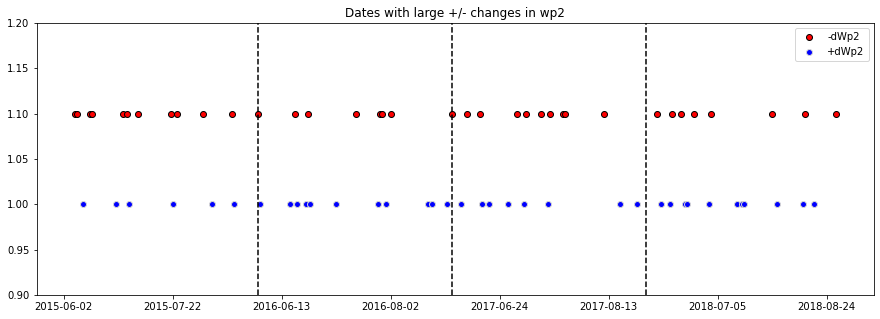

In [17]:
fig,axs=plt.subplots(1,1, figsize=(15,5))

# axs.plot(np.arange(0,len(strDates_day2))[listLow_day2], np.ones(len(listLow_day2))*1.1, 'ro', 
#          markeredgecolor='k',label='DrySoils')
# axs.plot(np.arange(0,len(strDates_day2))[listHigh_day2], np.ones(len(listHigh_day2)), 'bo', 
#          markeredgecolor='lightgrey',label='WetSoils')
# axs.set_title('Dates with high/low soil moisture amounts')


axs.plot(np.arange(0,len(strDates_day2))[listLow_day2], np.ones(len(listLow_day2))*1.1, 'ro', 
         markeredgecolor='k',label='-dWp2')
axs.plot(np.arange(0,len(strDates_day2))[listHigh_day2], np.ones(len(listHigh_day2)), 'bo', 
         markeredgecolor='lightgrey',label='+dWp2')
axs.set_title('Dates with large +/- changes in wp2')

axs.legend()
axs.set_ylim([0.9,1.2])

## Add separating lines for ease of looking at these 
for iYr in range(len(yrStart_day2)):
    axs.axvline(yrStart_day2[iYr], color='k',linestyle='--')

# Control tick labels
xTicks       = axs.get_xticks()
dates_xticks = strDates_day2[xTicks.astype(int)[:-1]]
axs.set_xticklabels(dates_xticks)

plt.show()

In [18]:
def getHourlyMeans_sensDays(highPct,lowPct,restOfDays):
    ## - - - - - - - - - - - - - - - - - - - - - - - - - - -  
    ## Get hourly means/std in each category 

    hourlyMean_highPct    = highPct.groupby("time.hour").mean(dim="time")
    hourlyMean_lowPct     = lowPct.groupby("time.hour").mean(dim="time")
    hourlyMean_restOfDays = restOfDays.groupby("time.hour").mean(dim="time")    
    print('Computed hourly means')
    
    hourlyStd_highPct    = highPct.groupby("time.hour").std(dim="time")
    hourlyStd_lowPct     = lowPct.groupby("time.hour").std(dim="time")
    hourlyStd_restOfDays = restOfDays.groupby("time.hour").std(dim="time")
    print('Computed hourly std') 
    
    # Get number of obs going into those hourly means (for error bars)
    nTimes_highPct_HMG     = np.full([24], np.nan)
    nTimes_lowPct_HMG      = np.full([24], np.nan)
    nTimes_restOfDays_HMG  = np.full([24], np.nan)

    for iHr in range(24): 
        nTimes_highPct_HMG[iHr]    = len(np.where(highPct["time.hour"]==iHr)[0])
        nTimes_lowPct_HMG[iHr]     = len(np.where(lowPct["time.hour"]==iHr)[0])
        nTimes_restOfDays_HMG[iHr] = len(np.where(restOfDays["time.hour"]==iHr)[0])

    hourlyMean_highPct['SampleCount']       = (('hour'), nTimes_highPct_HMG)
    hourlyMean_lowPct['SampleCount']        = (('hour'), nTimes_lowPct_HMG)
    hourlyMean_restOfDays['SampleCount']    = (('hour'), nTimes_restOfDays_HMG)

    return hourlyMean_highPct,hourlyStd_highPct, hourlyMean_lowPct,hourlyStd_lowPct, hourlyMean_restOfDays,hourlyStd_restOfDays


In [19]:
## Get diurnal cycle information -- using HTG-HMG defined sensitive days 
hrMean_high_day2,hrStd_high_day2, hrMean_low_day2,hrStd_low_day2, hrMean_rest_day2,hrStd_rest_day2=getHourlyMeans_sensDays(highPct_day2, lowPct_day2, restOfDays_day2)
hrMean_high_day3,hrStd_high_day3, hrMean_low_day3,hrStd_low_day3, hrMean_rest_day3,hrStd_rest_day3=getHourlyMeans_sensDays(highPct_day3, lowPct_day3, restOfDays_day3)

# CLM too?
hrMean_highCLM_day2,hrStd_highCLM_day2, hrMean_lowCLM_day2,hrStd_lowCLM_day2, hrMean_restCLM_day2,hrStd_restCLM_day2=getHourlyMeans_sensDays(highPctCLM_day2, lowPctCLM_day2, restOfDaysCLM_day2)
hrMean_highCLM_day3,hrStd_highCLM_day3, hrMean_lowCLM_day3,hrStd_lowCLM_day3, hrMean_restCLM_day3,hrStd_restCLM_day3=getHourlyMeans_sensDays(highPctCLM_day3, lowPctCLM_day3, restOfDaysCLM_day3)


Computed hourly means
Computed hourly std
Computed hourly means
Computed hourly std
Computed hourly means
Computed hourly std
Computed hourly means
Computed hourly std


In [21]:
# ## Get diurnal cycle information -- using HTG-HMG defined sensitive days 
# hrMean_high_day2obs,hrStd_high_day2obs, hrMean_low_day2obs,hrStd_low_day2obs, hrMean_rest_day2obs,hrStd_rest_day2obs=getHourlyMeans_sensDays(highPct_day2obs, lowPct_day2obs, restOfDays_day2obs)
# hrMean_high_day3obs,hrStd_high_day3obs, hrMean_low_day3obs,hrStd_low_day3obs, hrMean_rest_day3obs,hrStd_rest_day3obs=getHourlyMeans_sensDays(highPct_day3obs, lowPct_day3obs, restOfDays_day3obs)



In [22]:
day2_upsample.case.values

array(['HMG', 'HTG*01', 'HTG*10', 'HTG*05', 'HTG*100'], dtype=object)

In [28]:
def plotDiurnalCycles(varSelPlot, levSel, yMax, yMin): 
    fig,axs = plt.subplots(2,3, figsize=(18,9))
    axs     = axs.ravel()  
    fig.subplots_adjust(hspace=0.5)
    
    # CIlevel = 1.960   ## 95% CI
    CIlevel = 1.645   ## 90% CI
    
    #colorList = ['orangered','turquoise','blueviolet','forestgreen']
    colorList = ['orangered','dodgerblue','blueviolet','limegreen','deepskyblue']
    
    # - - - - - - - - - - - - - - - - - - - - - - - - 
    for iCase in range(len(day2_upsample.case.values)): 
        caseName = day3_upsample.case.values[iCase]
        
        if ((caseName=='HMG') | (caseName=='HTG*10') | (caseName=='HTG*100')):
        
            ## Plot High pct day
            axs[0].plot(np.arange(24), np.squeeze(hrMean_high_day2.isel(case=iCase)[varSelPlot].values[:,levSel]),color=colorList[iCase],label=caseName)
            axs[0].fill_between(np.arange(24), 
                                np.squeeze(hrMean_high_day2.isel(case=iCase)[varSelPlot].values[:,levSel])-CIlevel*np.squeeze(hrStd_high_day2.isel(case=iCase)[varSelPlot].values[:,levSel])/np.sqrt(hrMean_high_day2['SampleCount'].values),
                                np.squeeze(hrMean_high_day2.isel(case=iCase)[varSelPlot].values[:,levSel])+CIlevel*np.squeeze(hrStd_high_day2.isel(case=iCase)[varSelPlot].values[:,levSel])/np.sqrt(hrMean_high_day2['SampleCount'].values),
                                alpha = 0.2, facecolor=colorList[iCase])
            # if varSelPlot=='QREFHT':
            #     axs[0].plot(np.arange(24), np.squeeze(hrMean_high_day2obs.q_srf.values), 'k--', label='Obs')

            # axs[3].plot(np.arange(24), np.squeeze(hrMean_high_day3.isel(case=iCase)[varSelPlot].values[:,levSel]),color=colorList[iCase],label=caseName)
            # axs[3].fill_between(np.arange(24), 
            #                     np.squeeze(hrMean_high_day3.isel(case=iCase)[varSelPlot].values[:,levSel])-CIlevel*np.squeeze(hrStd_high_day3.isel(case=iCase)[varSelPlot].values[:,levSel])/np.sqrt(hrMean_high_day3['SampleCount'].values),
            #                     np.squeeze(hrMean_high_day3.isel(case=iCase)[varSelPlot].values[:,levSel])+CIlevel*np.squeeze(hrStd_high_day3.isel(case=iCase)[varSelPlot].values[:,levSel])/np.sqrt(hrMean_high_day3['SampleCount'].values),
            #                     alpha = 0.2, facecolor=colorList[iCase])



            ## Plot Low pct days 
            axs[1].plot(np.arange(24), np.squeeze(hrMean_low_day2.isel(case=iCase)[varSelPlot].values[:,levSel]),color=colorList[iCase],label=caseName)
            axs[1].fill_between(np.arange(24), 
                                np.squeeze(hrMean_low_day2.isel(case=iCase)[varSelPlot].values[:,levSel])-CIlevel*np.squeeze(hrStd_low_day2.isel(case=iCase)[varSelPlot].values[:,levSel])/np.sqrt(hrMean_low_day2['SampleCount'].values),
                                np.squeeze(hrMean_low_day2.isel(case=iCase)[varSelPlot].values[:,levSel])+CIlevel*np.squeeze(hrStd_low_day2.isel(case=iCase)[varSelPlot].values[:,levSel])/np.sqrt(hrMean_low_day2['SampleCount'].values),
                                alpha = 0.2, facecolor=colorList[iCase])
            # if varSelPlot=='QREFHT':
            #     axs[1].plot(np.arange(24), np.squeeze(hrMean_low_day2obs.q_srf.values), 'k--', label='Obs')

#             axs[4].plot(np.arange(24), np.squeeze(hrMean_low_day3.isel(case=iCase)[varSelPlot].values[:,levSel]),color=colorList[iCase],label=caseName)
#             axs[4].fill_between(np.arange(24), 
#                                 np.squeeze(hrMean_low_day3.isel(case=iCase)[varSelPlot].values[:,levSel])-CIlevel*np.squeeze(hrStd_low_day3.isel(case=iCase)[varSelPlot].values[:,levSel])/np.sqrt(hrMean_low_day3['SampleCount'].values),
#                                 np.squeeze(hrMean_low_day3.isel(case=iCase)[varSelPlot].values[:,levSel])+CIlevel*np.squeeze(hrStd_low_day3.isel(case=iCase)[varSelPlot].values[:,levSel])/np.sqrt(hrMean_low_day3['SampleCount'].values),
#                                 alpha = 0.2, facecolor=colorList[iCase])    

            ## Plot rest of days 
            axs[2].plot(np.arange(24), np.squeeze(hrMean_rest_day2.isel(case=iCase)[varSelPlot].values[:,levSel]),color=colorList[iCase],label=caseName)
            axs[2].fill_between(np.arange(24), 
                                np.squeeze(hrMean_rest_day2.isel(case=iCase)[varSelPlot].values[:,levSel])-CIlevel*np.squeeze(hrStd_rest_day2.isel(case=iCase)[varSelPlot].values[:,levSel])/np.sqrt(hrMean_rest_day2['SampleCount'].values),
                                np.squeeze(hrMean_rest_day2.isel(case=iCase)[varSelPlot].values[:,levSel])+CIlevel*np.squeeze(hrStd_rest_day2.isel(case=iCase)[varSelPlot].values[:,levSel])/np.sqrt(hrMean_rest_day2['SampleCount'].values),
                                alpha = 0.2, facecolor=colorList[iCase])
            # if varSelPlot=='QREFHT':
            #     axs[2].plot(np.arange(24), np.squeeze(hrMean_rest_day2obs.q_srf.values), 'k--', label='Obs')

            # axs[5].plot(np.arange(24), np.squeeze(hrMean_rest_day3.isel(case=iCase)[varSelPlot].values[:,levSel]),color=colorList[iCase],label=caseName)
            # axs[5].fill_between(np.arange(24), 
            #                     np.squeeze(hrMean_rest_day3.isel(case=iCase)[varSelPlot].values[:,levSel])-CIlevel*np.squeeze(hrStd_rest_day3.isel(case=iCase)[varSelPlot].values[:,levSel])/np.sqrt(hrMean_rest_day3['SampleCount'].values),
            #                     np.squeeze(hrMean_rest_day3.isel(case=iCase)[varSelPlot].values[:,levSel])+CIlevel*np.squeeze(hrStd_rest_day3.isel(case=iCase)[varSelPlot].values[:,levSel])/np.sqrt(hrMean_rest_day3['SampleCount'].values),
            #                     alpha = 0.2, facecolor=colorList[iCase]) 
                
    axs[0].legend(fontsize=12)    
    
    fig.delaxes(axs[3])
    fig.delaxes(axs[4])
    fig.delaxes(axs[5])
    
    
    # - - - - - - - - - - - - - - - - - - - - - - - -    
    ## Set titles/labels/etc
    # Also label day 2
    axs[0].set_title(varSelPlot+': Days with large +d'+varSel+'\nDay2', fontsize=14)
    axs[1].set_title('Days with large -d'+varSel, fontsize=14)
    axs[2].set_title('Rest of days', fontsize=14)
#     axs[3].set_title('Day3', fontsize=14)

    axs[0].set_xlabel('Local Hour', fontsize=12)
    axs[1].set_xlabel('Local Hour', fontsize=12)
    axs[2].set_xlabel('Local Hour', fontsize=12)
    
    # Set axis ranges if desired
    axs[0].set_ylim([yMin, yMax])
    axs[1].set_ylim([yMin, yMax])
    axs[2].set_ylim([yMin, yMax])
    # axs[3].set_ylim([yMin, yMax])
    # axs[4].set_ylim([yMin, yMax])
    # axs[5].set_ylim([yMin, yMax])

    # Set axis ranges if desired
    axs[0].grid()
    axs[1].grid()
    axs[2].grid()
    # axs[3].grid()
    # axs[4].grid()
    # axs[5].grid()
        
    return 

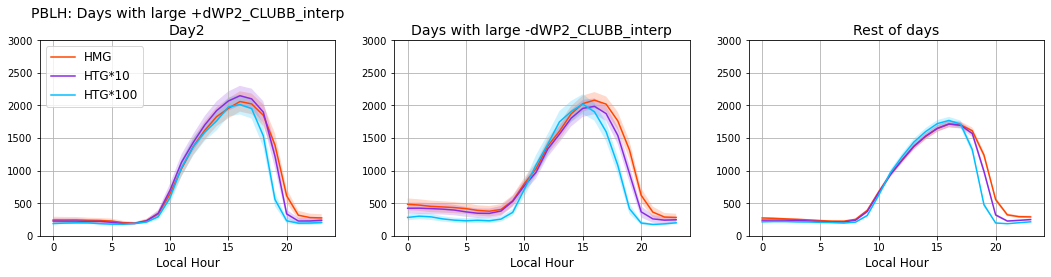

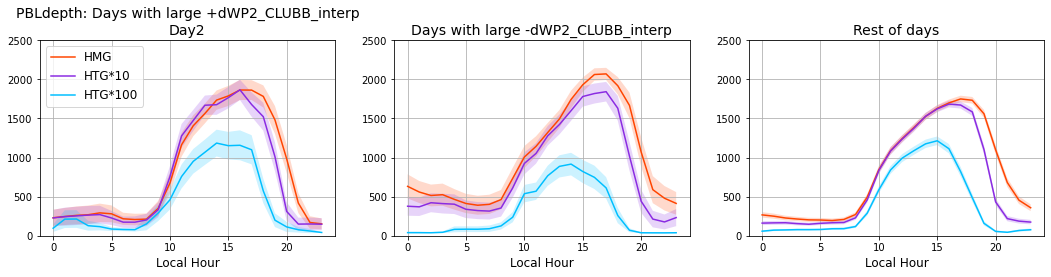

In [29]:
plotDiurnalCycles('PBLH', None, 3000, 0)
# plotDiurnalCycles('PBLdepth_Q', None, 2000, 0)
plotDiurnalCycles('PBLdepth', None, 2500, 0)


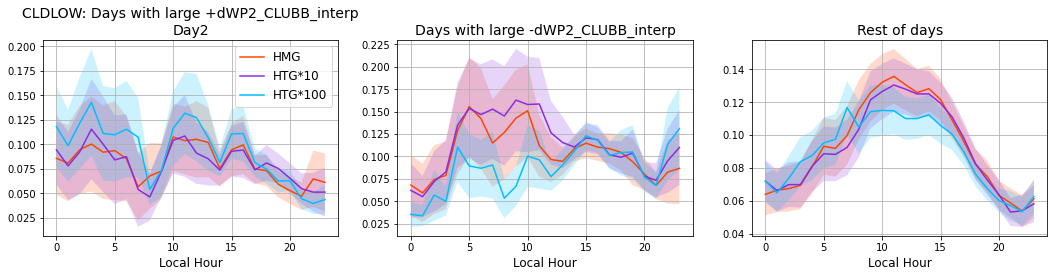

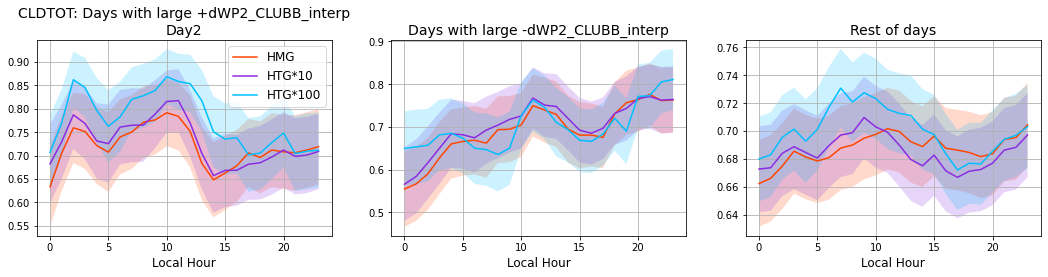

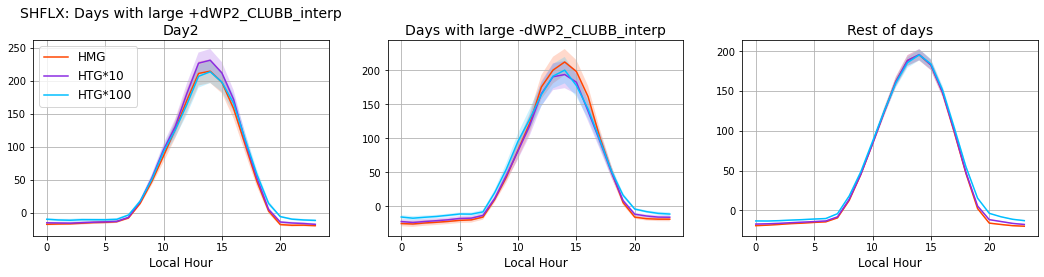

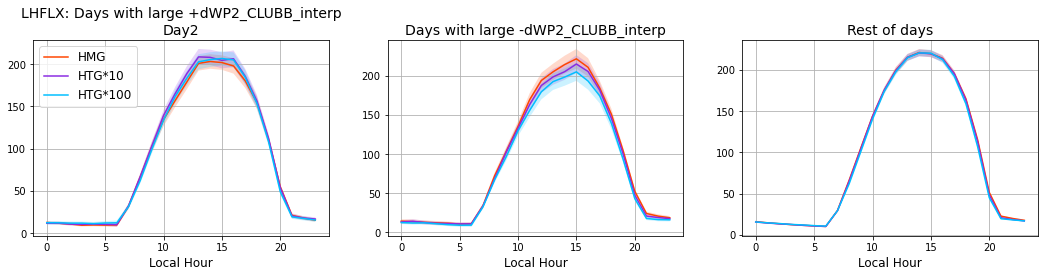

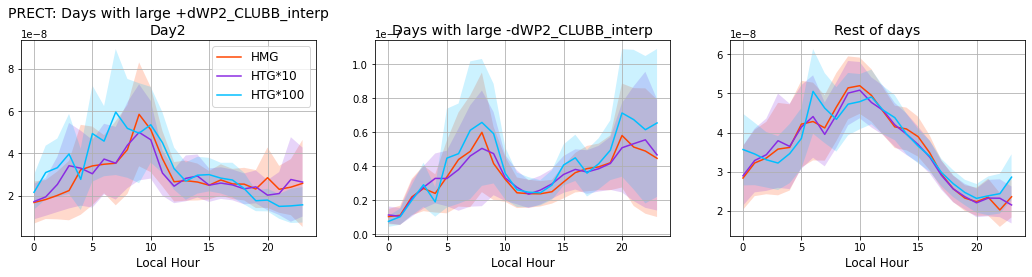

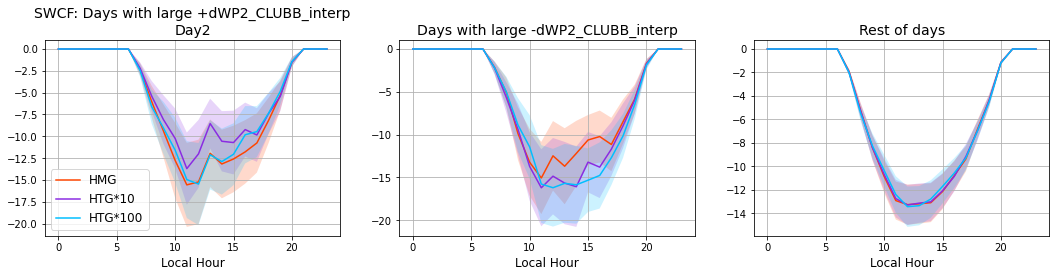

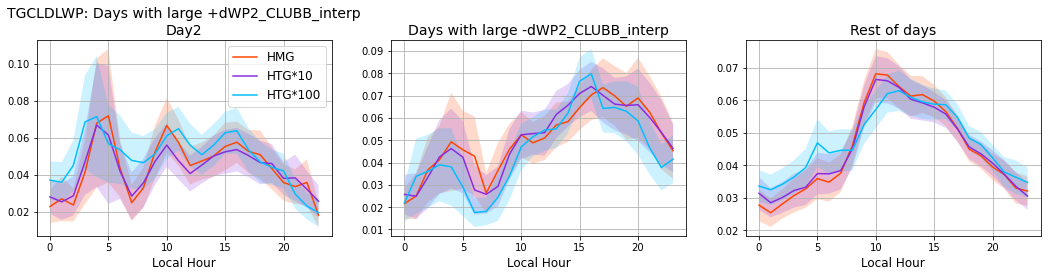

In [30]:
plotDiurnalCycles('CLDLOW', None, None, None)
plotDiurnalCycles('CLDTOT', None, None, None)
plotDiurnalCycles('SHFLX', None, None, None)
plotDiurnalCycles('LHFLX', None, None, None)
plotDiurnalCycles('PRECT', None, None, None)
plotDiurnalCycles('SWCF', None, None, None)
plotDiurnalCycles('TGCLDLWP', None, None, None)


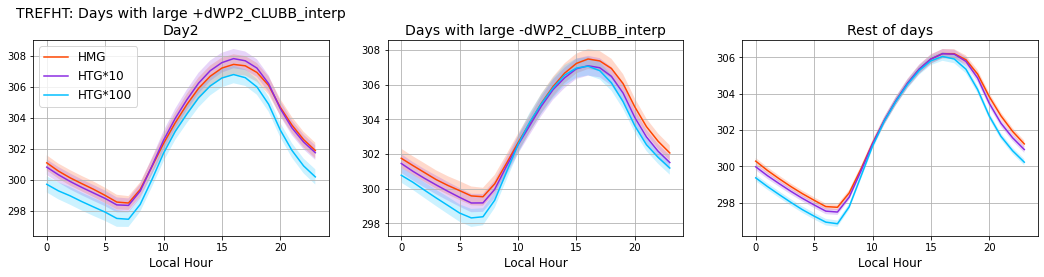

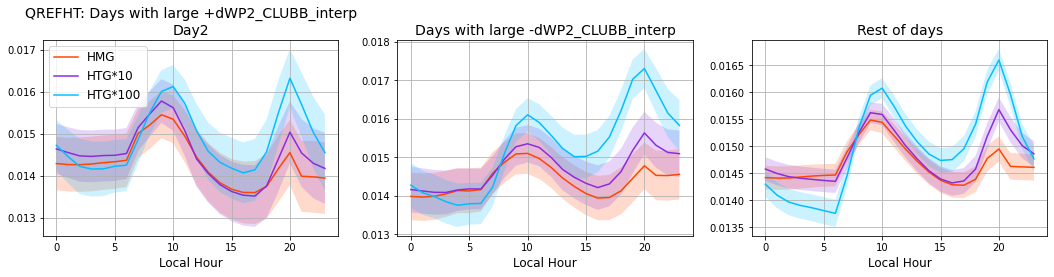

In [31]:
plotDiurnalCycles('TREFHT', None, None, None)
plotDiurnalCycles('QREFHT', None, None, None)


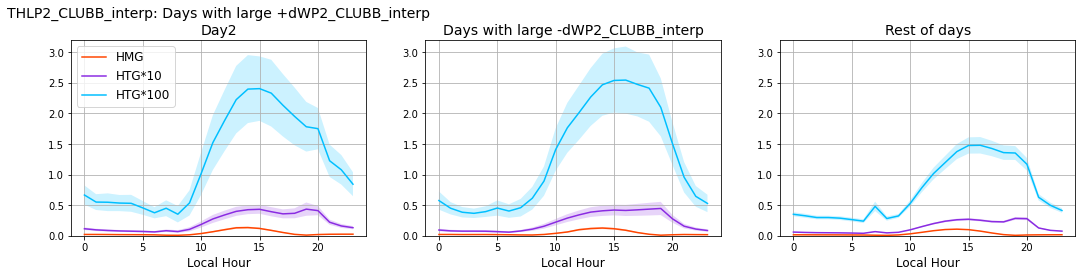

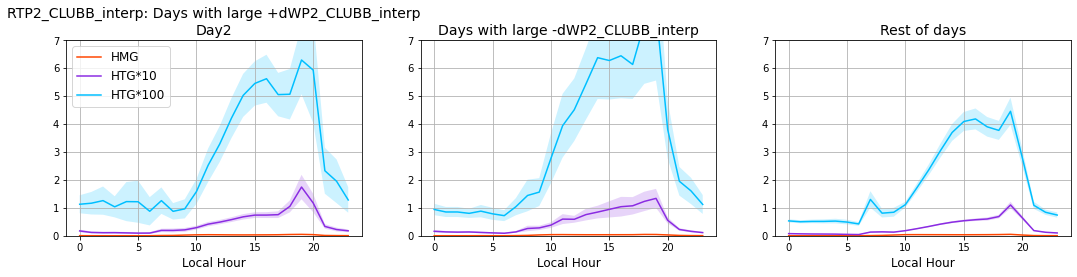

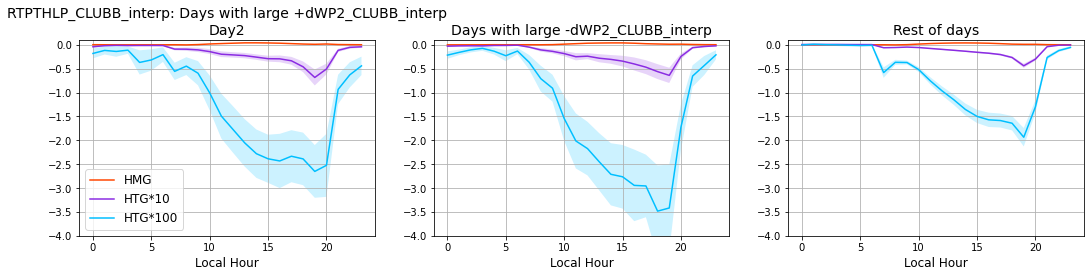

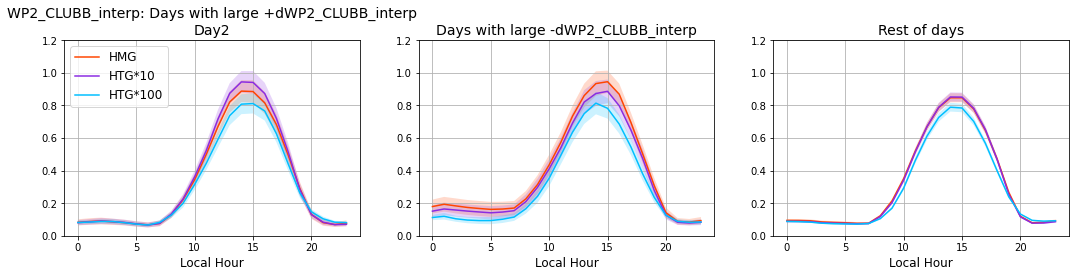

In [34]:
plotDiurnalCycles('THLP2_CLUBB_interp',   -1, 3.2, 0.0)
plotDiurnalCycles('RTP2_CLUBB_interp',    -1, 7.0, 0)
plotDiurnalCycles('RTPTHLP_CLUBB_interp', -1, 0.1, -4.0)
plotDiurnalCycles('WP2_CLUBB_interp',     -1, 1.2, 0)


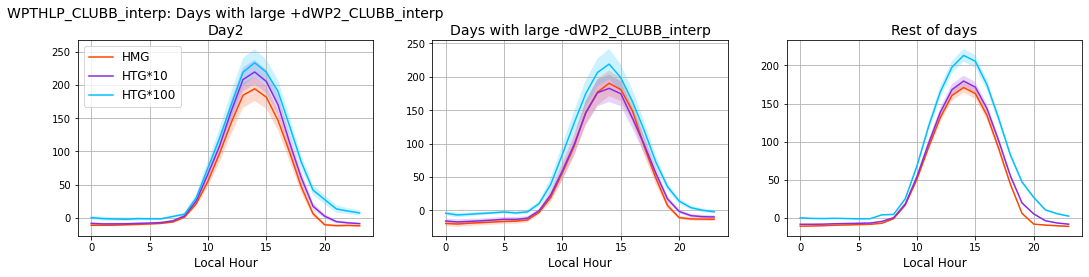

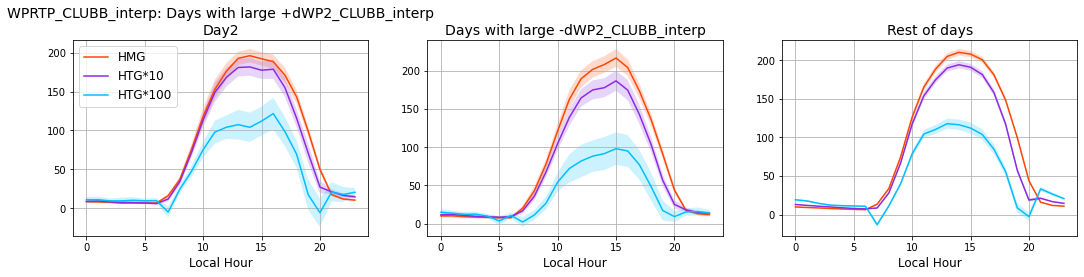

In [35]:
plotDiurnalCycles('WPTHLP_CLUBB_interp', -1, None, None)
plotDiurnalCycles('WPRTP_CLUBB_interp', -1, None, None)


In [31]:
def plotDiurnalCycles_CLM(varSelPlot, yMax, yMin): 
    fig,axs = plt.subplots(2,3, figsize=(18,9))
    axs     = axs.ravel()  
    fig.subplots_adjust(hspace=0.5)
    
    # CIlevel = 1.960   ## 95% CI
    CIlevel = 1.645   ## 90% CI
    
    colorList = ['orangered','turquoise','blueviolet','forestgreen']
    
    # - - - - - - - - - - - - - - - - - - - - - - - - 
    for iCase in range(len(day3_upsample.case.values)): 
        caseName = day3_upsample.case.values[iCase]
        
        ## Plot High pct day
        axs[0].errorbar(np.arange(24),
                       np.squeeze(hrMean_highCLM_day2.isel(case=iCase)[varSelPlot].values),
                       yerr =CIlevel*np.squeeze(hrStd_highCLM_day2.isel(case=iCase)[varSelPlot].values)/np.sqrt(hrMean_highCLM_day2['SampleCount'].values),
                       fmt='-',color=colorList[iCase],capsize=3,label=caseName)
        axs[3].errorbar(np.arange(24),
                       np.squeeze(hrMean_highCLM_day3.isel(case=iCase)[varSelPlot].values),
                       yerr =CIlevel*np.squeeze(hrStd_highCLM_day3.isel(case=iCase)[varSelPlot].values)/np.sqrt(hrMean_highCLM_day3['SampleCount'].values),
                       fmt='-',color=colorList[iCase],capsize=3,label=caseName)

        
        
        ## Plot Low pct days 
        axs[1].errorbar(np.arange(24),
                       np.squeeze(hrMean_lowCLM_day2.isel(case=iCase)[varSelPlot].values),
                       yerr =CIlevel*np.squeeze(hrStd_lowCLM_day2.isel(case=iCase)[varSelPlot].values)/np.sqrt(hrMean_lowCLM_day2['SampleCount'].values),
                       fmt='-',color=colorList[iCase],capsize=3,label=caseName)
        axs[4].errorbar(np.arange(24),
                       np.squeeze(hrMean_lowCLM_day3.isel(case=iCase)[varSelPlot].values),
                       yerr =CIlevel*np.squeeze(hrStd_lowCLM_day3.isel(case=iCase)[varSelPlot].values)/np.sqrt(hrMean_lowCLM_day3['SampleCount'].values),
                       fmt='-',color=colorList[iCase],capsize=3,label=caseName)
         
        
        ## Plot rest of days 
        axs[2].errorbar(np.arange(24),
                       np.squeeze(hrMean_restCLM_day2.isel(case=iCase)[varSelPlot].values),
                       yerr =CIlevel*np.squeeze(hrStd_restCLM_day2.isel(case=iCase)[varSelPlot].values)/np.sqrt(hrMean_restCLM_day2['SampleCount'].values),
                       fmt='-',color=colorList[iCase],capsize=3,label=caseName)
        axs[5].errorbar(np.arange(24),
                       np.squeeze(hrMean_restCLM_day3.isel(case=iCase)[varSelPlot].values),
                       yerr =CIlevel*np.squeeze(hrStd_restCLM_day3.isel(case=iCase)[varSelPlot].values)/np.sqrt(hrMean_restCLM_day3['SampleCount'].values),
                       fmt='-',color=colorList[iCase],capsize=3,label=caseName)
                
    axs[0].legend(fontsize=12)    
    
    # - - - - - - - - - - - - - - - - - - - - - - - -    
    ## Set titles/labels/etc
    # Also label day 2
    axs[0].set_title(varSelPlot+': Days with large +d'+varSel+'\nDay2', fontsize=14)
    axs[1].set_title('Days with large -d'+varSel, fontsize=14)
    axs[2].set_title('Rest of days', fontsize=14)
    axs[3].set_title('Day3', fontsize=14)

    axs[3].set_xlabel('Local Hour', fontsize=12)
    axs[4].set_xlabel('Local Hour', fontsize=12)
    axs[5].set_xlabel('Local Hour', fontsize=12)
    
    # Set axis ranges if desired
    axs[0].set_ylim([yMin, yMax])
    axs[1].set_ylim([yMin, yMax])
    axs[2].set_ylim([yMin, yMax])
    axs[3].set_ylim([yMin, yMax])
    axs[4].set_ylim([yMin, yMax])
    axs[5].set_ylim([yMin, yMax])

    # Set axis ranges if desired
    axs[0].grid()
    axs[1].grid()
    axs[2].grid()
    axs[3].grid()
    axs[4].grid()
    axs[5].grid()
    

    
    return 

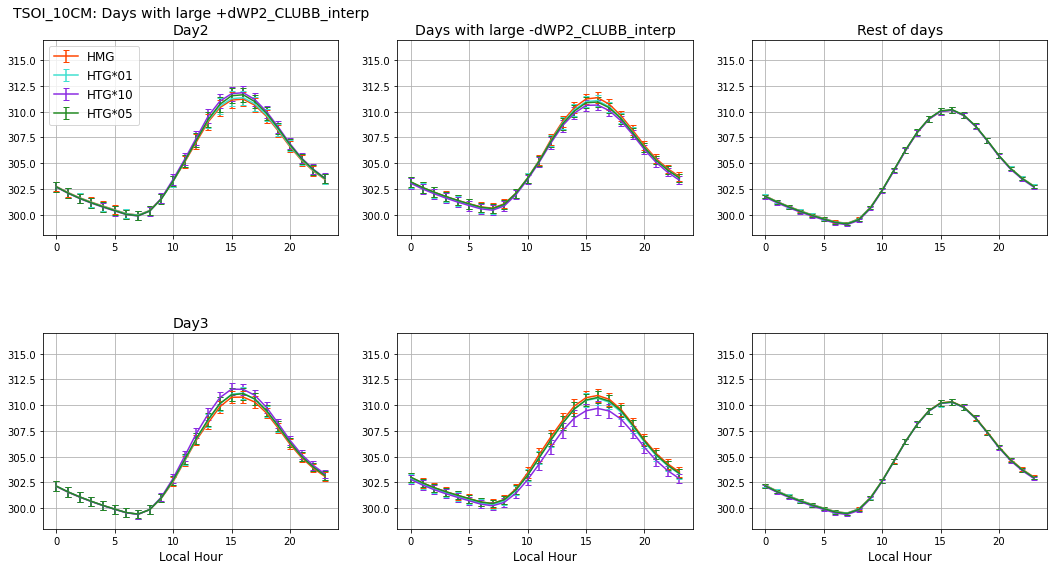

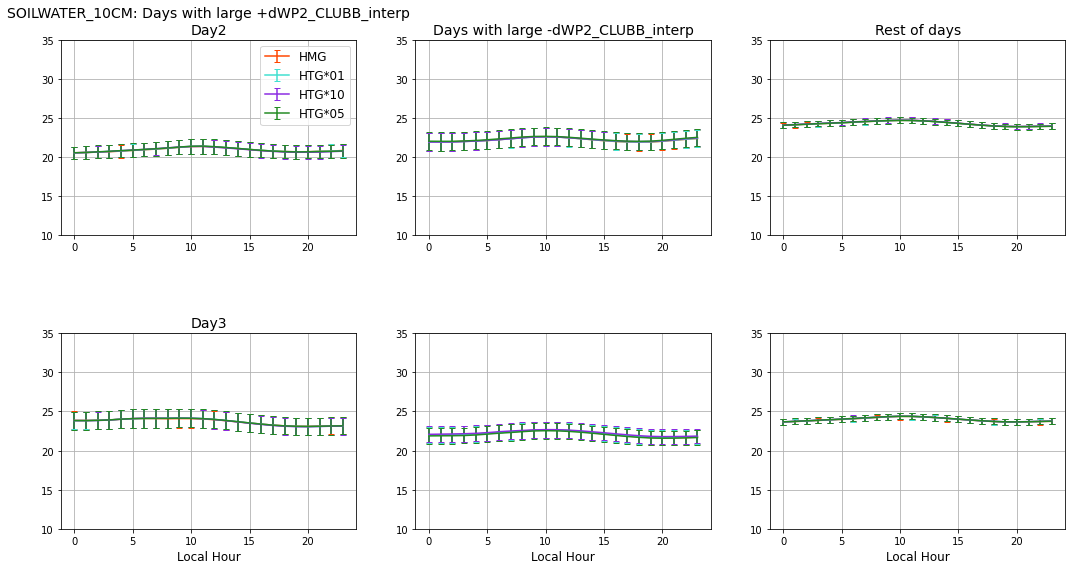

In [32]:
plotDiurnalCycles_CLM('TSOI_10CM', 317, 298)
plotDiurnalCycles_CLM('SOILWATER_10CM', 35, 10)

In [33]:
'''
Give this plotting routine the hourly mean DS' of high/low percentile filtering
'''
## Read in one file that has units on it (once you upsample, they disappear)

saveDir    = '/glade/work/mdfowler/CLASP/histData/processedData/'
realSfcHMG = pickle.load( open( saveDir+"realSfc_HMG_relaxTlongTau_freeSfcT.p" , "rb") )

def plotProfiles_meanOverHours(highPctDS, 
                               lowPctDS,
                               restOfDaysDS,
                               varSelPlot,
                               startHr,endHr,
                               xMin, xMax, maxLev):
    
    caseNames = highPctDS['case'].values
    # colorList = ['orangered','turquoise','blueviolet','forestgreen']
    colorList = ['orangered','dodgerblue','blueviolet','limegreen']
    
    ## Select which levels array to use
    if np.shape(highPctDS[varSelPlot].values)[2]==len(highPctDS.ilev.values):
        levSel = 'ilev'
    elif np.shape(highPctDS[varSelPlot].values)[2]==len(highPctDS.lev.values):
        levSel = 'lev'
    elif np.shape(highPctDS[varSelPlot].values)[2]==len(highPctDS.levInterp.values):
        levSel = 'levInterp'
        
                            
    ## First, get means (& std) over the selected hours and ens cases
    iTimeSel_high = np.where((highPctDS["time.hour"].values>=startHr) & 
                             (highPctDS["time.hour"].values<=endHr))[0]
    iTimeSel_low  = np.where((lowPctDS["time.hour"].values>=startHr) & 
                             (lowPctDS["time.hour"].values<=endHr))[0]
    iTimeSel_rest = np.where((restOfDaysDS["time.hour"].values>=startHr) & 
                             (restOfDaysDS["time.hour"].values<=endHr))[0]
    
    
    hourlyMean_highTimeSel   = highPctDS.isel(time=iTimeSel_high).mean(dim=["time"])
    hourlyMean_lowTimeSel    = lowPctDS.isel(time=iTimeSel_low).mean(dim=["time"])
    hourlyMean_restTimeSel   = restOfDaysDS.isel(time=iTimeSel_rest).mean(dim=["time"])
    
    hourlyStd_highTimeSel   = highPctDS.isel(time=iTimeSel_high).std(dim=["time"])
    hourlyStd_lowTimeSel    = lowPctDS.isel(time=iTimeSel_low).std(dim=["time"])
    hourlyStd_restTimeSel   = restOfDaysDS.isel(time=iTimeSel_rest).std(dim=["time"])
    
    ## - - - - - - - - - - - - - - - - - - - - - - - - - - -
    
    ## Set up figure
    fig,axs = plt.subplots(1,3, figsize=(15,5))
    axs     = axs.ravel()
    fig.subplots_adjust(hspace=0.2)

    atmLevs = highPctDS[levSel].values

    ## Define confidence level to rely on
    # CIlevel = 1.960   ## 95% CI
    CIlevel = 1.645   ## 90% CI
    
    for iCase in range(len(caseNames)):
        varHigh = np.squeeze(hourlyMean_highTimeSel[varSelPlot].isel(case=iCase).values)
        varLow  = np.squeeze(hourlyMean_lowTimeSel[varSelPlot].isel(case=iCase).values)
        varRest = np.squeeze(hourlyMean_restTimeSel[varSelPlot].isel(case=iCase).values)
        
        varHighStd = np.squeeze(hourlyStd_highTimeSel[varSelPlot].isel(case=iCase).values)
        varLowStd  = np.squeeze(hourlyStd_lowTimeSel[varSelPlot].isel(case=iCase).values)
        varRestStd = np.squeeze(hourlyStd_restTimeSel[varSelPlot].isel(case=iCase).values)
        
        ## Look at just HMG and one other case... 
        # if ( (caseNames[iCase]=='HMG') | (caseNames[iCase]=='HTG*01') ):
        axs[0].plot(varHigh, atmLevs,color=colorList[iCase],label=caseNames[iCase])
        axs[0].fill_betweenx(atmLevs, 
                            varHigh-CIlevel*(varHighStd/np.sqrt(len(iTimeSel_high))),
                            varHigh+CIlevel*(varHighStd/np.sqrt(len(iTimeSel_high))),
                            alpha = 0.2, facecolor=colorList[iCase])

        axs[1].plot(varLow, atmLevs,color=colorList[iCase],label=caseNames[iCase])
        axs[1].fill_betweenx(atmLevs, 
                            varLow-CIlevel*(varLowStd/np.sqrt(len(iTimeSel_low))),
                            varLow+CIlevel*(varLowStd/np.sqrt(len(iTimeSel_low))),
                            alpha = 0.2, facecolor=colorList[iCase])

        axs[2].plot(varRest, atmLevs,color=colorList[iCase],label=caseNames[iCase])
        axs[2].fill_betweenx(atmLevs, 
                            varRest-CIlevel*(varRestStd/np.sqrt(len(iTimeSel_rest))),
                            varRest+CIlevel*(varRestStd/np.sqrt(len(iTimeSel_rest))),
                            alpha = 0.2, facecolor=colorList[iCase])

    axs[0].legend(fontsize=12)    

    ## - - - - - - - - - - - - - - - - - - - - - - - - - - -
    # Other plot options
    axs[0].invert_yaxis()
    axs[1].invert_yaxis()
    axs[2].invert_yaxis()

    axs[0].set_ylim([980, maxLev])
    axs[1].set_ylim([980, maxLev])
    axs[2].set_ylim([980, maxLev])
    
    axs[0].set_xlim([xMin, xMax])
    axs[1].set_xlim([xMin, xMax])
    axs[2].set_xlim([xMin, xMax])
    
    axs[1].axes.yaxis.set_ticklabels([])
    axs[2].axes.yaxis.set_ticklabels([])   

    axs[0].set_title(varSelPlot+'\n Large increases in '+varSel, fontsize=16)       
    axs[1].set_title('Large decreases in '+varSel, fontsize=16)
    axs[2].set_title('Remaining days', fontsize=16)

    axs[0].set_xlabel(realSfcHMG[varSelPlot].units, fontsize=12)
    axs[1].set_xlabel(realSfcHMG[varSelPlot].units, fontsize=12)
    axs[2].set_xlabel(realSfcHMG[varSelPlot].units, fontsize=12)
    
    if varSelPlot.endswith('_interp'):
        axs[0].set_ylabel('hPa', fontsize=12)
    else:
        axs[0].set_ylabel('hPa (model hybrid coord)', fontsize=12)

    axs[0].tick_params(axis='both', labelsize= 12)
    axs[1].tick_params(axis='both', labelsize= 12)
    axs[2].tick_params(axis='both', labelsize= 12)

    return

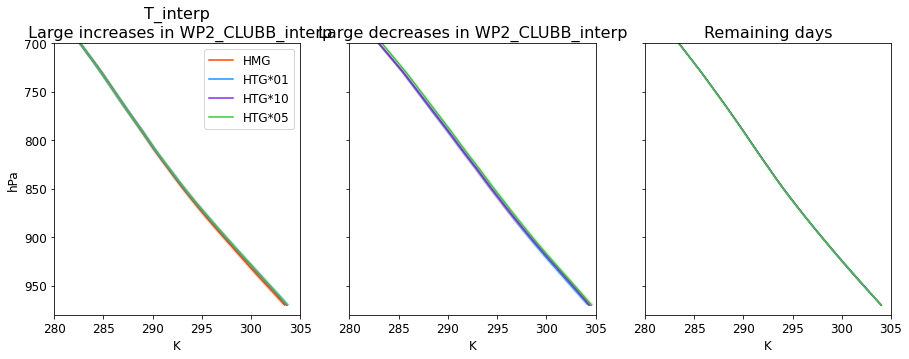

In [138]:
## Which variable do we want to plot?

# varSelPlot = 'THLP2_CLUBB_interp'
# xminPlot   = 0 
# xmaxPlot   = 0.35
# # xmaxPlot   = 0.08

# varSelPlot = 'RTP2_CLUBB_interp'
# xminPlot   = 0.0
# xmaxPlot   = 0.6

# varSelPlot = 'RTPTHLP_CLUBB_interp'
# xminPlot   = -0.04
# xmaxPlot   = 0.04

# varSelPlot = 'WP2_CLUBB_interp'
# xminPlot   = 0.0
# xmaxPlot   = 1.0

# varSelPlot = 'WPRTP_CLUBB_interp'
# xminPlot   = 0.0
# xmaxPlot   = 230

# varSelPlot = 'WPTHLP_CLUBB_interp'
# xminPlot   = -10
# xmaxPlot   = 150

# varSelPlot = 'WP3_CLUBB'
# xminPlot   = -0.2
# xmaxPlot   = 0.2

# varSelPlot = 'TKE_interp'
# xminPlot   = 0.0
# xmaxPlot   = 1.4

# varSelPlot = 'THETAL_interp'
# xminPlot   = 302
# xmaxPlot   = 312

# varSelPlot = 'theta'
# xminPlot   = 304
# xmaxPlot   = 312

varSelPlot = 'T_interp'
xminPlot   = 280
xmaxPlot   = 305

# varSelPlot = 'Q_interp'
# xminPlot   = 0.006
# xmaxPlot   = 0.0175


## Plot day2
plotProfiles_meanOverHours(highPct_day2, 
                           lowPct_day2,
                           restOfDays_day2,
                           varSelPlot,
                           12, 18,  # Start hr, end hr
                           xminPlot,       # Min x value
                           xmaxPlot,     # Max x value
                           700)     # Max level 


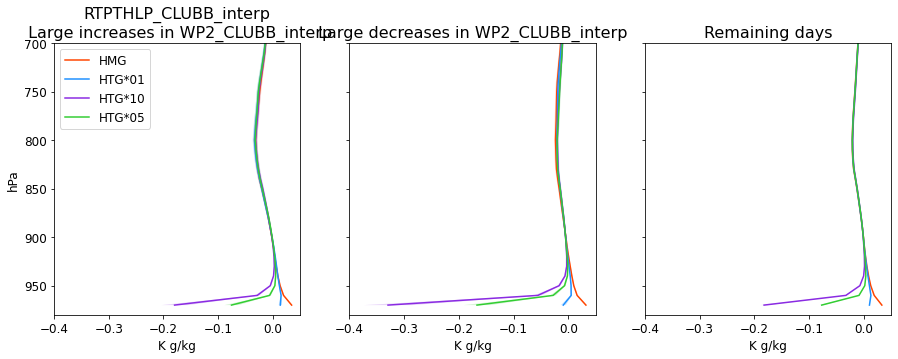

In [119]:
varSelPlot = 'RTPTHLP_CLUBB_interp'
xminPlot   = -0.4
xmaxPlot   = 0.05

## Plot day2
plotProfiles_meanOverHours(highPct_day2, 
                           lowPct_day2,
                           restOfDays_day2,
                           varSelPlot,
                           12, 18,  # Start hr, end hr
                           xminPlot,       # Min x value
                           xmaxPlot,     # Max x value
                           700)     # Max level 

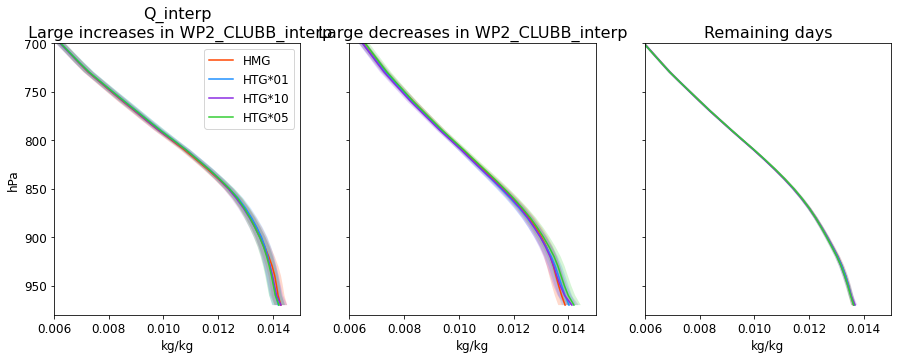

In [135]:
varSelPlot = 'Q_interp'
xminPlot   = 0.006
xmaxPlot   = 0.015


## Plot day2
plotProfiles_meanOverHours(highPct_day2, 
                           lowPct_day2,
                           restOfDays_day2,
                           varSelPlot,
                           12, 18,  # Start hr, end hr
                           xminPlot,       # Min x value
                           xmaxPlot,     # Max x value
                           700)     # Max level 

In [36]:
'''
Plot diurnal cycle of a selected  variable (varSelPlot), from the sfc to some height in the atm (maxLev). 
Plotted for the average highPct, lowPct, and restOfDays datasets. 
'''

def plotTimeHeight_meanDiuranlCycle(highPctDS, lowPctDS, restDS, 
                                    highPctStdDS, lowPctStdDS, restStdDS,
                                    varSelPlot, maxLev, cmapRaw='jet'):
    
    ## Select which levels array to use
    if np.shape(highPctDS[varSelPlot].values)[2]==len(highPctDS.ilev.values):
        levSel = 'ilev'
    elif np.shape(highPctDS[varSelPlot].values)[2]==len(highPctDS.lev.values):
        levSel = 'lev'
    elif np.shape(highPctDS[varSelPlot].values)[2]==len(highPctDS.levInterp.values):
        levSel = 'levInterp'
        
    ## Select variables in requested level range 
    varHigh = highPctDS[varSelPlot].isel(levInterp=np.where(highPctDS.levInterp>=maxLev)[0])
    varLow  = lowPctDS[varSelPlot].isel(levInterp=np.where(lowPctDS.levInterp>=maxLev)[0])
    varRest = restDS[varSelPlot].isel(levInterp=np.where(restDS.levInterp>=maxLev)[0])
    
    ## Compute differences between HTG cases and HMG case 
    diffHTG_high   = np.squeeze(varHigh.sel(case='HTG*01')-varHigh.sel(case='HMG'))
    diffHTG05_high = np.squeeze(varHigh.sel(case='HTG*05')-varHigh.sel(case='HMG'))
    diffHTG10_high = np.squeeze(varHigh.sel(case='HTG*10')-varHigh.sel(case='HMG')) 
    diffHTG100_high = np.squeeze(varHigh.sel(case='HTG*100')-varHigh.sel(case='HMG')) 
    
    diffHTG_low    = np.squeeze(varLow.sel(case='HTG*01')-varLow.sel(case='HMG')) 
    diffHTG05_low  = np.squeeze(varLow.sel(case='HTG*05')-varLow.sel(case='HMG')) 
    diffHTG10_low  = np.squeeze(varLow.sel(case='HTG*10')-varLow.sel(case='HMG')) 
    diffHTG100_low  = np.squeeze(varLow.sel(case='HTG*100')-varLow.sel(case='HMG')) 
    
    diffHTG_rest   = np.squeeze(varRest.sel(case='HTG*01')-varRest.sel(case='HMG')) 
    diffHTG05_rest = np.squeeze(varRest.sel(case='HTG*05')-varRest.sel(case='HMG'))
    diffHTG10_rest = np.squeeze(varRest.sel(case='HTG*10')-varRest.sel(case='HMG')) 
    diffHTG100_rest = np.squeeze(varRest.sel(case='HTG*100')-varRest.sel(case='HMG')) 
    
    ## Define contour levels as between some percentiles... 
    maxPlotRange = 95
    minPlotRange = 5
    
    cMax  = np.nanmax([np.nanpercentile(varHigh.sel(case='HMG'), maxPlotRange), 
                       np.nanpercentile(varLow.sel(case='HMG'),  maxPlotRange), 
                       np.nanpercentile(varRest.sel(case='HMG'), maxPlotRange)])
    cMin  = np.nanmin([np.nanpercentile(varHigh.sel(case='HMG'), minPlotRange),
                       np.nanpercentile(varLow.sel(case='HMG'),  minPlotRange), 
                       np.nanpercentile(varRest.sel(case='HMG'), minPlotRange)])
    cStep = (cMax - cMin)/100.0
    
    
    diffHigh_cMax  = np.nanmax([np.nanpercentile(diffHTG_high,   maxPlotRange),
                                np.nanpercentile(diffHTG05_high, maxPlotRange),
                                np.nanpercentile(diffHTG10_high, maxPlotRange),
                                np.nanpercentile(diffHTG100_high, maxPlotRange)])
    diffHigh_cMin  = np.nanmax([np.nanpercentile(diffHTG_high,   minPlotRange),
                                np.nanpercentile(diffHTG05_high, minPlotRange),
                                np.nanpercentile(diffHTG10_high, minPlotRange),
                                np.nanpercentile(diffHTG100_high, minPlotRange)])
    # diffHigh_cStep = (diffHigh_cMax - diffHigh_cMin)/100.0
    boundsHigh     = np.nanmax([np.abs(diffHigh_cMin), np.abs(diffHigh_cMax)])
    diffHigh_cStep = (2*boundsHigh)/100.0
    levsHigh       = np.arange(-boundsHigh, boundsHigh+diffHigh_cStep, diffHigh_cStep)
    
    
    diffLow_cMax  = np.nanmax([np.nanpercentile(diffHTG_low,   maxPlotRange),
                               np.nanpercentile(diffHTG05_low, maxPlotRange),
                               np.nanpercentile(diffHTG10_low, maxPlotRange),
                               np.nanpercentile(diffHTG100_low, maxPlotRange)])
    diffLow_cMin  = np.nanmax([np.nanpercentile(diffHTG_low,   minPlotRange),
                               np.nanpercentile(diffHTG05_low, minPlotRange),
                               np.nanpercentile(diffHTG100_low, minPlotRange),
                               np.nanpercentile(diffHTG10_low, minPlotRange)])
    # diffLow_cStep = (diffLow_cMax - diffLow_cMin)/100.0
    boundsLow     = np.nanmax([np.abs(diffLow_cMin), np.abs(diffLow_cMax)])
    diffLow_cStep = (2*boundsLow)/100.0
    levsLow       = np.arange(-boundsLow, boundsLow+diffLow_cStep, diffLow_cStep)    
    
    diffRest_cMax  = np.nanmax([np.nanpercentile(diffHTG_rest,   maxPlotRange),
                               np.nanpercentile(diffHTG05_rest, maxPlotRange),
                               np.nanpercentile(diffHTG10_rest, maxPlotRange),
                               np.nanpercentile(diffHTG100_rest, maxPlotRange)])
    diffRest_cMin  = np.nanmax([np.nanpercentile(diffHTG_rest,   minPlotRange),
                               np.nanpercentile(diffHTG05_rest, minPlotRange),
                               np.nanpercentile(diffHTG10_rest, minPlotRange),
                               np.nanpercentile(diffHTG100_rest, minPlotRange)])
    # diffRest_cStep = (diffRest_cMax - diffRest_cMin)/100.0
    boundsRest     = np.nanmax([np.abs(diffRest_cMin), np.abs(diffRest_cMax)])
    diffRest_cStep = (2*boundsRest)/100.0
    levsRest       = np.arange(-boundsRest, boundsRest+diffRest_cStep, diffRest_cStep)
    
    ## - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
    ## Set up figure
    fig,axs = plt.subplots(3,4, figsize=(18,14))
    axs     = axs.ravel()
    fig.subplots_adjust(hspace=0.4)

    hours   = highPctDS.hour.values
    atmLevs = highPctDS[levSel].isel(levInterp=np.where(restDS[levSel]>=maxLev)[0]).values
    
    # Plot raw HMG values: 
    
    contour_plot = axs[0].contourf(hours, atmLevs,
                                 np.squeeze(varHigh.sel(case='HMG')).transpose(),
                                 levels=np.arange(cMin, cMax+cStep, cStep), cmap=cmapRaw ,extend='both')
    contour_plot = axs[4].contourf(hours, atmLevs,
                                 np.squeeze(varLow.sel(case='HMG')).transpose(),
                                 levels=np.arange(cMin, cMax+cStep, cStep), cmap=cmapRaw,extend='both')
    contour_plot = axs[8].contourf(hours, atmLevs,
                                 np.squeeze(varRest.sel(case='HMG')).transpose(),
                                 levels=np.arange(cMin, cMax+cStep, cStep), cmap=cmapRaw,extend='both')
    
    # Add colorbar
    ax_position = axs[8].get_position()
    cbar_ax = fig.add_axes([ax_position.x0-0.025, ax_position.y0-0.08, ax_position.width+0.05, 0.02])
    if ( (varSelPlot=='Q') | (varSelPlot=='Q_interp')):
        cbar = plt.colorbar(contour_plot, orientation='horizontal',cax=cbar_ax,format='%.1e')
        tick_locator = ticker.MaxNLocator(nbins=5)
        cbar.locator = tick_locator
        cbar.update_ticks()
    else:
        cbar = plt.colorbar(contour_plot, orientation='horizontal',cax=cbar_ax)
        tick_locator = ticker.MaxNLocator(nbins=5)
        cbar.locator = tick_locator
        cbar.update_ticks()
    cbar.ax.tick_params(labelsize=12)

    ## - - - - - - - - - - - - - - - - - - - - - - - - - - -
    ## Plot differences (high pct)
    # boundsHigh = np.nanmax([np.abs(diffHigh_cMin), np.abs(diffHigh_cMax)])
    # levsHigh = np.arange(-boundsHigh, boundsHigh+diffHigh_cStep, diffHigh_cStep)
    contour_plot = axs[1].contourf(hours, atmLevs, diffHTG_high.transpose(),
                                   levels=levsHigh, cmap='bwr',extend='both')
    # contour_plot = axs[2].contourf(hours, atmLevs, diffHTG05_high.transpose(),
    #                                levels=levsHigh, cmap='bwr',extend='both')
    contour_plot = axs[2].contourf(hours, atmLevs, diffHTG10_high.transpose(),
                                   levels=levsHigh, cmap='bwr',extend='both')
    contour_plot = axs[3].contourf(hours, atmLevs, diffHTG100_high.transpose(),
                                   levels=levsHigh, cmap='bwr',extend='both')
    # Add colorbar
    ax_position = axs[2].get_position()
    cbar_ax = fig.add_axes([ax_position.x0-0.15, ax_position.y0-0.03, ax_position.width+0.29, 0.02])
    if ( (varSelPlot=='Q') | (varSelPlot=='Q_interp')):
        cbar = plt.colorbar(contour_plot, orientation='horizontal',cax=cbar_ax,format='%.1e')
        tick_locator = ticker.MaxNLocator(nbins=5)
        cbar.locator = tick_locator
        cbar.update_ticks()
    else:
        cbar = plt.colorbar(contour_plot, orientation='horizontal',cax=cbar_ax,format='%.1e')
    cbar.ax.tick_params(labelsize=12)

    ## - - - - - - - - - - - - - - - - - - - - - - - - - - -
    ## Plot differences (low pct)
    # boundsLow = np.nanmax([np.abs(diffLow_cMin), np.abs(diffLow_cMax)])
    # levsLow = np.arange(-boundsLow, boundsLow+diffLow_cStep, diffLow_cStep)    
    contour_plot = axs[5].contourf(hours, atmLevs, diffHTG_low.transpose(),
                                   levels=levsLow, cmap='bwr',extend='both')
    # contour_plot = axs[6].contourf(hours, atmLevs, diffHTG05_low.transpose(),
    #                                levels=levsLow, cmap='bwr',extend='both')
    contour_plot = axs[6].contourf(hours, atmLevs, diffHTG10_low.transpose(),
                                   levels=levsLow, cmap='bwr',extend='both')
    contour_plot = axs[7].contourf(hours, atmLevs, diffHTG100_low.transpose(),
                                   levels=levsLow, cmap='bwr',extend='both')
    # Add colorbar
    ax_position = axs[6].get_position()
    cbar_ax = fig.add_axes([ax_position.x0-0.15, ax_position.y0-0.03, ax_position.width+0.29, 0.02])
    if ( (varSelPlot=='Q') | (varSelPlot=='Q_interp')):
        cbar = plt.colorbar(contour_plot, orientation='horizontal',cax=cbar_ax,format='%.1e')
        tick_locator = ticker.MaxNLocator(nbins=5)
        cbar.locator = tick_locator
        cbar.update_ticks()
    else:
        cbar = plt.colorbar(contour_plot, orientation='horizontal',cax=cbar_ax,format='%.1e')
    cbar.ax.tick_params(labelsize=12)    

    ## - - - - - - - - - - - - - - - - - - - - - - - - - - -
    ## Plot differences (rest)
    # boundsRest = np.nanmax([np.abs(diffRest_cMin), np.abs(diffRest_cMax)])
    # levsRest   = np.arange(-boundsRest, boundsRest+diffRest_cStep, diffRest_cStep)
    contour_plot = axs[9].contourf(hours, atmLevs, diffHTG_rest.transpose(),
                                   levels=levsRest, cmap='bwr',extend='both')
    # contour_plot = axs[10].contourf(hours, atmLevs, diffHTG05_rest.transpose(),
    #                                levels=levsRest, cmap='bwr',extend='both')
    contour_plot = axs[10].contourf(hours, atmLevs, diffHTG10_rest.transpose(),
                                   levels=levsRest, cmap='bwr',extend='both')
    contour_plot = axs[11].contourf(hours, atmLevs, diffHTG100_rest.transpose(),
                                   levels=levsRest, cmap='bwr',extend='both')
    # Add colorbar
    ax_position = axs[10].get_position()
    cbar_ax = fig.add_axes([ax_position.x0-0.15, ax_position.y0-0.07, ax_position.width+0.29, 0.02])
    if ( (varSelPlot=='Q') | (varSelPlot=='Q_interp')):
        cbar = plt.colorbar(contour_plot, orientation='horizontal',cax=cbar_ax,format='%.1e')
        tick_locator = ticker.MaxNLocator(nbins=5)
        cbar.locator = tick_locator
        cbar.update_ticks()
    else:
        cbar = plt.colorbar(contour_plot, orientation='horizontal',cax=cbar_ax,format='%.1e')
    cbar.ax.tick_params(labelsize=12)    
    
    
    ## - - - - - - - - - - - - - - - - - - - - - - - - - - -
    # Other plot options
    axs[0].invert_yaxis()
    axs[1].invert_yaxis()
    axs[2].invert_yaxis()
    axs[3].invert_yaxis()
    axs[4].invert_yaxis()
    axs[5].invert_yaxis()
    axs[6].invert_yaxis()
    axs[7].invert_yaxis()
    axs[8].invert_yaxis()
    axs[9].invert_yaxis()
    axs[10].invert_yaxis()
    axs[11].invert_yaxis()


    axs[0].axes.xaxis.set_ticklabels([])
    axs[1].axes.xaxis.set_ticklabels([])
    axs[2].axes.xaxis.set_ticklabels([])
    axs[3].axes.xaxis.set_ticklabels([])
    axs[4].axes.xaxis.set_ticklabels([])
    axs[5].axes.xaxis.set_ticklabels([])
    axs[6].axes.xaxis.set_ticklabels([])
    axs[7].axes.xaxis.set_ticklabels([])
    
    axs[1].axes.yaxis.set_ticklabels([])
    axs[2].axes.yaxis.set_ticklabels([])
    axs[3].axes.yaxis.set_ticklabels([])
    axs[5].axes.yaxis.set_ticklabels([])
    axs[6].axes.yaxis.set_ticklabels([])
    axs[7].axes.yaxis.set_ticklabels([])
    axs[9].axes.yaxis.set_ticklabels([])
    axs[10].axes.yaxis.set_ticklabels([])
    axs[11].axes.yaxis.set_ticklabels([])
   

    axs[0].set_title(varSelPlot+' (HMG)\n Large values of '+varSel, fontsize=16)
    axs[1].set_title('HTG-HMG', fontsize=16)
    # axs[2].set_title('HTG5-HMG', fontsize=16)
    axs[2].set_title('HTG10-HMG', fontsize=16)
    axs[3].set_title('HTG100-HMG', fontsize=16)
        
    axs[4].set_title('Small values of '+varSel, fontsize=16)
    axs[8].set_title('Remaining days', fontsize=16)

    axs[8].set_xlabel('Local Hour', fontsize=12)
    axs[9].set_xlabel('Local Hour', fontsize=12)
    axs[10].set_xlabel('Local Hour', fontsize=12)
    axs[11].set_xlabel('Local Hour', fontsize=12)

    axs[0].set_ylabel('hPa', fontsize=12)
    axs[4].set_ylabel('hPa', fontsize=12)
    axs[8].set_ylabel('hPa', fontsize=12)


    axs[0].tick_params(axis='both', labelsize= 12)
    axs[1].tick_params(axis='both', labelsize= 12)
    axs[2].tick_params(axis='both', labelsize= 12)
    axs[3].tick_params(axis='both', labelsize= 12)
    axs[4].tick_params(axis='both', labelsize= 12)
    axs[5].tick_params(axis='both', labelsize= 12)
    axs[6].tick_params(axis='both', labelsize= 12)
    axs[7].tick_params(axis='both', labelsize= 12)
    axs[8].tick_params(axis='both', labelsize= 12)
    axs[9].tick_params(axis='both', labelsize= 12)
    axs[10].tick_params(axis='both', labelsize= 12)
    axs[11].tick_params(axis='both', labelsize= 12)
        

    ## - - - - - - - - - - - - - - - - - - - - - - - - - - -
    ## Add markers of significance:
        
    # CIlevel = 1.960   ## 95% CI
    CIlevel = 1.645   ## 90% CI
        
    
    # Select var and select same levels for std DS:
    stdHigh = highPctStdDS[varSelPlot].isel(levInterp=np.where(highPctStdDS.levInterp>=maxLev)[0])
    stdLow  = lowPctStdDS[varSelPlot].isel(levInterp=np.where(lowPctStdDS.levInterp>=maxLev)[0])
    stdRest = restStdDS[varSelPlot].isel(levInterp=np.where(restStdDS.levInterp>=maxLev)[0])
    
    for il in range(len(atmLevs)): 
        stdErr_high = np.squeeze(stdHigh.isel(levInterp=il))/np.sqrt(np.expand_dims(highPctDS['SampleCount'].values, 1))
        stdErr_low  = np.squeeze(stdLow.isel(levInterp=il))/np.sqrt(np.expand_dims(lowPctDS['SampleCount'].values,1 ))
        stdErr_rest = np.squeeze(stdLow.isel(levInterp=il))/np.sqrt(np.expand_dims(restDS['SampleCount'].values,1))
        
        ## High pct
        xmax1_highPct = np.squeeze(varHigh).sel(case='HMG').values[:,il] + (CIlevel*stdErr_high.sel(case='HMG'))
        xmin1_highPct = np.squeeze(varHigh).sel(case='HMG').values[:,il] - (CIlevel*stdErr_high.sel(case='HMG'))
        xmax2_highPct = np.squeeze(varHigh).sel(case='HTG*01').values[:,il] + (CIlevel*stdErr_high.sel(case='HTG*01'))
        xmin2_highPct = np.squeeze(varHigh).sel(case='HTG*01').values[:,il] - (CIlevel*stdErr_high.sel(case='HTG*01'))
        
        xmax2_highPct10 = np.squeeze(varHigh).sel(case='HTG*10').values[:,il] + (CIlevel*stdErr_high.sel(case='HTG*10'))
        xmin2_highPct10 = np.squeeze(varHigh).sel(case='HTG*10').values[:,il] - (CIlevel*stdErr_high.sel(case='HTG*10'))
        
        xmax2_highPct100 = np.squeeze(varHigh).sel(case='HTG*100').values[:,il] + (CIlevel*stdErr_high.sel(case='HTG*100'))
        xmin2_highPct100 = np.squeeze(varHigh).sel(case='HTG*100').values[:,il] - (CIlevel*stdErr_high.sel(case='HTG*100'))
        
        xmax2_highPct05 = np.squeeze(varHigh).sel(case='HTG*05').values[:,il] + (CIlevel*stdErr_high.sel(case='HTG*05'))
        xmin2_highPct05 = np.squeeze(varHigh).sel(case='HTG*05').values[:,il] - (CIlevel*stdErr_high.sel(case='HTG*05'))
    
        ## Low pct
        xmax1_lowPct = np.squeeze(varLow).sel(case='HMG')[:,il] + (CIlevel*stdErr_low.sel(case='HMG'))
        xmin1_lowPct = np.squeeze(varLow).sel(case='HMG')[:,il] - (CIlevel*stdErr_low.sel(case='HMG'))
        xmax2_lowPct = np.squeeze(varLow).sel(case='HTG*01')[:,il] + (CIlevel*stdErr_low.sel(case='HTG*01'))
        xmin2_lowPct = np.squeeze(varLow).sel(case='HTG*01')[:,il] - (CIlevel*stdErr_low.sel(case='HTG*01'))
        
        xmax2_lowPct10 = np.squeeze(varLow).sel(case='HTG*10')[:,il] + (CIlevel*stdErr_low.sel(case='HTG*10'))
        xmin2_lowPct10 = np.squeeze(varLow).sel(case='HTG*10')[:,il] - (CIlevel*stdErr_low.sel(case='HTG*10'))
        
        xmax2_lowPct100 = np.squeeze(varLow).sel(case='HTG*100')[:,il] + (CIlevel*stdErr_low.sel(case='HTG*100'))
        xmin2_lowPct100 = np.squeeze(varLow).sel(case='HTG*100')[:,il] - (CIlevel*stdErr_low.sel(case='HTG*100'))
        
        xmax2_lowPct05 = np.squeeze(varLow).sel(case='HTG*05')[:,il] + (CIlevel*stdErr_low.sel(case='HTG*05'))
        xmin2_lowPct05 = np.squeeze(varLow).sel(case='HTG*05')[:,il] - (CIlevel*stdErr_low.sel(case='HTG*05'))
        
        ## Rest of daty 
        xmax1_rest = np.squeeze(varRest).sel(case='HMG')[:,il] + (CIlevel*stdErr_rest.sel(case='HMG'))
        xmin1_rest = np.squeeze(varRest).sel(case='HMG')[:,il] - (CIlevel*stdErr_rest.sel(case='HMG'))
        xmax2_rest = np.squeeze(varRest).sel(case='HTG*01')[:,il] + (CIlevel*stdErr_rest.sel(case='HTG*01'))
        xmin2_rest = np.squeeze(varRest).sel(case='HTG*01')[:,il] - (CIlevel*stdErr_rest.sel(case='HTG*01'))
        
        xmax2_rest10 = np.squeeze(varRest).sel(case='HTG*10')[:,il] + (CIlevel*stdErr_rest.sel(case='HTG*10'))
        xmin2_rest10 = np.squeeze(varRest).sel(case='HTG*10')[:,il] - (CIlevel*stdErr_rest.sel(case='HTG*10'))
        
        xmax2_rest100 = np.squeeze(varRest).sel(case='HTG*100')[:,il] + (CIlevel*stdErr_rest.sel(case='HTG*100'))
        xmin2_rest100 = np.squeeze(varRest).sel(case='HTG*100')[:,il] - (CIlevel*stdErr_rest.sel(case='HTG*100'))
        
        xmax2_rest05 = np.squeeze(varRest).sel(case='HTG*05')[:,il] + (CIlevel*stdErr_rest.sel(case='HTG*05'))
        xmin2_rest05 = np.squeeze(varRest).sel(case='HTG*05')[:,il] - (CIlevel*stdErr_rest.sel(case='HTG*05'))
        
        
        # Check significance and plot 
        levSig_highPct   = np.ones([24])
        levSig_highPct10 = np.ones([24])
        levSig_highPct100 = np.ones([24])
        levSig_highPct05 = np.ones([24])
        
        levSig_lowPct   = np.ones([24])
        levSig_lowPct10 = np.ones([24])
        levSig_lowPct100 = np.ones([24])
        levSig_lowPct05 = np.ones([24])
        
        levSig_rest   = np.ones([24])
        levSig_rest10 = np.ones([24])
        levSig_rest100 = np.ones([24])
        levSig_rest05 = np.ones([24])
        
        for iHr in range(len(hours)):
            ## ---- High Pct ----
            # HTG
            if ((abs(xmin1_highPct[iHr])>=abs(xmin2_highPct[iHr])) & (abs(xmin1_highPct[iHr])<=abs(xmax2_highPct[iHr]))):
                levSig_highPct[iHr] = 0
            elif ((abs(xmin2_highPct[iHr])>=abs(xmin1_highPct[iHr])) & (abs(xmin2_highPct[iHr])<=abs(xmax1_highPct[iHr]))):
                levSig_highPct[iHr] = 0
            if levSig_highPct[iHr]==1:
                axs[1].plot(hours[iHr],atmLevs[il],'ko',alpha=0.3,markersize=1)
                
            # HTG10
            if ((abs(xmin1_highPct[iHr])>=abs(xmin2_highPct10[iHr])) & (abs(xmin1_highPct[iHr])<=abs(xmax2_highPct10[iHr]))):
                levSig_highPct10[iHr] = 0
            elif ((abs(xmin2_highPct10[iHr])>=abs(xmin1_highPct[iHr])) & (abs(xmin2_highPct10[iHr])<=abs(xmax1_highPct[iHr]))):
                levSig_highPct10[iHr] = 0
            if levSig_highPct10[iHr]==1:
                 axs[2].plot(hours[iHr],atmLevs[il],'ko',alpha=0.3,markersize=1)
                    
            # HTG100
            if ((abs(xmin1_highPct[iHr])>=abs(xmin2_highPct100[iHr])) & (abs(xmin1_highPct[iHr])<=abs(xmax2_highPct100[iHr]))):
                levSig_highPct100[iHr] = 0
            elif ((abs(xmin2_highPct100[iHr])>=abs(xmin1_highPct[iHr])) & (abs(xmin2_highPct100[iHr])<=abs(xmax1_highPct[iHr]))):
                levSig_highPct100[iHr] = 0
            if levSig_highPct100[iHr]==1:
                 axs[3].plot(hours[iHr],atmLevs[il],'ko',alpha=0.3,markersize=1)
                    
            # # HTG05
            # if ((abs(xmin1_highPct[iHr])>=abs(xmin2_highPct05[iHr])) & (abs(xmin1_highPct[iHr])<=abs(xmax2_highPct05[iHr]))):
            #     levSig_highPct05[iHr] = 0
            # elif ((abs(xmin2_highPct05[iHr])>=abs(xmin1_highPct[iHr])) & (abs(xmin2_highPct05[iHr])<=abs(xmax1_highPct[iHr]))):
            #     levSig_highPct05[iHr] = 0
            # if levSig_highPct05[iHr]==1:
            #      axs[2].plot(hours[iHr],atmLevs[il],'ko',alpha=0.3,markersize=1)
                    
                    
            ## ---- Low Pct ----
            # HTG
            if ((abs(xmin1_lowPct[iHr])>=abs(xmin2_lowPct[iHr])) & (abs(xmin1_lowPct[iHr])<=abs(xmax2_lowPct[iHr]))):
                levSig_lowPct[iHr] = 0
            elif ((abs(xmin2_lowPct[iHr])>=abs(xmin1_lowPct[iHr])) & (abs(xmin2_lowPct[iHr])<=abs(xmax1_lowPct[iHr]))):
                levSig_lowPct[iHr] = 0
            if levSig_lowPct[iHr]==1:
                axs[5].plot(hours[iHr],atmLevs[il],'ko',alpha=0.3,markersize=1)
                
            # HTG10
            if ((abs(xmin1_lowPct[iHr])>=abs(xmin2_lowPct10[iHr])) & (abs(xmin1_lowPct[iHr])<=abs(xmax2_lowPct10[iHr]))):
                levSig_lowPct10[iHr] = 0
            elif ((abs(xmin2_lowPct10[iHr])>=abs(xmin1_lowPct[iHr])) & (abs(xmin2_lowPct10[iHr])<=abs(xmax1_lowPct[iHr]))):
                levSig_lowPct10[iHr] = 0
            if levSig_lowPct10[iHr]==1:
                 axs[6].plot(hours[iHr],atmLevs[il],'ko',alpha=0.3,markersize=1)
                    
            # HTG100
            if ((abs(xmin1_lowPct[iHr])>=abs(xmin2_lowPct100[iHr])) & (abs(xmin1_lowPct[iHr])<=abs(xmax2_lowPct100[iHr]))):
                levSig_lowPct100[iHr] = 0
            elif ((abs(xmin2_lowPct100[iHr])>=abs(xmin1_lowPct[iHr])) & (abs(xmin2_lowPct100[iHr])<=abs(xmax1_lowPct[iHr]))):
                levSig_lowPct100[iHr] = 0
            if levSig_lowPct100[iHr]==1:
                 axs[7].plot(hours[iHr],atmLevs[il],'ko',alpha=0.3,markersize=1)
                    
            # # HTG05
            # if ((abs(xmin1_lowPct[iHr])>=abs(xmin2_lowPct05[iHr])) & (abs(xmin1_lowPct[iHr])<=abs(xmax2_lowPct05[iHr]))):
            #     levSig_lowPct05[iHr] = 0
            # elif ((abs(xmin2_lowPct05[iHr])>=abs(xmin1_lowPct[iHr])) & (abs(xmin2_lowPct05[iHr])<=abs(xmax1_lowPct[iHr]))):
            #     levSig_lowPct05[iHr] = 0
            # if levSig_lowPct05[iHr]==1:
            #      axs[6].plot(hours[iHr],atmLevs[il],'ko',alpha=0.3,markersize=1)
            
                
                    
            ## ---- Rest of days ----
            # HTG
            if ((abs(xmin1_rest[iHr])>=abs(xmin2_rest[iHr])) & (abs(xmin1_rest[iHr])<=abs(xmax2_rest[iHr]))):
                levSig_rest[iHr] = 0
            elif ((abs(xmin2_rest[iHr])>=abs(xmin1_rest[iHr])) & (abs(xmin2_rest[iHr])<=abs(xmax1_rest[iHr]))):
                levSig_rest[iHr] = 0
            if levSig_rest[iHr]==1:
                axs[9].plot(hours[iHr],atmLevs[il],'ko',alpha=0.3,markersize=1)
                
            # HTG10
            if ((abs(xmin1_rest[iHr])>=abs(xmin2_rest10[iHr])) & (abs(xmin1_rest[iHr])<=abs(xmax2_rest10[iHr]))):
                levSig_rest10[iHr] = 0
            elif ((abs(xmin2_rest10[iHr])>=abs(xmin1_rest[iHr])) & (abs(xmin2_rest10[iHr])<=abs(xmax1_rest[iHr]))):
                levSig_rest10[iHr] = 0
            if levSig_rest10[iHr]==1:
                 axs[10].plot(hours[iHr],atmLevs[il],'ko',alpha=0.3,markersize=1)
                    
            # HTG100
            if ((abs(xmin1_rest[iHr])>=abs(xmin2_rest100[iHr])) & (abs(xmin1_rest[iHr])<=abs(xmax2_rest100[iHr]))):
                levSig_rest100[iHr] = 0
            elif ((abs(xmin2_rest100[iHr])>=abs(xmin1_rest[iHr])) & (abs(xmin2_rest100[iHr])<=abs(xmax1_rest[iHr]))):
                levSig_rest100[iHr] = 0
            if levSig_rest100[iHr]==1:
                 axs[11].plot(hours[iHr],atmLevs[il],'ko',alpha=0.3,markersize=1)
                    
            # # HTG05
            # if ((abs(xmin1_rest[iHr])>=abs(xmin2_rest05[iHr])) & (abs(xmin1_rest[iHr])<=abs(xmax2_rest05[iHr]))):
            #     levSig_rest05[iHr] = 0
            # elif ((abs(xmin2_rest05[iHr])>=abs(xmin1_rest[iHr])) & (abs(xmin2_rest05[iHr])<=abs(xmax1_rest[iHr]))):
            #     levSig_rest05[iHr] = 0
            # if levSig_rest05[iHr]==1:
            #      axs[10].plot(hours[iHr],atmLevs[il],'ko',alpha=0.3,markersize=1)

    
    return 

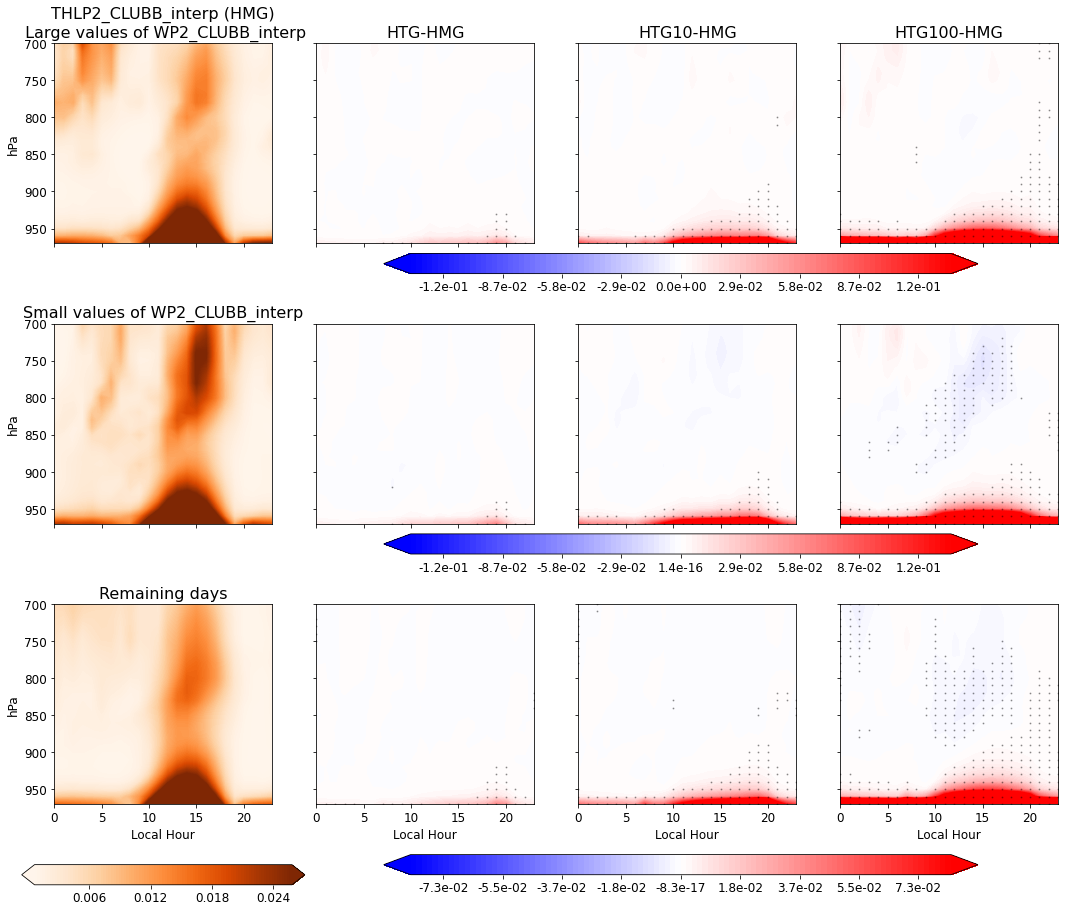

In [38]:
plotTimeHeight_meanDiuranlCycle(hrMean_high_day2, hrMean_low_day2, hrMean_rest_day2, 
                                hrStd_high_day2, hrStd_low_day2, hrStd_rest_day2,
                                # 'RVMTEND_CLUBB_interp', 700,'YlGnBu')
                                # 'WP2_CLUBB_interp', 700,'YlOrRd')
                                # 'RTPTHLP_CLUBB_interp', 700,'Greens')
                                'THLP2_CLUBB_interp', 700,'Oranges')
                                # 'RTP2_CLUBB_interp', 700,'Blues')
        

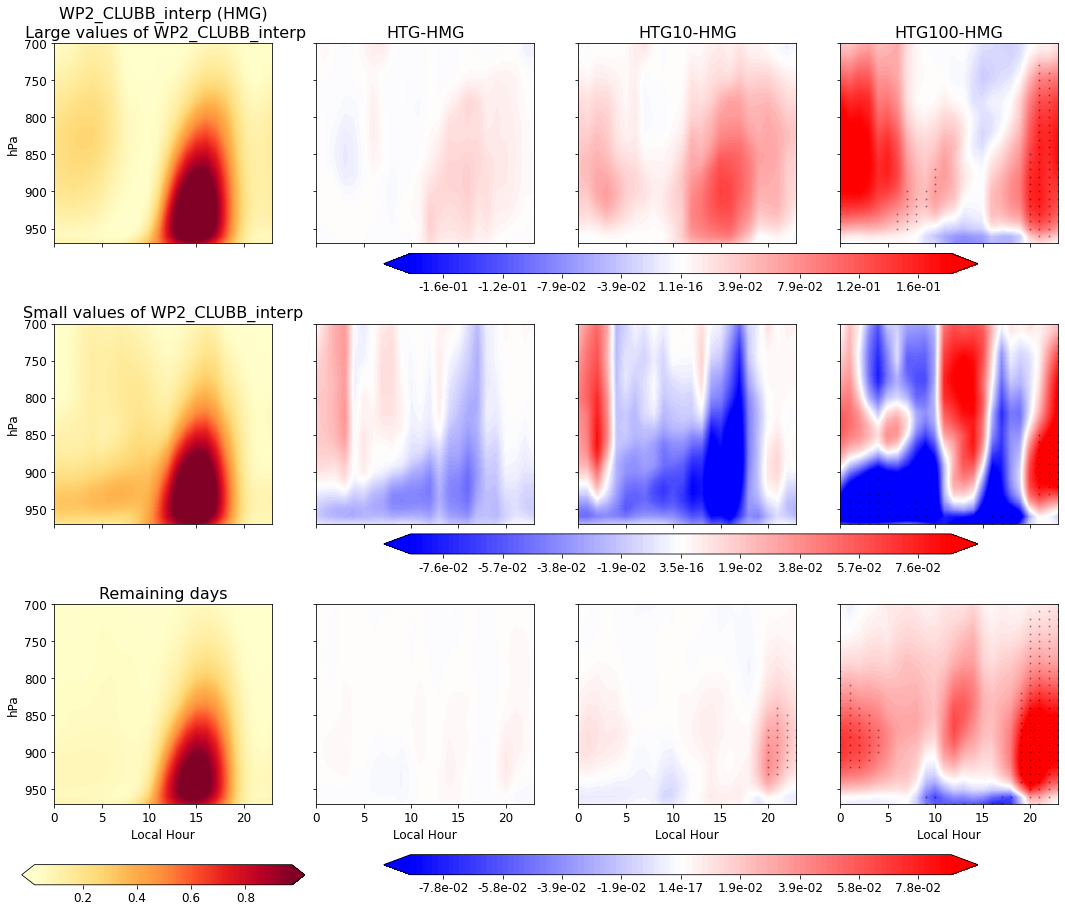

In [39]:
plotTimeHeight_meanDiuranlCycle(hrMean_high_day2, hrMean_low_day2, hrMean_rest_day2, 
                                hrStd_high_day2, hrStd_low_day2, hrStd_rest_day2,
                                # 'RVMTEND_CLUBB_interp', 700,'YlGnBu')
                                'WP2_CLUBB_interp', 700,'YlOrRd')
                                # 'RTPTHLP_CLUBB_interp', 700,'Greens')
                                # 'THLP2_CLUBB_interp', 700,'Oranges')
                                # 'RTP2_CLUBB_interp', 700,'Blues')
        

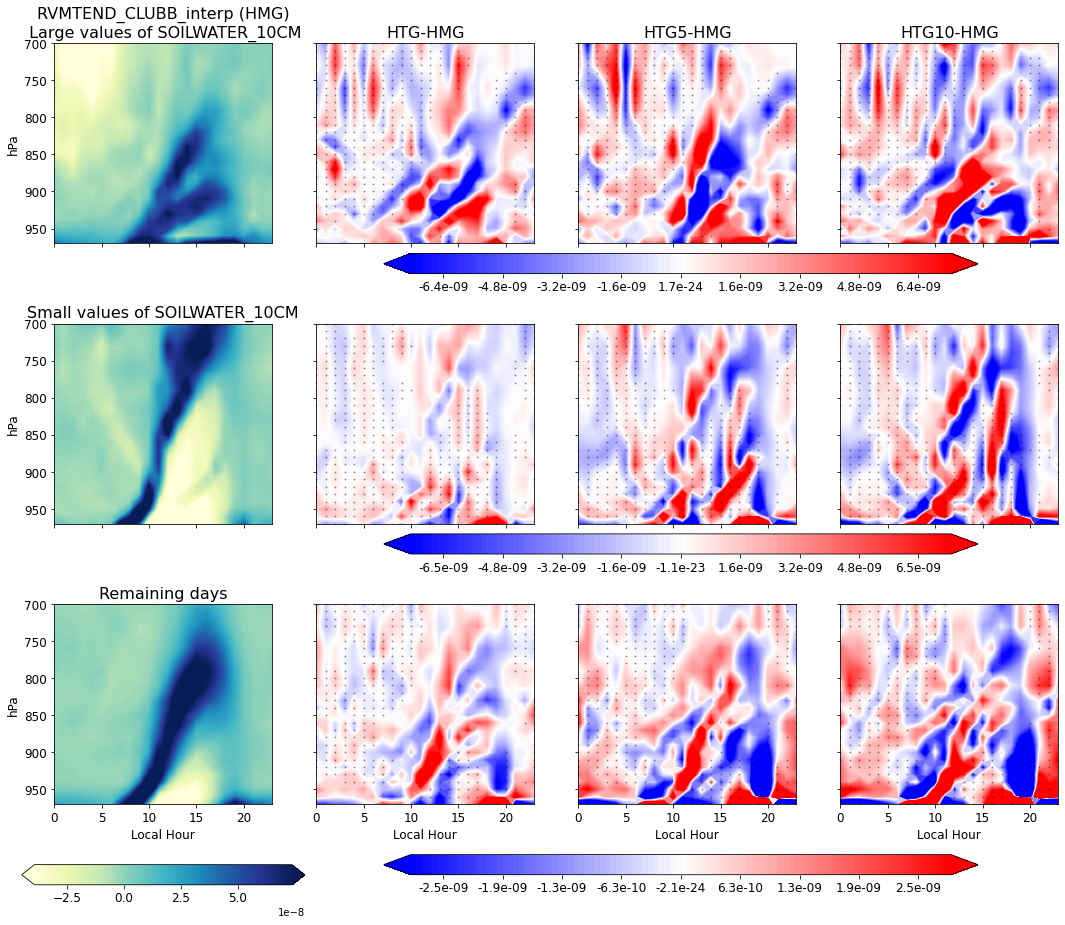

In [47]:
plotTimeHeight_meanDiuranlCycle(hrMean_high_day2, hrMean_low_day2, hrMean_rest_day2, 
                                hrStd_high_day2, hrStd_low_day2, hrStd_rest_day2,
                                'RVMTEND_CLUBB_interp', 700,'YlGnBu')
                                # 'WPRTP_CLUBB_interp', 700,'YlOrRd')


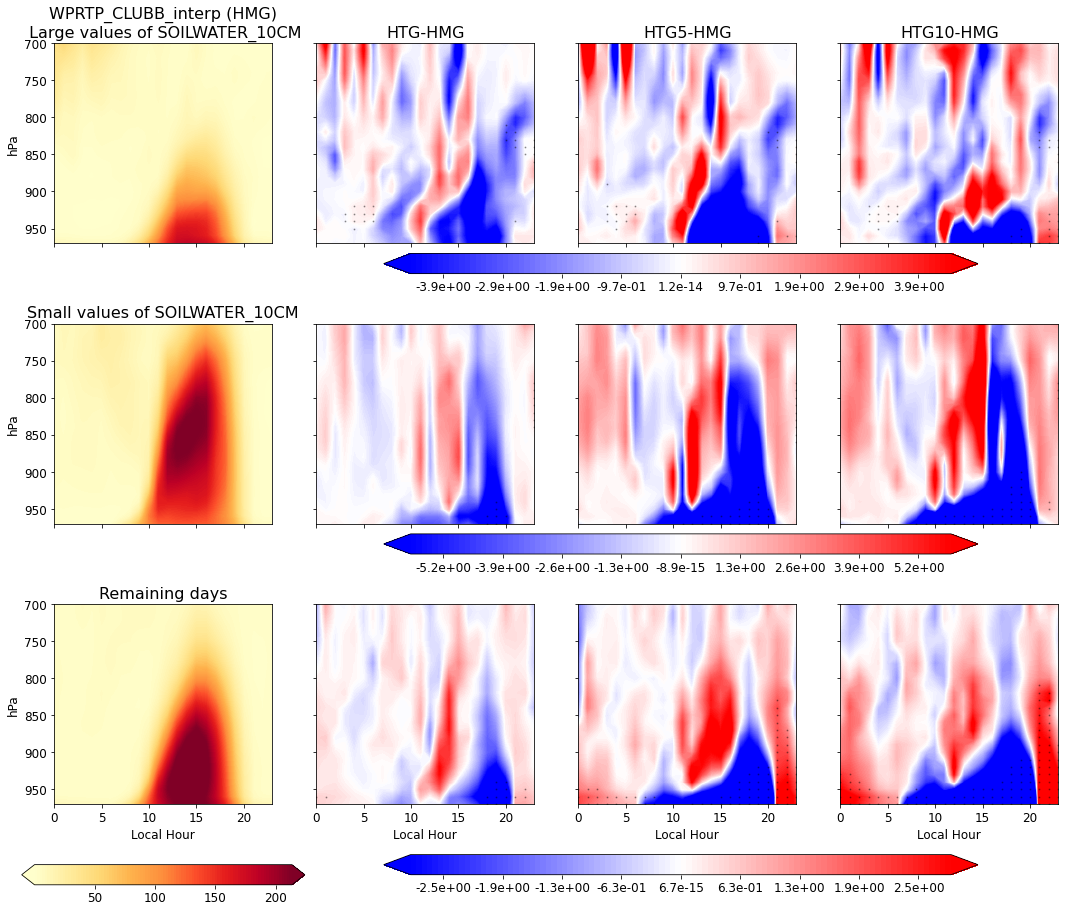

In [48]:
plotTimeHeight_meanDiuranlCycle(hrMean_high_day2, hrMean_low_day2, hrMean_rest_day2, 
                                hrStd_high_day2, hrStd_low_day2, hrStd_rest_day2,
                                # 'RVMTEND_CLUBB_interp', 700,'YlGnBu')
                                'WPRTP_CLUBB_interp', 700,'YlOrRd')


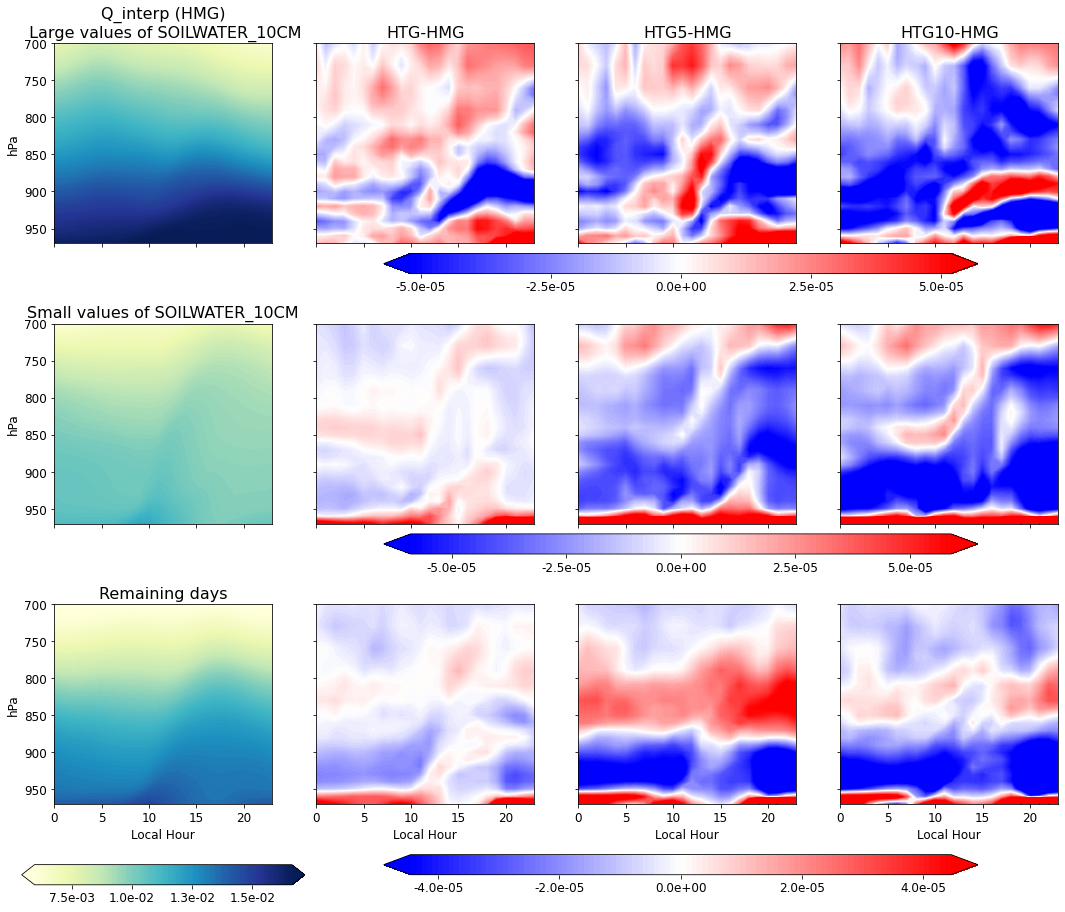

In [32]:
plotTimeHeight_meanDiuranlCycle(hrMean_high_day2, hrMean_low_day2, hrMean_rest_day2, 
                                hrStd_high_day2, hrStd_low_day2, hrStd_rest_day2,
                                'Q_interp', 700,'YlGnBu')
                                # 'THETAL_interp', 700,'Reds_r')


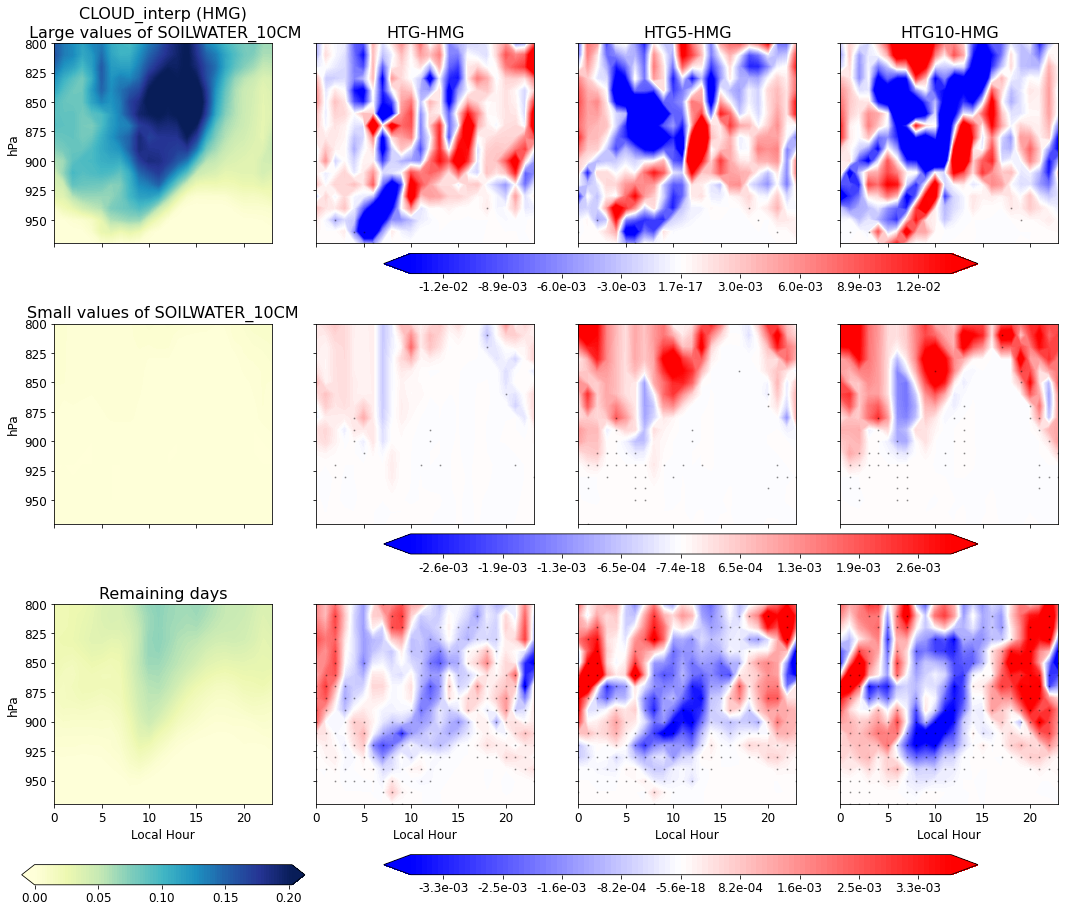

In [50]:
plotTimeHeight_meanDiuranlCycle(hrMean_high_day2, hrMean_low_day2, hrMean_rest_day2, 
                                hrStd_high_day2, hrStd_low_day2, hrStd_rest_day2,
                                'CLOUD_interp', 800,'YlGnBu')
                                # 'THETAL_interp', 700,'Reds_r')


## Scatter plots to understand better?

In [12]:
## Read in obs file to get a sense of large scale forcing

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  

nateFile = '/glade/work/mdfowler/CLASP/clasp-htg.bdate.nc'
nateDS = xr.open_dataset(nateFile, decode_times=True)

## Convert to local time too 
nateDS_local       = nateDS.copy(deep=True)

# Confirmed that all the times are identical, so using the same local time arrays
localTimes = nateDS_local['time'].values - np.timedelta64(5,'h')

# Replace time dimension with local time
nateDS_local = nateDS_local.assign_coords({"time": localTimes})

# Also round to nearest hour, since some are a few minutes before/after minute 00: 
nateDS_HTG_roundHrs = nateDS_local['time'].dt.round("H")
nateDS_local        = nateDS_local.assign_coords({"time": nateDS_HTG_roundHrs})

# Add month_day index
month_day_idx                         = pd.MultiIndex.from_arrays([nateDS_local['time.year'].values,
                                                                nateDS_local['time.month'].values, 
                                                                nateDS_local['time.day'].values])
nateDS_local.coords['year_month_day'] = ('time', month_day_idx)

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -     

In [13]:
def getMeansForVar_noLev(DS, xVar,xStartHr,xEndHr):
    
    # Select requested hours (inclusive)
    iHours_x = np.where( (DS['time.hour']>=xStartHr) & (DS['time.hour']<=xEndHr) )[0]
    
    # Select those hours in the dataset for the requested variables 
    sel_xVar = DS.isel(time=iHours_x)[xVar]

    # For each date, get the mean value over the selected time period 
    xVar_dailyMean = sel_xVar.groupby('year_month_day').mean(dim='time')
    
    return(xVar_dailyMean)
    
    
def getMeansForVar_levRange(DS, xVar,xStartHr,xEndHr,
                            levName, xStartLev, xEndLev):    #startLev would be ~975, endLev ~800 hPa or something
    
    # Select requested hours (inclusive)
    iHours_x = np.where( (DS['time.hour']>=xStartHr) & (DS['time.hour']<=xEndHr) )[0]
    iLevs_x  = np.where( (DS[levName]>=xEndLev) & (DS[levName]<=xStartLev) )[0]
    
    # Select those hours in the dataset for the requested variables 
    sel_xVar = DS.isel(time=iHours_x)[xVar]

    # For each date, get the mean value over the selected time period 
    xVar_dailyMean1 = sel_xVar.groupby('year_month_day').mean(dim='time')
    
    if levName=='levInterp':
        xVar_dailyMean  = xVar_dailyMean1[:,:,iLevs_x,:,:].mean(dim=levName)
    elif ( (levName=='lev') & (len(DS[levName]) ==37) ):
        xVar_dailyMean  = xVar_dailyMean1[:,iLevs_x].mean(dim=levName)
    
    return(xVar_dailyMean)
    
    
def plotScatter(xVar, yVar, xName, yName, xUnits, yUnits):
    fig,axs = plt.subplots(1,1, figsize=(5,5))
    
#     axs.plot(np.squeeze(xVar), np.squeeze(yVar), 'o')
    axs.scatter(np.squeeze(xVar), np.squeeze(yVar))
    
    axs.set_xlabel(xName+' ('+xUnits+')', fontsize=14)
    axs.set_ylabel(yName+' ('+yUnits+')', fontsize=14)
    
    return(axs)
    
    

In [37]:
## Get some useful variables (that don't require a level selection)

pblh_afternoonMean_day2  = getMeansForVar_noLev(day2_upsample, 'PBLH', 12, 18)
pbldepth_afternoonMean_day2  = getMeansForVar_noLev(day2_upsample, 'PBLdepth', 12, 18)
cape_afternoonMean_day2  = getMeansForVar_noLev(day2_upsample, 'CAPE', 12, 18)
tref_afternoonMean_day2  = getMeansForVar_noLev(day2_upsample, 'TREFHT', 12, 18)
qref_afternoonMean_day2  = getMeansForVar_noLev(day2_upsample, 'QREFHT', 12, 18)
shflx_afternoonMean_day2 = getMeansForVar_noLev(day2_upsample, 'SHFLX', 12, 18)
sm10_afternoonMean_day2  = getMeansForVar_noLev(day2_upsampleCLM, 'SOILWATER_10CM', 12, 18)

pblh_afternoonMean_day3  = getMeansForVar_noLev(day3_upsample, 'PBLH', 12, 18)
pbldepth_afternoonMean_day3  = getMeansForVar_noLev(day3_upsample, 'PBLdepth', 12, 18)
cape_afternoonMean_day3  = getMeansForVar_noLev(day3_upsample, 'CAPE', 12, 18)
tref_afternoonMean_day3  = getMeansForVar_noLev(day3_upsample, 'TREFHT', 12, 18)
qref_afternoonMean_day3  = getMeansForVar_noLev(day3_upsample, 'QREFHT', 12, 18)
shflx_afternoonMean_day3 = getMeansForVar_noLev(day3_upsample, 'SHFLX', 12, 18)
sm10_afternoonMean_day3  = getMeansForVar_noLev(day3_upsampleCLM, 'SOILWATER_10CM', 12, 18)


In [80]:
## Get other useful variables (that *do* require a level selection)
wp2_afternoonMean_day2         = getMeansForVar_levRange(day2_upsample, 'WP2_CLUBB_interp',12,18,'levInterp', 950, 800)
wpthlp_afternoonMean_day2      = getMeansForVar_levRange(day2_upsample, 'WPTHLP_CLUBB_interp',12,18,'levInterp', 950, 800)
wprtp_afternoonMean_day2       = getMeansForVar_levRange(day2_upsample, 'WPRTP_CLUBB_interp',12,18, 'levInterp', 950, 800)
thlp2_sfc_afternoonMean_day2   = getMeansForVar_levRange(day2_upsample, 'THLP2_CLUBB_interp',12,18,'levInterp', 950, 800)
rtp2_sfc_afternoonMean_day2    = getMeansForVar_levRange(day2_upsample, 'RTP2_CLUBB_interp',12,18,'levInterp', 950, 800)
rtpthlp_sfc_afternoonMean_day2 = getMeansForVar_levRange(day2_upsample, 'RTPTHLP_CLUBB_interp',12,18,'levInterp', 950, 800)

wp2_afternoonMean_day3         = getMeansForVar_levRange(day3_upsample, 'WP2_CLUBB_interp',12,18,'levInterp', 950, 800)
wpthlp_afternoonMean_day3      = getMeansForVar_levRange(day3_upsample, 'WPTHLP_CLUBB_interp',12,18,'levInterp', 950, 800)
wprtp_afternoonMean_day3       = getMeansForVar_levRange(day3_upsample, 'WPRTP_CLUBB_interp',12,18, 'levInterp', 950, 800)
thlp2_sfc_afternoonMean_day3   = getMeansForVar_levRange(day3_upsample, 'THLP2_CLUBB_interp',12,18,'levInterp', 950, 800)
rtp2_sfc_afternoonMean_day3    = getMeansForVar_levRange(day3_upsample, 'RTP2_CLUBB_interp',12,18,'levInterp', 950, 800)
rtpthlp_sfc_afternoonMean_day3 = getMeansForVar_levRange(day3_upsample, 'RTPTHLP_CLUBB_interp',12,18,'levInterp', 950, 800)


In [81]:
## Compute a few differences (HTG-HMG)
diffPBLH_HTG_day2  = pblh_afternoonMean_day2.sel(case='HTG*01').values  - pblh_afternoonMean_day2.sel(case='HMG').values
diffPBLdepth_HTG_day2  = pbldepth_afternoonMean_day2.sel(case='HTG*01').values  - pbldepth_afternoonMean_day2.sel(case='HMG').values
diffTREF_HTG_day2  = tref_afternoonMean_day2.sel(case='HTG*01').values  - tref_afternoonMean_day2.sel(case='HMG').values
diffSHFLX_HTG_day2 = shflx_afternoonMean_day2.sel(case='HTG*01').values - shflx_afternoonMean_day2.sel(case='HMG').values
diffSM10_HTG_day2  = sm10_afternoonMean_day2.sel(case='HTG*01').values  - sm10_afternoonMean_day2.sel(case='HMG').values

diffWP2_HTG_day2     = wp2_afternoonMean_day2.sel(case='HTG*01').values          - wp2_afternoonMean_day2.sel(case='HMG').values
diffTHLP2_HTG_day2   = thlp2_sfc_afternoonMean_day2.sel(case='HTG*01').values    - thlp2_sfc_afternoonMean_day2.sel(case='HMG').values
diffRTP2_HTG_day2    = rtp2_sfc_afternoonMean_day2.sel(case='HTG*01').values     - rtp2_sfc_afternoonMean_day2.sel(case='HMG').values
diffRTPTHLP_HTG_day2 = rtpthlp_sfc_afternoonMean_day2.sel(case='HTG*01').values  - rtpthlp_sfc_afternoonMean_day2.sel(case='HMG').values
diffWPTHLP_HTG_day2  = wpthlp_afternoonMean_day2.sel(case='HTG*01').values       - wpthlp_afternoonMean_day2.sel(case='HMG').values
diffWPRTP_HTG_day2   = wprtp_afternoonMean_day2.sel(case='HTG*01').values        - wprtp_afternoonMean_day2.sel(case='HMG').values


diffPBLH_HTG_day3  = pblh_afternoonMean_day3.sel(case='HTG*01').values  - pblh_afternoonMean_day3.sel(case='HMG').values
diffPBLdepth_HTG_day3  = pbldepth_afternoonMean_day3.sel(case='HTG*01').values  - pbldepth_afternoonMean_day3.sel(case='HMG').values
diffTREF_HTG_day3  = tref_afternoonMean_day3.sel(case='HTG*01').values  - tref_afternoonMean_day3.sel(case='HMG').values
diffSHFLX_HTG_day3 = shflx_afternoonMean_day3.sel(case='HTG*01').values - shflx_afternoonMean_day3.sel(case='HMG').values
diffSM10_HTG_day3  = sm10_afternoonMean_day3.sel(case='HTG*01').values  - sm10_afternoonMean_day3.sel(case='HMG').values

diffWP2_HTG_day3     = wp2_afternoonMean_day3.sel(case='HTG*01').values          - wp2_afternoonMean_day3.sel(case='HMG').values
diffTHLP2_HTG_day3   = thlp2_sfc_afternoonMean_day3.sel(case='HTG*01').values    - thlp2_sfc_afternoonMean_day3.sel(case='HMG').values
diffRTP2_HTG_day3    = rtp2_sfc_afternoonMean_day3.sel(case='HTG*01').values     - rtp2_sfc_afternoonMean_day3.sel(case='HMG').values
diffRTPTHLP_HTG_day3 = rtpthlp_sfc_afternoonMean_day3.sel(case='HTG*01').values  - rtpthlp_sfc_afternoonMean_day3.sel(case='HMG').values
diffWPTHLP_HTG_day3  = wpthlp_afternoonMean_day3.sel(case='HTG*01').values       - wpthlp_afternoonMean_day3.sel(case='HMG').values
diffWPRTP_HTG_day3   = wprtp_afternoonMean_day3.sel(case='HTG*01').values        - wprtp_afternoonMean_day3.sel(case='HMG').values



In [82]:
## Compute a few differences (HTG-HMG)
diffPBLH_HTG10_day2  = pblh_afternoonMean_day2.sel(case='HTG*10').values  - pblh_afternoonMean_day2.sel(case='HMG').values
diffPBLdepth_HTG10_day2  = pbldepth_afternoonMean_day2.sel(case='HTG*10').values  - pbldepth_afternoonMean_day2.sel(case='HMG').values
diffTREF_HTG10_day2  = tref_afternoonMean_day2.sel(case='HTG*10').values  - tref_afternoonMean_day2.sel(case='HMG').values
diffSHFLX_HTG10_day2 = shflx_afternoonMean_day2.sel(case='HTG*10').values - shflx_afternoonMean_day2.sel(case='HMG').values
diffSM10_HTG10_day2  = sm10_afternoonMean_day2.sel(case='HTG*10').values  - sm10_afternoonMean_day2.sel(case='HMG').values

diffWP2_HTG10_day2     = wp2_afternoonMean_day2.sel(case='HTG*10').values          - wp2_afternoonMean_day2.sel(case='HMG').values
diffTHLP2_HTG10_day2   = thlp2_sfc_afternoonMean_day2.sel(case='HTG*10').values    - thlp2_sfc_afternoonMean_day2.sel(case='HMG').values
diffRTP2_HTG10_day2    = rtp2_sfc_afternoonMean_day2.sel(case='HTG*10').values     - rtp2_sfc_afternoonMean_day2.sel(case='HMG').values
diffRTPTHLP_HTG10_day2 = rtpthlp_sfc_afternoonMean_day2.sel(case='HTG*10').values  - rtpthlp_sfc_afternoonMean_day2.sel(case='HMG').values
diffWPTHLP_HTG10_day2  = wpthlp_afternoonMean_day2.sel(case='HTG*10').values       - wpthlp_afternoonMean_day2.sel(case='HMG').values
diffWPRTP_HTG10_day2   = wprtp_afternoonMean_day2.sel(case='HTG*10').values        - wprtp_afternoonMean_day2.sel(case='HMG').values


diffPBLH_HTG10_day3  = pblh_afternoonMean_day3.sel(case='HTG*10').values  - pblh_afternoonMean_day3.sel(case='HMG').values
diffPBLdepth_HTG10_day3  = pbldepth_afternoonMean_day3.sel(case='HTG*10').values  - pbldepth_afternoonMean_day3.sel(case='HMG').values
diffTREF_HTG10_day3  = tref_afternoonMean_day3.sel(case='HTG*10').values  - tref_afternoonMean_day3.sel(case='HMG').values
diffSHFLX_HTG10_day3 = shflx_afternoonMean_day3.sel(case='HTG*10').values - shflx_afternoonMean_day3.sel(case='HMG').values
diffSM10_HTG10_day3  = sm10_afternoonMean_day3.sel(case='HTG*10').values  - sm10_afternoonMean_day3.sel(case='HMG').values

diffWP2_HTG10_day3     = wp2_afternoonMean_day3.sel(case='HTG*10').values          - wp2_afternoonMean_day3.sel(case='HMG').values
diffTHLP2_HTG10_day3   = thlp2_sfc_afternoonMean_day3.sel(case='HTG*10').values    - thlp2_sfc_afternoonMean_day3.sel(case='HMG').values
diffRTP2_HTG10_day3    = rtp2_sfc_afternoonMean_day3.sel(case='HTG*10').values     - rtp2_sfc_afternoonMean_day3.sel(case='HMG').values
diffRTPTHLP_HTG10_day3 = rtpthlp_sfc_afternoonMean_day3.sel(case='HTG*10').values  - rtpthlp_sfc_afternoonMean_day3.sel(case='HMG').values
diffWPTHLP_HTG10_day3  = wpthlp_afternoonMean_day3.sel(case='HTG*10').values       - wpthlp_afternoonMean_day3.sel(case='HMG').values
diffWPRTP_HTG10_day3   = wprtp_afternoonMean_day3.sel(case='HTG*10').values        - wprtp_afternoonMean_day3.sel(case='HMG').values



In [83]:
'''
Find all the times in the full array (20m dt) that line up with the day classifications above. 
'''
def getTimes_basedOnDates_V2(fullDS, matchDatesDS):
    iTimes = []
    uniqueDates = np.unique(matchDatesDS.year_month_day.values)
    
    for iTime in range(len(uniqueDates)):
#         iKeepTimes = np.where((fullDS['time.year'] == matchDatesDS['time.year'].values[iTime]) &
#                               (fullDS['time.month']== matchDatesDS['time.month'].values[iTime]) & 
#                               (fullDS['time.day']  == matchDatesDS['time.day'].values[iTime]))[0]  
        iKeepTimes = np.where((fullDS['time.year'] == uniqueDates[iTime][0]) &
                              (fullDS['time.month']== uniqueDates[iTime][1]) & 
                              (fullDS['time.day']  == uniqueDates[iTime][2]))    
        iTimes = np.append(iTimes, iKeepTimes).astype(int)
    
    # Now select only those times in the local time array
    DS_dayClass = fullDS.isel(time=iTimes)
    
    return(DS_dayClass)

In [20]:
# Get just the dates that exist in simulations
nateDS_local_day2 = getTimes_basedOnDates_V2(nateDS_local,  day2_upsample)
print('Same dates as day2')

nateDS_local_day3 = getTimes_basedOnDates_V2(nateDS_local,  day3_upsample)
print('Same dates as day3')


Same dates as day2
Same dates as day3


### Qdiv values (low level, early morning) vs. PBLH response

In [25]:
## Means of synoptic conditions 
qdiv_lowLev_morningMean_day2  = getMeansForVar_levRange(nateDS_local_day2, 'q_adv_h',2,7,'lev', 900, 800)
qdiv_lowLev_morningMean_day3  = getMeansForVar_levRange(nateDS_local_day3, 'q_adv_h',2,7,'lev', 900, 800)



(day2) 
R value: -0.114 
P value: 0.032
(day3) 
R value: 0.063 
P value: 0.234


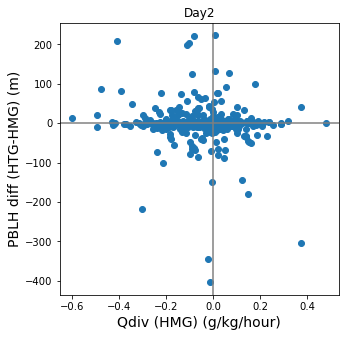

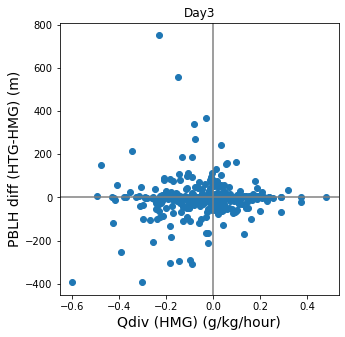

In [33]:
ax = plotScatter( np.squeeze(qdiv_lowLev_morningMean_day2), diffPBLH_HTG_day2,  
            'Qdiv (HMG)', 'PBLH diff (HTG-HMG)', 
            nateDS_local.q_adv_h.units, 'm')
ax.axhline(0,color='grey')
ax.axvline(0,color='grey')
ax.set_title('Day2')

print('(day2) \nR value: %.3f \nP value: %.3f' % stats.pearsonr(np.squeeze(qdiv_lowLev_morningMean_day2), 
                                                       np.squeeze(diffPBLH_HTG_day2)))




ax = plotScatter( np.squeeze(qdiv_lowLev_morningMean_day3), diffPBLH_HTG_day3,  
            'Qdiv (HMG)', 'PBLH diff (HTG-HMG)', 
            nateDS_local.q_adv_h.units, 'm')
ax.axhline(0,color='grey')
ax.axvline(0,color='grey')
ax.set_title('Day3')

print('(day3) \nR value: %.3f \nP value: %.3f' % stats.pearsonr(np.squeeze(qdiv_lowLev_morningMean_day3), 
                                                       np.squeeze(diffPBLH_HTG_day3)))


In [35]:
# ax = plotScatter( np.squeeze(qdiv_lowLev_morningMean_day2), diffPBLH_HTG10_day2,  
#             'Qdiv (HMG)', 'PBLH diff (HTG-HMG)', 
#             nateDS_local.q_adv_h.units, 'm')
# ax.axhline(0,color='grey')
# ax.axvline(0,color='grey')
# ax.set_title('Day2')

# print('(day2) \nR value: %.3f \nP value: %.3f' % stats.pearsonr(np.squeeze(qdiv_lowLev_morningMean_day2), 
#                                                        np.squeeze(diffPBLH_HTG10_day2)))




# ax = plotScatter( np.squeeze(qdiv_lowLev_morningMean_day3), diffPBLH_HTG10_day3,  
#             'Qdiv (HMG)', 'PBLH diff (HTG-HMG)', 
#             nateDS_local.q_adv_h.units, 'm')
# ax.axhline(0,color='grey')
# ax.axvline(0,color='grey')
# ax.set_title('Day3')

# print('(day3) \nR value: %.3f \nP value: %.3f' % stats.pearsonr(np.squeeze(qdiv_lowLev_morningMean_day3), 
#                                                        np.squeeze(diffPBLH_HTG10_day3)))


(day2) 
R value: -0.028 
P value: 0.601
(day3) 
R value: 0.063 
P value: 0.239


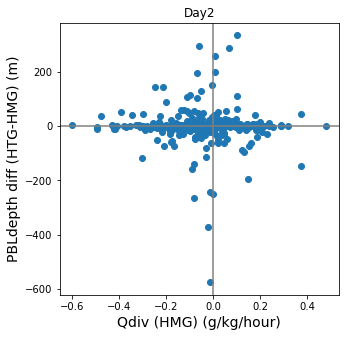

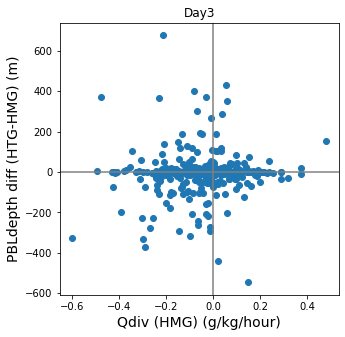

In [40]:
ax = plotScatter( np.squeeze(qdiv_lowLev_morningMean_day2), diffPBLdepth_HTG_day2,  
            'Qdiv (HMG)', 'PBLdepth diff (HTG-HMG)', 
            nateDS_local.q_adv_h.units, 'm')
ax.axhline(0,color='grey')
ax.axvline(0,color='grey')
ax.set_title('Day2')

print('(day2) \nR value: %.3f \nP value: %.3f' % stats.pearsonr(np.squeeze(qdiv_lowLev_morningMean_day2), 
                                                       np.squeeze(diffPBLdepth_HTG_day2)))




ax = plotScatter( np.squeeze(qdiv_lowLev_morningMean_day3), diffPBLdepth_HTG_day3,  
            'Qdiv (HMG)', 'PBLdepth diff (HTG-HMG)', 
            nateDS_local.q_adv_h.units, 'm')
ax.axhline(0,color='grey')
ax.axvline(0,color='grey')
ax.set_title('Day3')

print('(day3) \nR value: %.3f \nP value: %.3f' % stats.pearsonr(np.squeeze(qdiv_lowLev_morningMean_day3), 
                                                       np.squeeze(diffPBLdepth_HTG_day3)))


(day2) 
R value: 0.102 
P value: 0.055


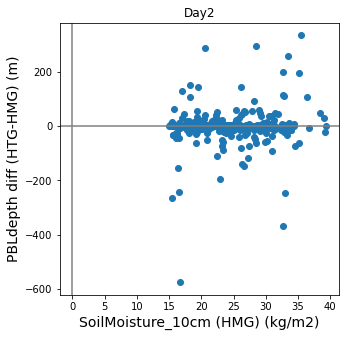

In [60]:
ax = plotScatter( np.squeeze(sm10_afternoonMean_day2.sel(case = 'HMG')), diffPBLdepth_HTG_day2,  
            'SoilMoisture_10cm (HMG)', 'PBLdepth diff (HTG-HMG)', 
            'kg/m2', 'm')
ax.axhline(0,color='grey')
ax.axvline(0,color='grey')
ax.set_title('Day2')

print('(day2) \nR value: %.3f \nP value: %.3f' % stats.pearsonr(np.squeeze(sm10_afternoonMean_day2.sel(case = 'HMG')), 
                                                       np.squeeze(diffPBLdepth_HTG_day2)))





### Low level morning mean v...?

### PBL metric vs. CLUBB variables

(day2)
R value: 0.690 
P value: 1.505e-51
(day3)
R value: 0.717 
P value: 1.849e-57


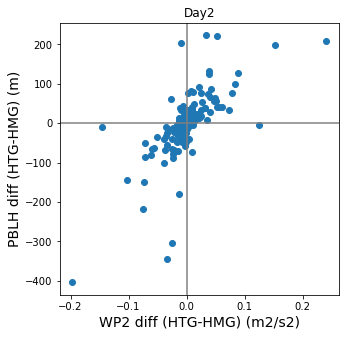

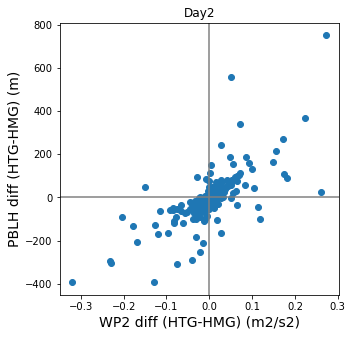

In [84]:
## Plot day2
ax = plotScatter( diffWP2_HTG_day2, diffPBLH_HTG_day2,  
            'WP2 diff (HTG-HMG)', 'PBLH diff (HTG-HMG)', 
            'm2/s2', 'm')
ax.axhline(0,color='grey')
ax.axvline(0,color='grey')
ax.set_title('Day2')

print('(day2)\nR value: %.3f \nP value: %.3e' % stats.pearsonr(np.squeeze(diffWP2_HTG_day2), 
                                                       np.squeeze(diffPBLH_HTG_day2)) )

## Plot day3
ax = plotScatter( diffWP2_HTG_day3, diffPBLH_HTG_day3,  
            'WP2 diff (HTG-HMG)', 'PBLH diff (HTG-HMG)', 
            'm2/s2', 'm')
ax.axhline(0,color='grey')
ax.axvline(0,color='grey')
ax.set_title('Day2')

print('(day3)\nR value: %.3f \nP value: %.3e' % stats.pearsonr(np.squeeze(diffWP2_HTG_day3), 
                                                       np.squeeze(diffPBLH_HTG_day3)) )

(day2)
R value: 0.323 
P value: 4.354e-10
(day3)
R value: 0.372 
P value: 4.213e-13


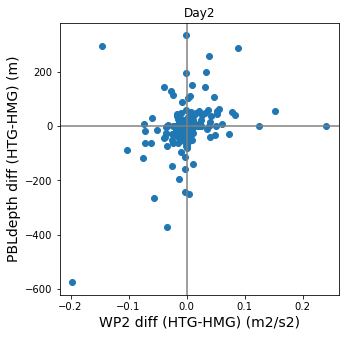

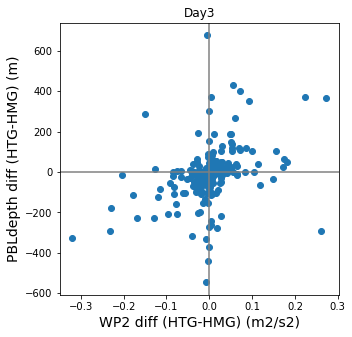

In [85]:
## Plot day2
ax = plotScatter( diffWP2_HTG_day2, diffPBLdepth_HTG_day2,  
            'WP2 diff (HTG-HMG)', 'PBLdepth diff (HTG-HMG)', 
            'm2/s2', 'm')
ax.axhline(0,color='grey')
ax.axvline(0,color='grey')
ax.set_title('Day2')

print('(day2)\nR value: %.3f \nP value: %.3e' % stats.pearsonr(np.squeeze(diffWP2_HTG_day2), 
                                                       np.squeeze(diffPBLdepth_HTG_day2)) )

## Plot day3
ax = plotScatter( diffWP2_HTG_day3, diffPBLdepth_HTG_day3,  
            'WP2 diff (HTG-HMG)', 'PBLdepth diff (HTG-HMG)', 
            'm2/s2', 'm')
ax.axhline(0,color='grey')
ax.axvline(0,color='grey')
ax.set_title('Day3')

print('(day3)\nR value: %.3f \nP value: %.3e' % stats.pearsonr(np.squeeze(diffWP2_HTG_day3), 
                                                       np.squeeze(diffPBLdepth_HTG_day3)) )

(day2)
R value: 0.076 
P value: 1.519e-01
(day3)
R value: 0.217 
P value: 3.669e-05


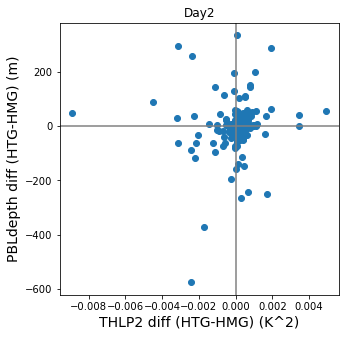

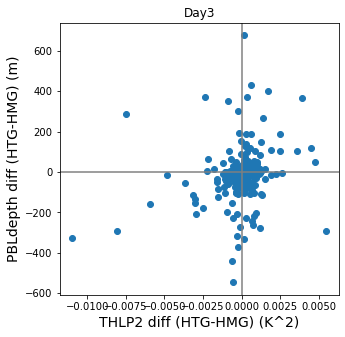

In [86]:
## Plot day2
ax = plotScatter( diffTHLP2_HTG_day2, diffPBLdepth_HTG_day2,  
            'THLP2 diff (HTG-HMG)', 'PBLdepth diff (HTG-HMG)', 
            'K^2', 'm')
ax.axhline(0,color='grey')
ax.axvline(0,color='grey')
ax.set_title('Day2')

print('(day2)\nR value: %.3f \nP value: %.3e' % stats.pearsonr(np.squeeze(diffTHLP2_HTG_day2), 
                                                       np.squeeze(diffPBLdepth_HTG_day2)) )

## Plot day3
ax = plotScatter( diffTHLP2_HTG_day3, diffPBLdepth_HTG_day3,  
            'THLP2 diff (HTG-HMG)', 'PBLdepth diff (HTG-HMG)', 
            'K^2', 'm')
ax.axhline(0,color='grey')
ax.axvline(0,color='grey')
ax.set_title('Day3')

print('(day3)\nR value: %.3f \nP value: %.3e' % stats.pearsonr(np.squeeze(diffTHLP2_HTG_day3), 
                                                       np.squeeze(diffPBLdepth_HTG_day3)) )

(day2)
R value: 0.291 
P value: 2.329e-08
(day3)
R value: 0.298 
P value: 9.813e-09


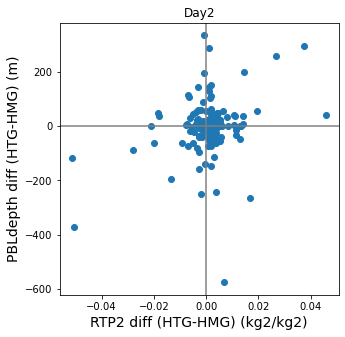

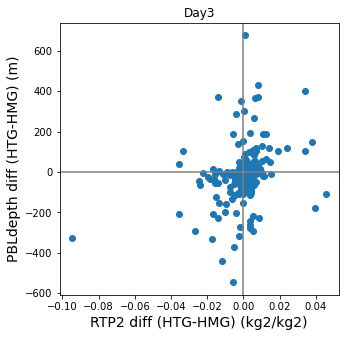

In [87]:
## Plot day2
ax = plotScatter( diffRTP2_HTG_day2, diffPBLdepth_HTG_day2,  
            'RTP2 diff (HTG-HMG)', 'PBLdepth diff (HTG-HMG)', 
            'kg2/kg2', 'm')
ax.axhline(0,color='grey')
ax.axvline(0,color='grey')
ax.set_title('Day2')

print('(day2)\nR value: %.3f \nP value: %.3e' % stats.pearsonr(np.squeeze(diffRTP2_HTG_day2), 
                                                       np.squeeze(diffPBLdepth_HTG_day2)) )

## Plot day3
ax = plotScatter( diffRTP2_HTG_day3, diffPBLdepth_HTG_day3,  
            'RTP2 diff (HTG-HMG)', 'PBLdepth diff (HTG-HMG)', 
            'kg2/kg2', 'm')
ax.axhline(0,color='grey')
ax.axvline(0,color='grey')
ax.set_title('Day3')

print('(day3)\nR value: %.3f \nP value: %.3e' % stats.pearsonr(np.squeeze(diffRTP2_HTG_day3), 
                                                       np.squeeze(diffPBLdepth_HTG_day3)) )

(day2)
R value: 0.476 
P value: 1.501e-21
(day3)
R value: 0.636 
P value: 8.711e-42


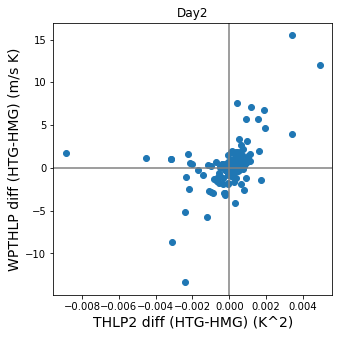

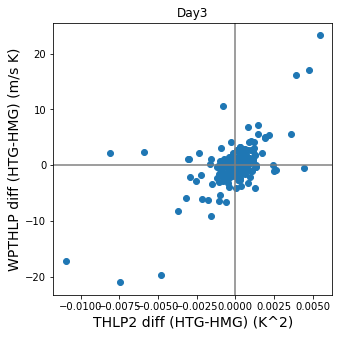

In [88]:
## Plot day2
ax = plotScatter( diffTHLP2_HTG_day2, diffWPTHLP_HTG_day2,  
            'THLP2 diff (HTG-HMG)', 'WPTHLP diff (HTG-HMG)', 
            'K^2', 'm/s K')
ax.axhline(0,color='grey')
ax.axvline(0,color='grey')
ax.set_title('Day2')

print('(day2)\nR value: %.3f \nP value: %.3e' % stats.pearsonr(np.squeeze(diffTHLP2_HTG_day2), 
                                                       np.squeeze(diffWPTHLP_HTG_day2)) )

## Plot day3
ax = plotScatter( diffTHLP2_HTG_day3, diffWPTHLP_HTG_day3,  
            'THLP2 diff (HTG-HMG)', 'WPTHLP diff (HTG-HMG)', 
            'K^2', 'm/s K')
ax.axhline(0,color='grey')
ax.axvline(0,color='grey')
ax.set_title('Day3')

print('(day3)\nR value: %.3f \nP value: %.3e' % stats.pearsonr(np.squeeze(diffTHLP2_HTG_day3), 
                                                       np.squeeze(diffWPTHLP_HTG_day3)) )

(day2)
R value: 0.862 
P value: 1.177e-106
(day2)
R value: 0.748 
P value: 4.313e-65


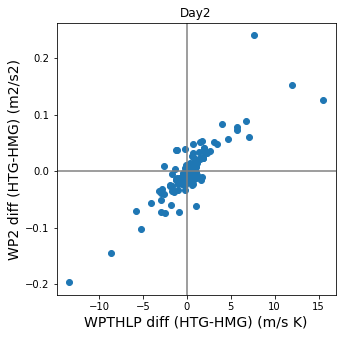

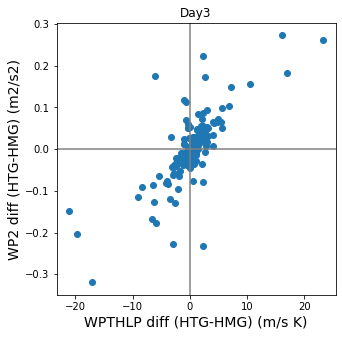

In [89]:
## Plot day2
ax = plotScatter( diffWPTHLP_HTG_day2, diffWP2_HTG_day2,  
            'WPTHLP diff (HTG-HMG)', 'WP2 diff (HTG-HMG)', 
            'm/s K','m2/s2')
ax.axhline(0,color='grey')
ax.axvline(0,color='grey')
ax.set_title('Day2')

print('(day2)\nR value: %.3f \nP value: %.3e' % stats.pearsonr(np.squeeze(diffWPTHLP_HTG_day2), 
                                                       np.squeeze(diffWP2_HTG_day2)) )

## Plot day3
ax = plotScatter( diffWPTHLP_HTG_day3, diffWP2_HTG_day3,  
            'WPTHLP diff (HTG-HMG)', 'WP2 diff (HTG-HMG)', 
            'm/s K','m2/s2')
ax.axhline(0,color='grey')
ax.axvline(0,color='grey')
ax.set_title('Day3')

print('(day2)\nR value: %.3f \nP value: %.3e' % stats.pearsonr(np.squeeze(diffWPTHLP_HTG_day3), 
                                                       np.squeeze(diffWP2_HTG_day3)) )

In [47]:
def plotScatter_shade(xVar, yVar, xName, yName, xUnits, yUnits, shadeVar, shadeName, cmapSel):
    fig,axs = plt.subplots(1,1, figsize=(5,5))
    
#     axs.plot(np.squeeze(xVar), np.squeeze(yVar), 'o')

    selMax = np.nanpercentile(np.abs(shadeVar), 90)
    optMin = np.nanpercentile(shadeVar,10)    #Used for better showing CAPE diffs 
    
    sc = axs.scatter(np.squeeze(xVar), np.squeeze(yVar), c=shadeVar, cmap = cmapSel, alpha=0.8,
#                     vmax=selMax,vmin=optMin)
                    vmax=selMax,vmin=-selMax)
    
    axs.set_xlabel(xName+' ('+xUnits+')', fontsize=14)
    axs.set_ylabel(yName+' ('+yUnits+')', fontsize=14)
    
    plt.colorbar(sc,label=shadeName)
    
    return(axs)
    

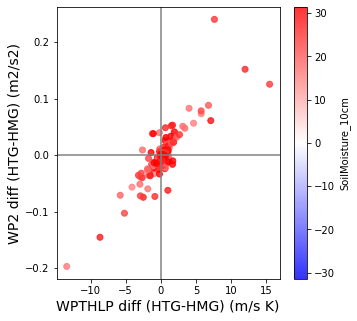

In [90]:
ax = plotScatter_shade( diffWPTHLP_HTG_day2, diffWP2_HTG_day2,  
            'WPTHLP diff (HTG-HMG)', 'WP2 diff (HTG-HMG)', 
            'm/s K', 'm2/s2',
            sm10_afternoonMean_day2.sel(case = 'HMG'),'SoilMoisture_10cm', 'bwr')
ax.axhline(0,color='grey')
ax.axvline(0,color='grey')


Text(0.5, 1.0, 'Day3')

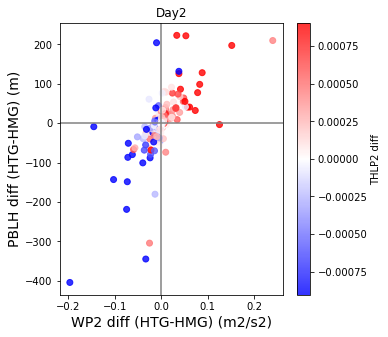

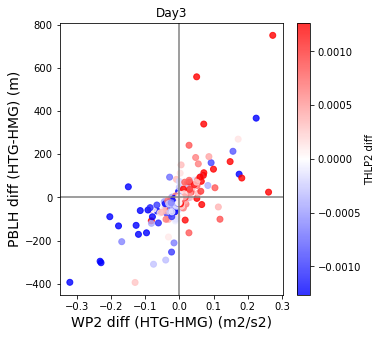

In [91]:
ax = plotScatter_shade( diffWP2_HTG_day2, diffPBLH_HTG_day2,  
            'WP2 diff (HTG-HMG)', 'PBLH diff (HTG-HMG)', 
            'm2/s2', 'm',
            diffTHLP2_HTG_day2,'THLP2 diff', 'bwr')
ax.axhline(0,color='grey')
ax.axvline(0,color='grey')
ax.set_title('Day2')

ax = plotScatter_shade( diffWP2_HTG_day3, diffPBLH_HTG_day3,  
            'WP2 diff (HTG-HMG)', 'PBLH diff (HTG-HMG)', 
            'm2/s2', 'm',
            diffTHLP2_HTG_day3,'THLP2 diff', 'bwr')
ax.axhline(0,color='grey')
ax.axvline(0,color='grey')
ax.set_title('Day3')



Text(0.5, 1.0, 'Day3')

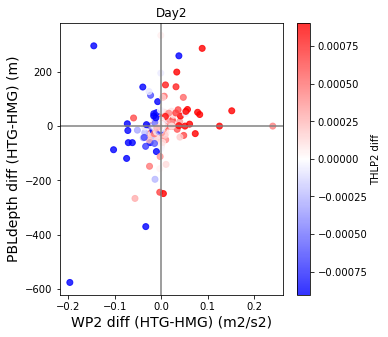

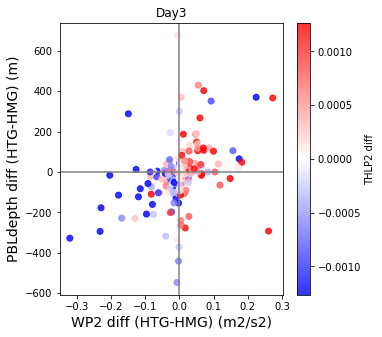

In [92]:
ax = plotScatter_shade( diffWP2_HTG_day2, diffPBLdepth_HTG_day2,  
            'WP2 diff (HTG-HMG)', 'PBLdepth diff (HTG-HMG)', 
            'm2/s2', 'm',
            diffTHLP2_HTG_day2,'THLP2 diff', 'bwr')
ax.axhline(0,color='grey')
ax.axvline(0,color='grey')
ax.set_title('Day2')

ax = plotScatter_shade( diffWP2_HTG_day3, diffPBLdepth_HTG_day3,  
            'WP2 diff (HTG-HMG)', 'PBLdepth diff (HTG-HMG)', 
            'm2/s2', 'm',
            diffTHLP2_HTG_day3,'THLP2 diff', 'bwr')
ax.axhline(0,color='grey')
ax.axvline(0,color='grey')
ax.set_title('Day3')



Text(0.5, 1.0, 'Day3')

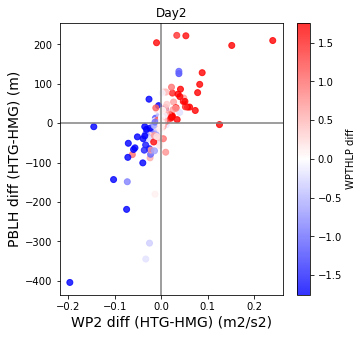

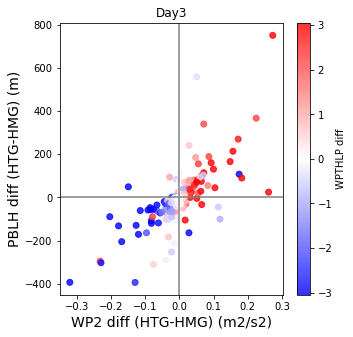

In [94]:
ax = plotScatter_shade( diffWP2_HTG_day2, diffPBLH_HTG_day2,  
            'WP2 diff (HTG-HMG)', 'PBLH diff (HTG-HMG)', 
            'm2/s2', 'm',
            diffWPTHLP_HTG_day2,'WPTHLP diff', 'bwr')
ax.axhline(0,color='grey')
ax.axvline(0,color='grey')
ax.set_title('Day2')

ax = plotScatter_shade( diffWP2_HTG_day3, diffPBLH_HTG_day3,  
            'WP2 diff (HTG-HMG)', 'PBLH diff (HTG-HMG)', 
            'm2/s2', 'm',
            diffWPTHLP_HTG_day3,'WPTHLP diff', 'bwr')
ax.axhline(0,color='grey')
ax.axvline(0,color='grey')
ax.set_title('Day3')



Text(0.5, 1.0, 'Day3')

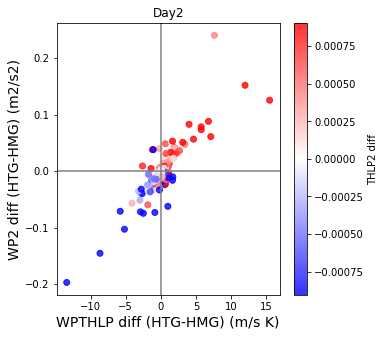

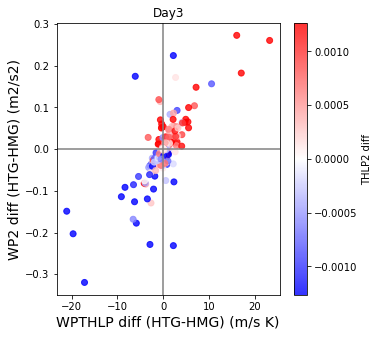

In [95]:
ax = plotScatter_shade( diffWPTHLP_HTG_day2, diffWP2_HTG_day2,  
            'WPTHLP diff (HTG-HMG)', 'WP2 diff (HTG-HMG)', 
            'm/s K', 'm2/s2',
            diffTHLP2_HTG_day2, 'THLP2 diff', 'bwr')
ax.axhline(0,color='grey')
ax.axvline(0,color='grey')
ax.set_title('Day2')

ax = plotScatter_shade( diffWPTHLP_HTG_day3, diffWP2_HTG_day3,  
            'WPTHLP diff (HTG-HMG)', 'WP2 diff (HTG-HMG)', 
            'm/s K', 'm2/s2',
            diffTHLP2_HTG_day3, 'THLP2 diff', 'bwr')
ax.axhline(0,color='grey')
ax.axvline(0,color='grey')
ax.set_title('Day3')



### Pick a single day?

In [18]:
## Select which day to plot (2 or 3?)
plotDay = 2

In [17]:
## Select date of interest

selYear  = 2016
selMonth = 8
selDay   = 19

iDay_day2 = np.where( (day2_upsample['time.year']==selYear) & (day2_upsample['time.month']==selMonth) & (day2_upsample['time.day']==selDay) )[0]
iDay_day3 = np.where( (day3_upsample['time.year']==selYear) & (day3_upsample['time.month']==selMonth) & (day3_upsample['time.day']==selDay) )[0]

day2_selDay = day2_upsample.isel(time=iDay_day2)
day3_selDay = day3_upsample.isel(time=iDay_day3)

day2clm_selDay = day2_upsampleCLM.isel(time=iDay_day2)
day3clm_selDay = day3_upsampleCLM.isel(time=iDay_day3)


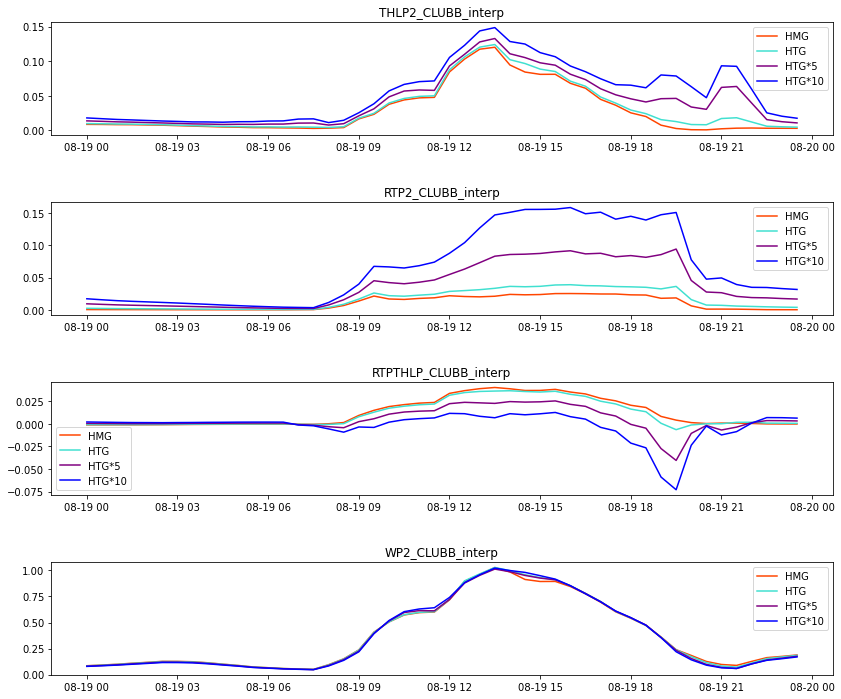

In [19]:
## Which variables to plot timeseries of? 

plotVars = ['THLP2_CLUBB_interp','RTP2_CLUBB_interp','RTPTHLP_CLUBB_interp','WP2_CLUBB_interp']
levSel   = [  -1,                 -1,                  -1,                    -1]

fig,axs = plt.subplots(len(plotVars),1, figsize=(14,3*len(plotVars)) )
axs     = axs.ravel()
fig.subplots_adjust(hspace=0.6)

for iPlot in range(len(plotVars)):
    if plotDay==3: 
        if levSel[iPlot]==0: 
            axs[iPlot].plot(day3_selDay.time.values, np.squeeze(day3_selDay[plotVars[iPlot]].sel(case='HMG').values),    color='orangered', label='HMG')
            axs[iPlot].plot(day3_selDay.time.values, np.squeeze(day3_selDay[plotVars[iPlot]].sel(case='HTG*01').values), color='turquoise', label='HTG')
            axs[iPlot].plot(day3_selDay.time.values, np.squeeze(day3_selDay[plotVars[iPlot]].sel(case='HTG*05').values), color='purple',    label='HTG*5')
            axs[iPlot].plot(day3_selDay.time.values, np.squeeze(day3_selDay[plotVars[iPlot]].sel(case='HTG*10').values), color='blue',      label='HTG*10')
        else:
            axs[iPlot].plot(day3_selDay.time.values, np.squeeze(day3_selDay[plotVars[iPlot]].sel(case='HMG').isel(levInterp=levSel[iPlot]).values),    color='orangered', label='HMG')
            axs[iPlot].plot(day3_selDay.time.values, np.squeeze(day3_selDay[plotVars[iPlot]].sel(case='HTG*01').isel(levInterp=levSel[iPlot]).values), color='turquoise', label='HTG')
            axs[iPlot].plot(day3_selDay.time.values, np.squeeze(day3_selDay[plotVars[iPlot]].sel(case='HTG*05').isel(levInterp=levSel[iPlot]).values), color='purple',    label='HTG*5')
            axs[iPlot].plot(day3_selDay.time.values, np.squeeze(day3_selDay[plotVars[iPlot]].sel(case='HTG*10').isel(levInterp=levSel[iPlot]).values), color='blue',      label='HTG*10')
    elif plotDay==2:
        if levSel[iPlot]==0: 
            axs[iPlot].plot(day2_selDay.time.values, np.squeeze(day2_selDay[plotVars[iPlot]].sel(case='HMG').values),    color='orangered', label='HMG')
            axs[iPlot].plot(day2_selDay.time.values, np.squeeze(day2_selDay[plotVars[iPlot]].sel(case='HTG*01').values), color='turquoise', label='HTG')
            axs[iPlot].plot(day2_selDay.time.values, np.squeeze(day2_selDay[plotVars[iPlot]].sel(case='HTG*05').values), color='purple',    label='HTG*5')
            axs[iPlot].plot(day2_selDay.time.values, np.squeeze(day2_selDay[plotVars[iPlot]].sel(case='HTG*10').values), color='blue',      label='HTG*10')
        else:
            axs[iPlot].plot(day2_selDay.time.values, np.squeeze(day2_selDay[plotVars[iPlot]].sel(case='HMG').isel(levInterp=levSel[iPlot]).values),    color='orangered', label='HMG')
            axs[iPlot].plot(day2_selDay.time.values, np.squeeze(day2_selDay[plotVars[iPlot]].sel(case='HTG*01').isel(levInterp=levSel[iPlot]).values), color='turquoise', label='HTG')
            axs[iPlot].plot(day2_selDay.time.values, np.squeeze(day2_selDay[plotVars[iPlot]].sel(case='HTG*05').isel(levInterp=levSel[iPlot]).values), color='purple',    label='HTG*5')
            axs[iPlot].plot(day2_selDay.time.values, np.squeeze(day2_selDay[plotVars[iPlot]].sel(case='HTG*10').isel(levInterp=levSel[iPlot]).values), color='blue',      label='HTG*10')
 
            
        
    axs[iPlot].legend()
    axs[iPlot].set_title(plotVars[iPlot])


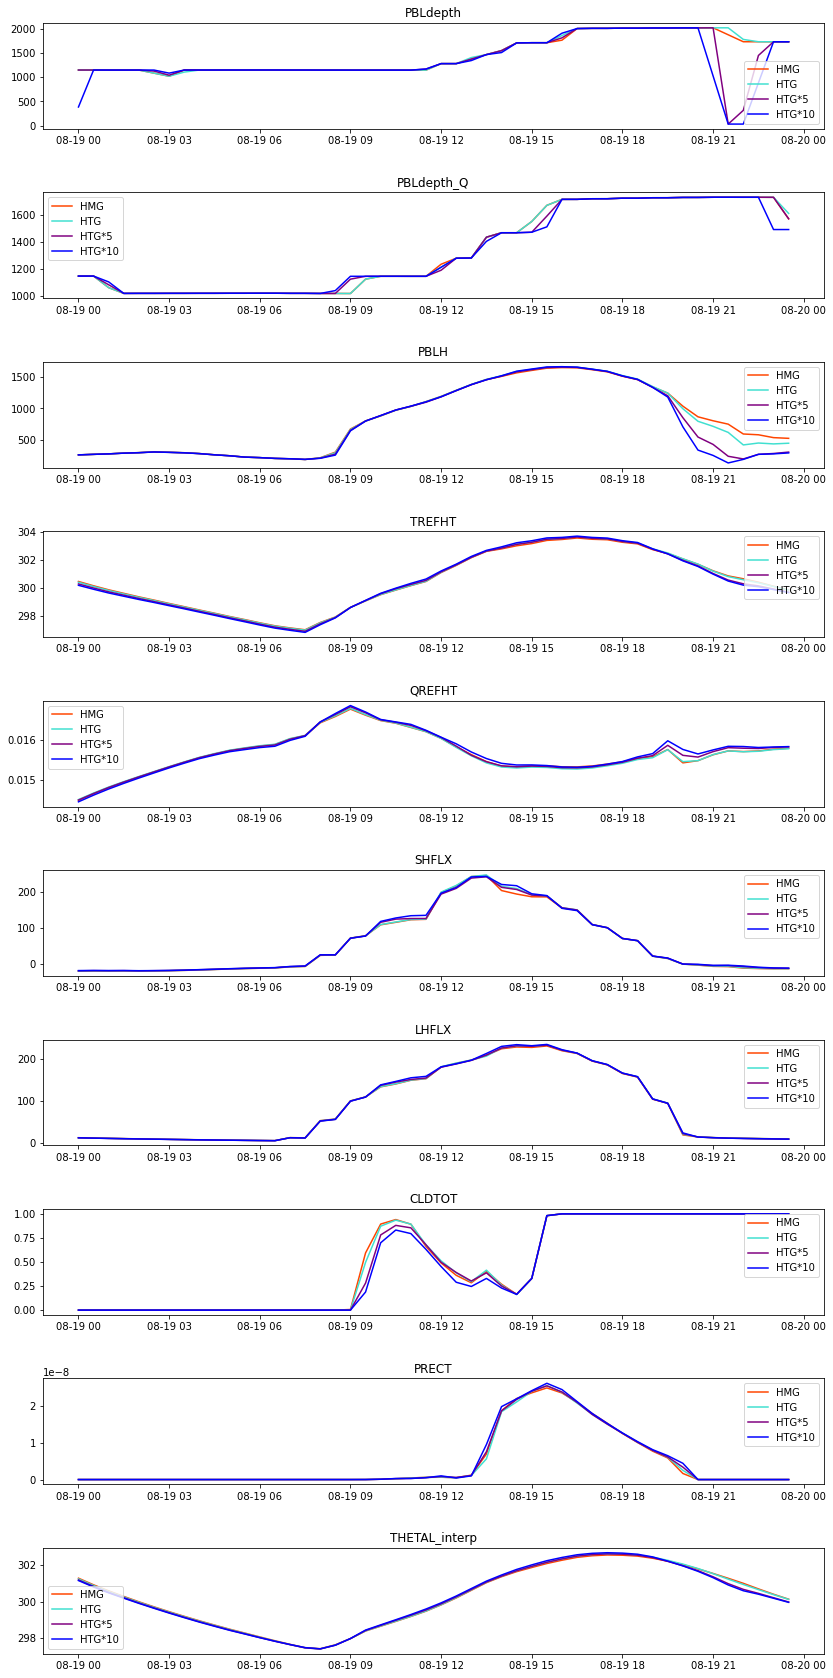

In [20]:
## Which variables to plot timeseries of? 

plotVars = ['PBLdepth','PBLdepth_Q','PBLH','TREFHT','QREFHT','SHFLX','LHFLX','CLDTOT','PRECT','THETAL_interp']
levSel   = [0,          0,           0,       0,      0,      0,       0,       0,      0,       -1]

fig,axs = plt.subplots(len(plotVars),1, figsize=(14,3*len(plotVars)) )
axs     = axs.ravel()
fig.subplots_adjust(hspace=0.6)

for iPlot in range(len(plotVars)):
    if plotDay==3: 
        if levSel[iPlot]==0: 
            axs[iPlot].plot(day3_selDay.time.values, np.squeeze(day3_selDay[plotVars[iPlot]].sel(case='HMG').values),    color='orangered', label='HMG')
            axs[iPlot].plot(day3_selDay.time.values, np.squeeze(day3_selDay[plotVars[iPlot]].sel(case='HTG*01').values), color='turquoise', label='HTG')
            axs[iPlot].plot(day3_selDay.time.values, np.squeeze(day3_selDay[plotVars[iPlot]].sel(case='HTG*05').values), color='purple',    label='HTG*5')
            axs[iPlot].plot(day3_selDay.time.values, np.squeeze(day3_selDay[plotVars[iPlot]].sel(case='HTG*10').values), color='blue',      label='HTG*10')
        else:
            axs[iPlot].plot(day3_selDay.time.values, np.squeeze(day3_selDay[plotVars[iPlot]].sel(case='HMG').isel(levInterp=levSel[iPlot]).values),    color='orangered', label='HMG')
            axs[iPlot].plot(day3_selDay.time.values, np.squeeze(day3_selDay[plotVars[iPlot]].sel(case='HTG*01').isel(levInterp=levSel[iPlot]).values), color='turquoise', label='HTG')
            axs[iPlot].plot(day3_selDay.time.values, np.squeeze(day3_selDay[plotVars[iPlot]].sel(case='HTG*05').isel(levInterp=levSel[iPlot]).values), color='purple',    label='HTG*5')
            axs[iPlot].plot(day3_selDay.time.values, np.squeeze(day3_selDay[plotVars[iPlot]].sel(case='HTG*10').isel(levInterp=levSel[iPlot]).values), color='blue',      label='HTG*10')
    elif plotDay==2:
        if levSel[iPlot]==0: 
            axs[iPlot].plot(day2_selDay.time.values, np.squeeze(day2_selDay[plotVars[iPlot]].sel(case='HMG').values),    color='orangered', label='HMG')
            axs[iPlot].plot(day2_selDay.time.values, np.squeeze(day2_selDay[plotVars[iPlot]].sel(case='HTG*01').values), color='turquoise', label='HTG')
            axs[iPlot].plot(day2_selDay.time.values, np.squeeze(day2_selDay[plotVars[iPlot]].sel(case='HTG*05').values), color='purple',    label='HTG*5')
            axs[iPlot].plot(day2_selDay.time.values, np.squeeze(day2_selDay[plotVars[iPlot]].sel(case='HTG*10').values), color='blue',      label='HTG*10')
        else:
            axs[iPlot].plot(day2_selDay.time.values, np.squeeze(day2_selDay[plotVars[iPlot]].sel(case='HMG').isel(levInterp=levSel[iPlot]).values),    color='orangered', label='HMG')
            axs[iPlot].plot(day2_selDay.time.values, np.squeeze(day2_selDay[plotVars[iPlot]].sel(case='HTG*01').isel(levInterp=levSel[iPlot]).values), color='turquoise', label='HTG')
            axs[iPlot].plot(day2_selDay.time.values, np.squeeze(day2_selDay[plotVars[iPlot]].sel(case='HTG*05').isel(levInterp=levSel[iPlot]).values), color='purple',    label='HTG*5')
            axs[iPlot].plot(day2_selDay.time.values, np.squeeze(day2_selDay[plotVars[iPlot]].sel(case='HTG*10').isel(levInterp=levSel[iPlot]).values), color='blue',      label='HTG*10')
         
    axs[iPlot].legend()
    axs[iPlot].set_title(plotVars[iPlot])


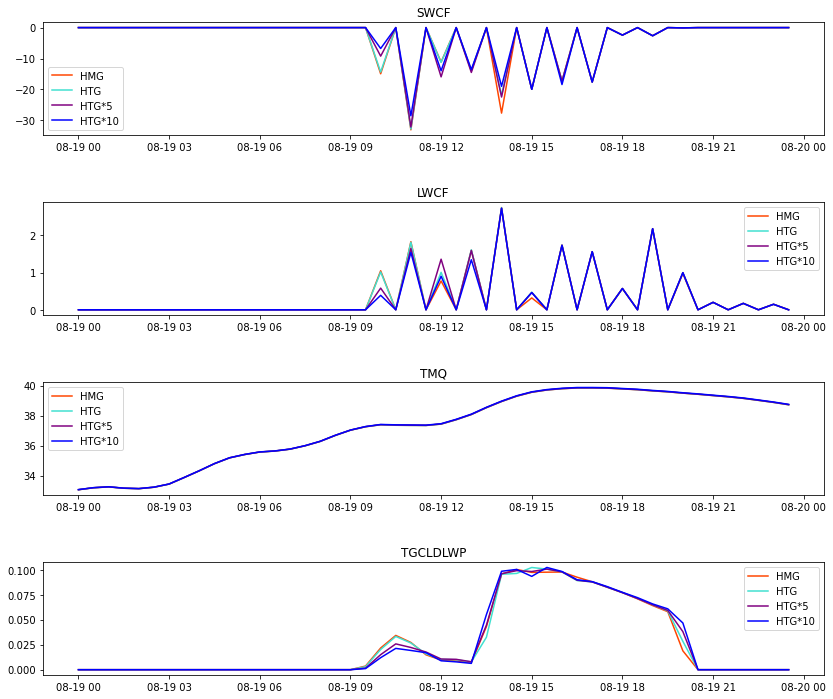

In [21]:
## Which variables to plot timeseries of? 

plotVars = ['SWCF','LWCF','TMQ','TGCLDLWP']
levSel   = [0,          0,           0, 0]

fig,axs = plt.subplots(len(plotVars),1, figsize=(14,3*len(plotVars)) )
axs     = axs.ravel()
fig.subplots_adjust(hspace=0.6)

for iPlot in range(len(plotVars)):
    if plotDay==3: 
        if levSel[iPlot]==0: 
            axs[iPlot].plot(day3_selDay.time.values, np.squeeze(day3_selDay[plotVars[iPlot]].sel(case='HMG').values),    color='orangered', label='HMG')
            axs[iPlot].plot(day3_selDay.time.values, np.squeeze(day3_selDay[plotVars[iPlot]].sel(case='HTG*01').values), color='turquoise', label='HTG')
            axs[iPlot].plot(day3_selDay.time.values, np.squeeze(day3_selDay[plotVars[iPlot]].sel(case='HTG*05').values), color='purple',    label='HTG*5')
            axs[iPlot].plot(day3_selDay.time.values, np.squeeze(day3_selDay[plotVars[iPlot]].sel(case='HTG*10').values), color='blue',      label='HTG*10')
        else:
            axs[iPlot].plot(day3_selDay.time.values, np.squeeze(day3_selDay[plotVars[iPlot]].sel(case='HMG').isel(levInterp=levSel[iPlot]).values),    color='orangered', label='HMG')
            axs[iPlot].plot(day3_selDay.time.values, np.squeeze(day3_selDay[plotVars[iPlot]].sel(case='HTG*01').isel(levInterp=levSel[iPlot]).values), color='turquoise', label='HTG')
            axs[iPlot].plot(day3_selDay.time.values, np.squeeze(day3_selDay[plotVars[iPlot]].sel(case='HTG*05').isel(levInterp=levSel[iPlot]).values), color='purple',    label='HTG*5')
            axs[iPlot].plot(day3_selDay.time.values, np.squeeze(day3_selDay[plotVars[iPlot]].sel(case='HTG*10').isel(levInterp=levSel[iPlot]).values), color='blue',      label='HTG*10')
    elif plotDay==2:
        if levSel[iPlot]==0: 
            axs[iPlot].plot(day2_selDay.time.values, np.squeeze(day2_selDay[plotVars[iPlot]].sel(case='HMG').values),    color='orangered', label='HMG')
            axs[iPlot].plot(day2_selDay.time.values, np.squeeze(day2_selDay[plotVars[iPlot]].sel(case='HTG*01').values), color='turquoise', label='HTG')
            axs[iPlot].plot(day2_selDay.time.values, np.squeeze(day2_selDay[plotVars[iPlot]].sel(case='HTG*05').values), color='purple',    label='HTG*5')
            axs[iPlot].plot(day2_selDay.time.values, np.squeeze(day2_selDay[plotVars[iPlot]].sel(case='HTG*10').values), color='blue',      label='HTG*10')
        else:
            axs[iPlot].plot(day2_selDay.time.values, np.squeeze(day2_selDay[plotVars[iPlot]].sel(case='HMG').isel(levInterp=levSel[iPlot]).values),    color='orangered', label='HMG')
            axs[iPlot].plot(day2_selDay.time.values, np.squeeze(day2_selDay[plotVars[iPlot]].sel(case='HTG*01').isel(levInterp=levSel[iPlot]).values), color='turquoise', label='HTG')
            axs[iPlot].plot(day2_selDay.time.values, np.squeeze(day2_selDay[plotVars[iPlot]].sel(case='HTG*05').isel(levInterp=levSel[iPlot]).values), color='purple',    label='HTG*5')
            axs[iPlot].plot(day2_selDay.time.values, np.squeeze(day2_selDay[plotVars[iPlot]].sel(case='HTG*10').isel(levInterp=levSel[iPlot]).values), color='blue',      label='HTG*10')
         
    axs[iPlot].legend()
    axs[iPlot].set_title(plotVars[iPlot])


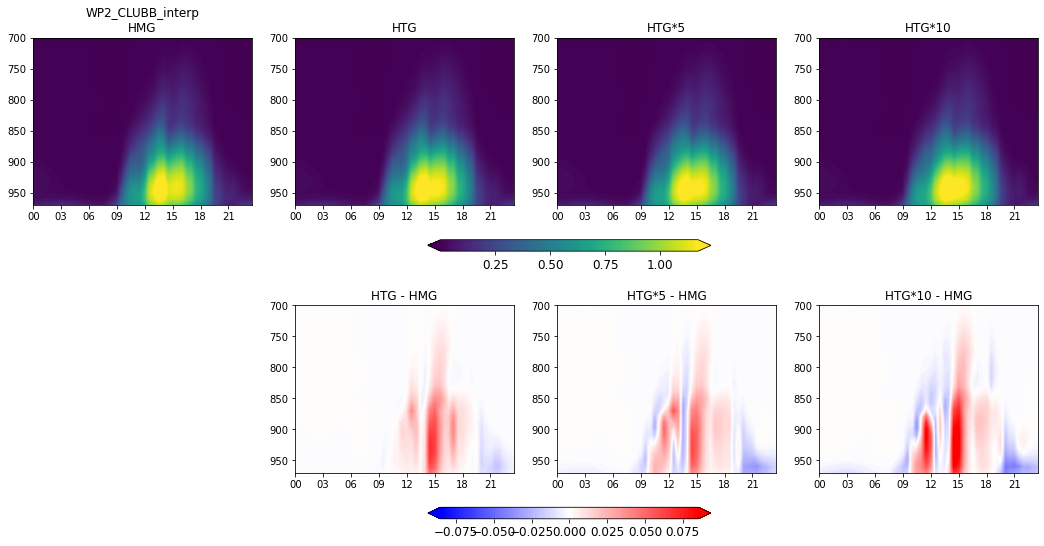

In [23]:
## Time-height plots

plotVar = 'WP2_CLUBB_interp'
cmapSelRaw = 'viridis'


# plotVar = 'Q_interp'
# cmapSelRaw = 'Blues'

## Select data
plotYlim = 700      # Select max level to plot to

if plotDay==3:
    ilevs       = np.where(day3_selDay['levInterp'].values >= plotYlim)[0]
    day3_selDayZoom = day3_selDay.isel(levInterp=ilevs)
    
    HMG_selDay   = day3_selDayZoom[plotVar].sel(case='HMG')
    HTG_selDay   = day3_selDayZoom[plotVar].sel(case='HTG*01')
    HTG05_selDay = day3_selDayZoom[plotVar].sel(case='HTG*05')
    HTG10_selDay = day3_selDayZoom[plotVar].sel(case='HTG*10')
elif plotDay==2:
    ilevs       = np.where(day2_selDay['levInterp'].values >= plotYlim)[0]
    day2_selDayZoom = day2_selDay.isel(levInterp=ilevs)
    
    HMG_selDay   = day2_selDayZoom[plotVar].sel(case='HMG')
    HTG_selDay   = day2_selDayZoom[plotVar].sel(case='HTG*01')
    HTG05_selDay = day2_selDayZoom[plotVar].sel(case='HTG*05')
    HTG10_selDay = day2_selDayZoom[plotVar].sel(case='HTG*10')

# Get bounds to plot in (i.e., color range)
maxPlotRange = 99   
minPlotRange = 10

cMax  = np.nanmax([np.nanpercentile(HMG_selDay,   maxPlotRange), 
                   np.nanpercentile(HTG_selDay,   maxPlotRange), 
                   np.nanpercentile(HTG05_selDay, maxPlotRange),
                   np.nanpercentile(HTG10_selDay, maxPlotRange)])
cMin  = np.nanmin([np.nanpercentile(HMG_selDay,   minPlotRange), 
                   np.nanpercentile(HTG_selDay,   minPlotRange), 
                   np.nanpercentile(HTG05_selDay, minPlotRange),
                   np.nanpercentile(HTG10_selDay, minPlotRange)])
cStep = (cMax - cMin)/100.0


diffHTG   = HTG_selDay   - HMG_selDay
diffHTG05 = HTG05_selDay - HMG_selDay
diffHTG10 = HTG10_selDay - HMG_selDay

diffMax  = np.nanmax([np.nanpercentile(diffHTG,     maxPlotRange), 
                       np.nanpercentile(diffHTG05,  maxPlotRange), 
                       np.nanpercentile(diffHTG10,  maxPlotRange)])
diffMin  = np.nanmin([np.nanpercentile(diffHTG,     minPlotRange), 
                       np.nanpercentile(diffHTG05,  minPlotRange), 
                       np.nanpercentile(diffHTG10,  minPlotRange)])
# diffStep = (diffMax - diffMin)/100.0
boundsDiff = np.nanmax([np.abs(diffMax), np.abs(diffMin)])
diff_cStep = (2*boundsDiff)/100.0
levsDiff   = np.arange(-boundsDiff, boundsDiff+diff_cStep, diff_cStep)


# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

## Make the plots! 
fig,axs = plt.subplots(2,4, figsize=(18,8) )
axs     = axs.ravel()
fig.subplots_adjust(hspace=0.6)

axs[0].contourf(HMG_selDay.time.values, HMG_selDay.levInterp.values, np.squeeze(HMG_selDay.values).transpose(),
                levels=np.arange(cMin, cMax+cStep, cStep), cmap=cmapSelRaw, extend='both')
axs[1].contourf(HTG_selDay.time.values, HTG_selDay.levInterp.values, np.squeeze(HTG_selDay.values).transpose(),
                levels=np.arange(cMin, cMax+cStep, cStep), cmap=cmapSelRaw, extend='both')
cplot = axs[2].contourf(HTG05_selDay.time.values, HTG05_selDay.levInterp.values, np.squeeze(HTG05_selDay.values).transpose(),
                levels=np.arange(cMin, cMax+cStep, cStep), cmap=cmapSelRaw, extend='both')
axs[3].contourf(HTG10_selDay.time.values, HTG10_selDay.levInterp.values, np.squeeze(HTG10_selDay.values).transpose(),
                levels=np.arange(cMin, cMax+cStep, cStep), cmap=cmapSelRaw, extend='both')

# Add colorbar
ax_position  = axs[2].get_position()
cbar_ax      = fig.add_axes([ax_position.x0-0.1, ax_position.y0-0.08, ax_position.width+0.05, 0.02])
cbar         = plt.colorbar(cplot, orientation='horizontal',cax=cbar_ax)
tick_locator = ticker.MaxNLocator(nbins=5)
cbar.locator = tick_locator
cbar.update_ticks()
cbar.ax.tick_params(labelsize=12)

axs[0].set_title(plotVar+'\nHMG')
axs[1].set_title('HTG')
axs[2].set_title('HTG*5')
axs[3].set_title('HTG*10')


## Plot Differences 
axs[5].contourf(HTG_selDay.time.values, HTG_selDay.levInterp.values, np.squeeze(diffHTG.values).transpose(),
                levels=levsDiff, cmap='bwr', extend='both')
cplot=axs[6].contourf(HTG_selDay.time.values, HTG_selDay.levInterp.values, np.squeeze(diffHTG05.values).transpose(),
                levels=levsDiff, cmap='bwr', extend='both')
axs[7].contourf(HTG_selDay.time.values, HTG_selDay.levInterp.values, np.squeeze(diffHTG10.values).transpose(),
                levels=levsDiff, cmap='bwr', extend='both')

# Add colorbar
ax_position  = axs[6].get_position()
cbar_ax      = fig.add_axes([ax_position.x0-0.1, ax_position.y0-0.08, ax_position.width+0.05, 0.02])
cbar         = plt.colorbar(cplot, orientation='horizontal',cax=cbar_ax)
tick_locator = ticker.MaxNLocator(nbins=7)
cbar.locator = tick_locator
cbar.update_ticks()
cbar.ax.tick_params(labelsize=12)

axs[5].set_title('HTG - HMG')
axs[6].set_title('HTG*5 - HMG')
axs[7].set_title('HTG*10 - HMG')

myFmt = mdates.DateFormatter('%H')
axs[0].xaxis.set_major_formatter(myFmt)
axs[1].xaxis.set_major_formatter(myFmt)
axs[2].xaxis.set_major_formatter(myFmt)
axs[3].xaxis.set_major_formatter(myFmt)
axs[5].xaxis.set_major_formatter(myFmt)
axs[6].xaxis.set_major_formatter(myFmt)
axs[7].xaxis.set_major_formatter(myFmt)

axs[0].invert_yaxis()
axs[1].invert_yaxis()
axs[2].invert_yaxis()
axs[3].invert_yaxis()

axs[5].invert_yaxis()
axs[6].invert_yaxis()
axs[7].invert_yaxis()

fig.delaxes(axs[4])
